<a href="https://colab.research.google.com/github/Xtines/DSI_capstone_Glaucoma/blob/master/Rebuilt_Unet_Capstone_CupSeg_toGCP_0416_pushsavedmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import os
import pprint

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

##TF2 runs Eager Execution by default, thus removing the need for Sessions. If you want to run static graphs, the more proper way is to use tf.function() in TF2. While Session can still be accessed via tf.compat.v1.Session() in TF2, I would discourage using it. It may be helpful to demonstrate this difference by comparing the difference in hello worlds:
#  with tf.Session(tpu_address) as session:
#    devices = session.list_devices()
    
#  print('TPU devices:')
#  pprint.pprint(devices)

TPU address is grpc://10.99.34.2:8470


In [0]:
!pip install tensorflow

In [0]:
import tensorflow as tf

In [0]:
tf.__version__ #'2.2.0-rc3'

'2.1.0'

In [0]:
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
  print('TPU not found')

  #Should see message: Found TPU at: grpc://10.110.100.210:8470

Found TPU at: grpc://10.99.34.2:8470


In [0]:
import numpy as np
import os
from skimage.io import imsave,imread
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#h5f2=h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'content/gdrive/My Drive', 'DRISHTI_GS.hdf5'), 'r')

In [0]:
#.File(os.path.join(os.path.dirname(os.getcwd()), 'content/gdrive/My Drive', 'DRISHTI_GS.hdf5'), 'r')

In [0]:
os.getcwd()

'/content'

In [0]:
print(os.path.dirname(os.getcwd()))

/


In [0]:
pathtest = os.path.join(os.path.dirname(os.getcwd()), 'content/gdrive/My Drive', 'Drishti_Complete_Data')

In [0]:
pathtest #'/content/gdrive/My Drive/Drishti_Complete_Data'

'/content/gdrive/My Drive/Drishti_Complete_Data'

### Data ingestion

In [0]:
data_path= "/content/gdrive/My Drive/Drishti_Complete_Data"

drishtiGS_066.png


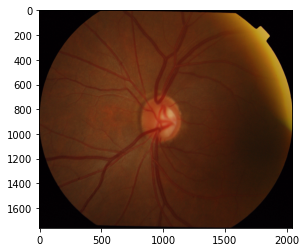

drishtiGS_066_cupsegSoftmap.png


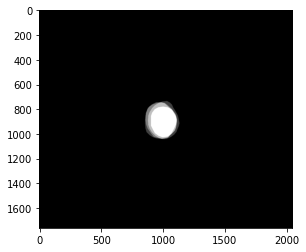

In [0]:
def displayImgAndMask(idx):
    #train_data_path = os.path.join(data_path,'train')
    train_data_path = data_path
    images = os.listdir(train_data_path)
    
    img_name = images[idx]
    
    if 'cupsegSoftmap' in img_name:
        img_name = img_name.split('_cupsegSoftmap')[0]+'.png'
        
    print(img_name)

    img = imread(os.path.join(train_data_path,img_name),as_gray=False)
    plt.imshow(img)
    plt.show()

    
    img_mask_name = img_name.split('.')[0]+'_cupsegSoftmap.png'
    print(img_mask_name)
    img_mask = imread(os.path.join(train_data_path,img_mask_name))

    plt.imshow(img_mask,cmap='gray')
    plt.show()

displayImgAndMask(1)

drishtiGS_057.png


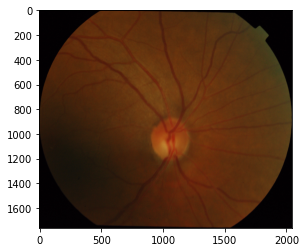

drishtiGS_057_cupsegSoftmap.png


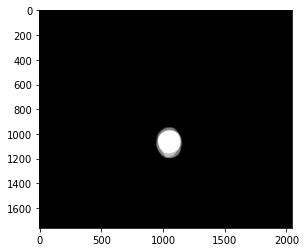

In [0]:
displayImgAndMask(2)

In [0]:
import fnmatch
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    #images = fnmatch.filter(os.listdir(path), '*.png')
    image_files = sorted([os.path.join(path, file) for file in os.listdir(path)
                          if file.endswith('.png')])
    return image_files
    
dataset = loadImages(data_path)

print("No. of items in dataset: ", len(dataset))

No. of items in dataset:  100


In [0]:
print(dataset)

['/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_002.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_002_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_004.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_004_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_008.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_008_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_010.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_010_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_012.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_012_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_015.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_015_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_016.png', '/content/gdrive/My Drive/Drish

In [0]:
'''['/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_002.png', 
'/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_002_cupsegSoftmap.png', 
'/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_004.png', 
'/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_004_cupsegSoftmap.png', 
'/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_008.png', 
'/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_008_cupsegSoftmap.png', 
'/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_010.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_010_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_012.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_012_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_015.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_015_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_016.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_016_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_017.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_017_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_018.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_018_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_022.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_022_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_024.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_024_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_026.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_026_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_031.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_031_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_032.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_032_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_033.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_033_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_035.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_035_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_036.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_036_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_037.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_037_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_038.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_038_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_040.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_040_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_041.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_041_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_042.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_042_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_044.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_044_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_045.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_045_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_046.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_046_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_047.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_047_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_049.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_049_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_051.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_051_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_057.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_057_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_058.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_058_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_060.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_060_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_061.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_061_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_062.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_062_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_063.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_063_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_064.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_064_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_066.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_066_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_068.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_068_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_069.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_069_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_075.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_075_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_076.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_076_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_080.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_080_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_081.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_081_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_084.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_084_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_088.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_088_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_089.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_089_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_090.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_090_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_092.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_092_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_094.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_094_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_098.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_098_cupsegSoftmap.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_101.png', '/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_101_cupsegSoftmap.png']'''

In [0]:
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

In [0]:
## Checking FileNames
from PIL import Image 
print(dataset[1])
print(os.path.basename(dataset[1]))
filename = os.path.basename(dataset[1])
filename = os.path.splitext(filename)[0]
print(filename)
# Opens a image in RGB mode 
im1 = Image.open(dataset[1]) 
im1.show() 


/content/gdrive/My Drive/Drishti_Complete_Data/drishtiGS_002_cupsegSoftmap.png
drishtiGS_002_cupsegSoftmap.png
drishtiGS_002_cupsegSoftmap


In [0]:
print(os.path.basename(dataset[2]))
filename2 = os.path.basename(dataset[2])
filename2 = os.path.splitext(filename2)[0]
print(filename2)
im2 = Image.open(dataset[2]) 
im2.show() 


drishtiGS_004.png
drishtiGS_004


In [0]:
!mkdir "/content/gdrive/My Drive/Drishti_Cropped_Data" #mkdir: cannot create directory ‘/content/gdrive/My Drive/Drishti_Cropped_Data’: File exists


mkdir: cannot create directory ‘/content/gdrive/My Drive/Drishti_Cropped_Data’: File exists


In [0]:
# Setting the points for cropped image 
from PIL import Image 
from keras.preprocessing.image import save_img,img_to_array
def crop(data):

  res_img = []
  for i in range(len(data)):
    #print(len(data))
  # Cropped image of above dimension 
  # (It will not change orginal image) 
    filename = os.path.basename(data[i])
    filename = os.path.splitext(filename)[0]
    im = imread(data[i])
    im1 = im[400:(im.shape[0]-400),400:(im.shape[1]-400)]
    img_array = img_to_array(im1)
    save_img('/content/gdrive/My Drive/Drishti_Cropped_Data/' + filename + '.png', img_array)
    #print(im1)
    res_img.append(im1)
    
  # Shows the image in image viewer 
  original_1 = res_img[1]
  display_one(imread(data[1]))
  display_one(original_1)

  original_2 = res_img[2]
  display_one(imread(data[2]))
  display_one(original_2)


  

Using TensorFlow backend.


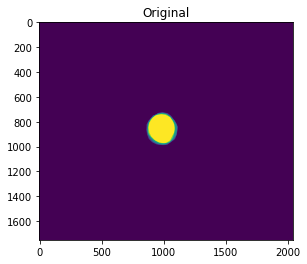

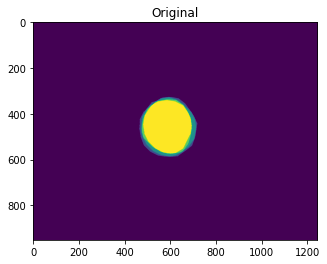

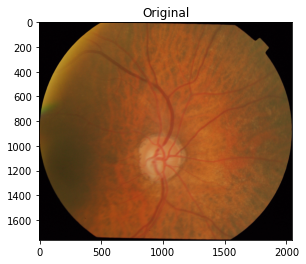

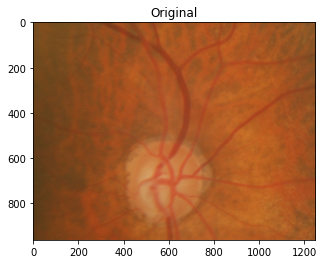

In [0]:
crop(dataset)

In [0]:
data_path_cropped="/content/gdrive/My Drive/Drishti_Cropped_Data"
dataset = loadImages(data_path_cropped)

In [0]:
len(dataset) #100

100

In [0]:
!mkdir "/content/gdrive/My Drive/Drishti_Resized_Data" #mkdir: cannot create directory ‘/content/gdrive/My Drive/Drishti_Resized_Data’: File exists

mkdir: cannot create directory ‘/content/gdrive/My Drive/Drishti_Resized_Data’: File exists


### Resizing images

In [0]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import save_img

def processing(data):
    # loading image
    ## Question: Getting 100 images to work with : xQuestion: shall we modify this ceiling/cap no.? 
    
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:100]]
    #print(img)

    try:
        print('Original size',img[0].shape)
    except AttributeError:
        print("shape not found")
  
    
    # --------------------------------
    # setting dim of the resize to 220 x 220
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    print("No. of items in img: ", len(img))
    for i in range(len(img)):
        filename = os.path.basename(data[i])
        filename = os.path.splitext(filename)[0]
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        ## Scale of cv2 changes so converting back to RGB
        RGB_img = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
        img_array = img_to_array(RGB_img)
        save_img('/content/gdrive/My Drive/Drishti_Resized_Data/' + filename + '.png', img_array)

        #print("this is",img[i])
        #save_img('i', res)
        res_img.append(res)
    # Checcking the size
    try:
        print('RESIZED shape of a sample image:', res_img[1].shape)
    except AttributeError:
        print("Error: shape not found")

    # Checking the size
    print('RESIZED shape of a sample image:', res_img[1].shape)
    
    # Visualizing one of the images in the array
    original = res_img[1]
    print(type(original))
    
    display_one(img[1])
    display_one(original)

    print("No. of items in res_img (resized images): ", len(res_img))

Original size (952, 1245, 3)
No. of items in img:  100
RESIZED shape of a sample image: (220, 220)
RESIZED shape of a sample image: (220, 220)
<class 'numpy.ndarray'>


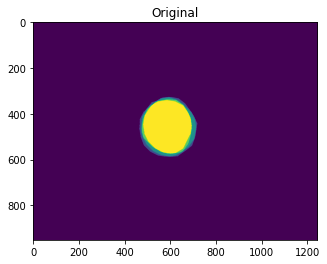

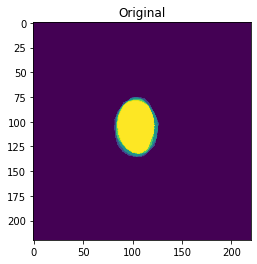

No. of items in res_img (resized images):  100


"Original size (952, 1245, 3)\n100\nRESIZED (220, 220)\nRESIZED (220, 220)\n<class 'numpy.ndarray'>\n"

In [0]:
pro= processing(dataset)

'''Original size (952, 1245, 3)
100
RESIZED (220, 220)
RESIZED (220, 220)
<class 'numpy.ndarray'>
'''

In [0]:
data_resized_path= "/content/gdrive/My Drive/Drishti_Resized_Data"

### (Work-in-progress function for train/val/test split : team, pls skip to next section "Create train data": ) 

#### Custom assignment function to split & assign images to Train/Val/Test: 

We reference the following tutorial -
https://towardsdatascience.com/a-keras-pipeline-for-image-segmentation-part-1-6515a421157d

In [0]:
!mkdir "/content/gdrive/My Drive/Drishti_Resized_Data/frames" 
!mkdir "/content/gdrive/My Drive/Drishti_Resized_Data/masks" 

mkdir: cannot create directory ‘/content/gdrive/My Drive/Drishti_Resized_Data/frames’: File exists
mkdir: cannot create directory ‘/content/gdrive/My Drive/Drishti_Resized_Data/masks’: File exists


In [0]:
len(os.listdir(data_path)) 

100

In [0]:
'''['drishtiGS_063_cupsegSoftmap.png',
 'drishtiGS_066_cupsegSoftmap.png',
 'drishtiGS_057_cupsegSoftmap.png',
 'drishtiGS_062_cupsegSoftmap.png',
 'drishtiGS_035_cupsegSoftmap.png',
 'drishtiGS_061_cupsegSoftmap.png',
 'drishtiGS_031_cupsegSoftmap.png',
 'drishtiGS_101_cupsegSoftmap.png',
 'drishtiGS_018_cupsegSoftmap.png',
 'drishtiGS_004_cupsegSoftmap.png',
 'drishtiGS_046.png',
 'drishtiGS_049_cupsegSoftmap.png',
 'drishtiGS_090.png',
 'drishtiGS_032_cupsegSoftmap.png',
 'drishtiGS_060_cupsegSoftmap.png','''

In [0]:
#https://stackoverflow.com/questions/8858008/how-to-move-a-file-in-python
'''import os
import shutil
os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
shutil.move("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
'''

In [0]:
def moveseperate_frame_mask_images():
    import os
    #import shutil   

    data_path = data_resized_path
    images_list = os.listdir(data_path)
    count_frames = 0
    count_masks = 0
    
    print("Original no. of items in data_resized_path: \n", len(images_list))
    
    for i in range(len(images_list)): 
      if 'cupsegSoftmap' in images_list[i]:
        print("Index, image name: ", i, images_list[i])
        #new_loc = data_path + '\\' + 'masks' + '\\' #+ file
        #os.rename(images_list[i], new_loc)
        #os.rename("content/gdrive/My Drive/Drishti_Resized_Data/", "content/gdrive/My Drive/Drishti_Resized_Data/masks/") #"path/to/current/file.foo", "path/to/new/destination/for/file.foo")
        os.rename("/content/gdrive/My Drive/Drishti_Resized_Data/"+images_list[i], "/content/gdrive/My Drive/Drishti_Resized_Data/masks/"+images_list[i]) #"path/to/current/file.foo", "path/to/new/destination/for/file.foo")
        count_masks +=1

      elif '.png' in images_list[i]: 
        print("Index, image name: ", i, images_list[i])
        os.rename("/content/gdrive/My Drive/Drishti_Resized_Data/"+images_list[i], "/content/gdrive/My Drive/Drishti_Resized_Data/frames/"+images_list[i])
        count_frames +=1

      else: 
        pass

    print("Count of moved frame images: ", count_frames, "\n")
    print("Count of moved masks images: ", count_masks, "\n")


In [0]:
moveseperate_frame_mask_images()

Original no. of items in data_resized_path: 
 108
Index, image name:  8 drishtiGS_002.png
Index, image name:  9 drishtiGS_002_cupsegSoftmap.png
Index, image name:  10 drishtiGS_004.png
Index, image name:  11 drishtiGS_004_cupsegSoftmap.png
Index, image name:  12 drishtiGS_008.png
Index, image name:  13 drishtiGS_008_cupsegSoftmap.png
Index, image name:  14 drishtiGS_010.png
Index, image name:  15 drishtiGS_010_cupsegSoftmap.png
Index, image name:  16 drishtiGS_012.png
Index, image name:  17 drishtiGS_012_cupsegSoftmap.png
Index, image name:  18 drishtiGS_015.png
Index, image name:  19 drishtiGS_015_cupsegSoftmap.png
Index, image name:  20 drishtiGS_016.png
Index, image name:  21 drishtiGS_016_cupsegSoftmap.png
Index, image name:  22 drishtiGS_017.png
Index, image name:  23 drishtiGS_017_cupsegSoftmap.png
Index, image name:  24 drishtiGS_018.png
Index, image name:  25 drishtiGS_018_cupsegSoftmap.png
Index, image name:  26 drishtiGS_022.png
Index, image name:  27 drishtiGS_022_cupsegSoft

In [0]:
'''
import os
import random
import re
from PIL import Image

DATA_PATH = data_resized_path #'/path/to/your/data_dir'
FRAME_PATH = DATA_PATH+'/frames'
MASK_PATH = DATA_PATH+'/masks'

# Create folders to hold images and masks
folders = ['train_frames', 'train_masks', 'val_frames', 'val_masks', 'test_frames', 'test_masks']

for folder in folders:
  os.makedirs(DATA_PATH + folder)  
  
# Get all frames and masks, sort them, shuffle them to generate data sets.
all_frames = os.listdir(FRAME_PATH)
all_masks = os.listdir(MASK_PATH)


all_frames.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
all_masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])


random.seed(230)
random.shuffle(all_frames)


In [0]:
import os
import random
import re
from PIL import Image

DATA_PATH = data_resized_path #'/path/to/your/data_dir'
FRAME_PATH = DATA_PATH+'/frames/'
MASK_PATH = DATA_PATH+'/masks/'

# Create folders to hold images and masks for each fold: 
folders = ['train_frames', 'train_masks', 'val_frames', 'val_masks', 'test_frames', 'test_masks']

for folder in folders:
  try: 
    os.makedirs(DATA_PATH + '/' + folder)  # should create folder - No such file or directory: '/content/gdrive/My Drive/Drishti_Resized_Data/train_frames/
  except:
    pass
  
# Get all frames and masks, sort them, shuffle them to generate data sets.
all_frames = os.listdir(FRAME_PATH)
all_masks = os.listdir(MASK_PATH)

all_frames.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
all_masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])


In [0]:
all_frames[0:10]

['drishtiGS_002.png',
 'drishtiGS_004.png',
 'drishtiGS_008.png',
 'drishtiGS_010.png',
 'drishtiGS_012.png',
 'drishtiGS_015.png',
 'drishtiGS_016.png',
 'drishtiGS_017.png',
 'drishtiGS_018.png',
 'drishtiGS_022.png']

In [0]:
len(all_frames) #50

50

In [0]:
all_masks[0:10]

['drishtiGS_002_cupsegSoftmap.png',
 'drishtiGS_004_cupsegSoftmap.png',
 'drishtiGS_008_cupsegSoftmap.png',
 'drishtiGS_010_cupsegSoftmap.png',
 'drishtiGS_012_cupsegSoftmap.png',
 'drishtiGS_015_cupsegSoftmap.png',
 'drishtiGS_016_cupsegSoftmap.png',
 'drishtiGS_017_cupsegSoftmap.png',
 'drishtiGS_018_cupsegSoftmap.png',
 'drishtiGS_022_cupsegSoftmap.png']

In [0]:
len(all_masks) #50

50

In [0]:
## Shuffle images' order before splitting
#random.seed(230)
#random.shuffle(all_frames)

# Generate train, val, and test sets for frames
train_split = int(0.8*len(all_frames))
val_split = int(0.9 * len(all_frames))

train_frames = all_frames[:train_split]
val_frames = all_frames[train_split:val_split]
test_frames = all_frames[val_split:]
print("Length of train_frames: ", len(train_frames))
print("Length of val_frames: ", len(val_frames))
print("Length of test_frames: ", len(test_frames))

# Generate corresponding mask lists for masks: need to fix to allow for a mask index for shuffled pairing of all_frames & all_masks
train_masks = all_masks[:train_split] #[f for f in all_masks if f in train_frames] # error: empty []
val_masks = all_masks[train_split:val_split]#[f for f in all_masks if f in val_frames]
test_masks = all_masks[val_split:] #[f for f in all_masks if f in test_frames]

'''
Length of train_frames:  40
Length of val_frames:  5
Length of test_frames:  5
'''

Length of train_frames:  40
Length of val_frames:  5
Length of test_frames:  5


'\nLength of train_frames:  40\nLength of val_frames:  5\nLength of test_frames:  5\n'

In [0]:
test_frames

['drishtiGS_090.png',
 'drishtiGS_092.png',
 'drishtiGS_094.png',
 'drishtiGS_098.png',
 'drishtiGS_101.png']

In [0]:
test_masks 

['drishtiGS_090_cupsegSoftmap.png',
 'drishtiGS_092_cupsegSoftmap.png',
 'drishtiGS_094_cupsegSoftmap.png',
 'drishtiGS_098_cupsegSoftmap.png',
 'drishtiGS_101_cupsegSoftmap.png']

In [0]:
val_frames

['drishtiGS_080.png',
 'drishtiGS_081.png',
 'drishtiGS_084.png',
 'drishtiGS_088.png',
 'drishtiGS_089.png']

In [0]:
val_masks

['drishtiGS_080_cupsegSoftmap.png',
 'drishtiGS_081_cupsegSoftmap.png',
 'drishtiGS_084_cupsegSoftmap.png',
 'drishtiGS_088_cupsegSoftmap.png',
 'drishtiGS_089_cupsegSoftmap.png']

In [0]:
testimg = Image.open(MASK_PATH+'drishtiGS_101_cupsegSoftmap.png')

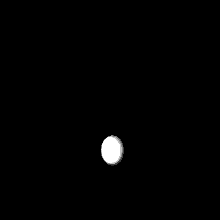

In [0]:
testimg

In [0]:
#Add train, val, test frames and masks to relevant folders
def add_frames(dir_name, image):
  img = Image.open(FRAME_PATH+image)
  img.save(DATA_PATH+'/{}'.format(dir_name)+'/'+image) ### error: FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/Drishti_Resized_Data/train_frames/drishtiGS_002.png'
  
def add_masks(dir_name, image):
  img = Image.open(MASK_PATH+image)
  img.save(DATA_PATH+'/{}'.format(dir_name)+'/'+image)

frame_folders = [(train_frames, 'train_frames'), (val_frames, 'val_frames'), (test_frames, 'test_frames')]
mask_folders = [(train_masks, 'train_masks'), (val_masks, 'val_masks'), (test_masks, 'test_masks')]

# Add frames
for folder in frame_folders:
  array = folder[0]
  name = [folder[1]] * len(array)

  list(map(add_frames, name, array))
  ## error: FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/Drishti_Resized_Data/train_frames/drishtiGS_002.png'
  #Drishti_Resized_Datatest_frames

# Add masks
for folder in mask_folders:
  array = folder[0]
  name = [folder[1]] * len(array)
  
  list(map(add_masks, name, array))


In [0]:
frame_folders

[(['drishtiGS_002.png',
   'drishtiGS_004.png',
   'drishtiGS_008.png',
   'drishtiGS_010.png',
   'drishtiGS_012.png',
   'drishtiGS_015.png',
   'drishtiGS_016.png',
   'drishtiGS_017.png',
   'drishtiGS_018.png',
   'drishtiGS_022.png',
   'drishtiGS_024.png',
   'drishtiGS_026.png',
   'drishtiGS_031.png',
   'drishtiGS_032.png',
   'drishtiGS_033.png',
   'drishtiGS_035.png',
   'drishtiGS_036.png',
   'drishtiGS_037.png',
   'drishtiGS_038.png',
   'drishtiGS_040.png',
   'drishtiGS_041.png',
   'drishtiGS_042.png',
   'drishtiGS_044.png',
   'drishtiGS_045.png',
   'drishtiGS_046.png',
   'drishtiGS_047.png',
   'drishtiGS_049.png',
   'drishtiGS_051.png',
   'drishtiGS_057.png',
   'drishtiGS_058.png',
   'drishtiGS_060.png',
   'drishtiGS_061.png',
   'drishtiGS_062.png',
   'drishtiGS_063.png',
   'drishtiGS_064.png',
   'drishtiGS_066.png',
   'drishtiGS_068.png',
   'drishtiGS_069.png',
   'drishtiGS_075.png',
   'drishtiGS_076.png'],
  'train_frames'),
 (['drishtiGS_080.pn

In [0]:
mask_folders

[(['drishtiGS_002_cupsegSoftmap.png',
   'drishtiGS_004_cupsegSoftmap.png',
   'drishtiGS_008_cupsegSoftmap.png',
   'drishtiGS_010_cupsegSoftmap.png',
   'drishtiGS_012_cupsegSoftmap.png',
   'drishtiGS_015_cupsegSoftmap.png',
   'drishtiGS_016_cupsegSoftmap.png',
   'drishtiGS_017_cupsegSoftmap.png',
   'drishtiGS_018_cupsegSoftmap.png',
   'drishtiGS_022_cupsegSoftmap.png',
   'drishtiGS_024_cupsegSoftmap.png',
   'drishtiGS_026_cupsegSoftmap.png',
   'drishtiGS_031_cupsegSoftmap.png',
   'drishtiGS_032_cupsegSoftmap.png',
   'drishtiGS_033_cupsegSoftmap.png',
   'drishtiGS_035_cupsegSoftmap.png',
   'drishtiGS_036_cupsegSoftmap.png',
   'drishtiGS_037_cupsegSoftmap.png',
   'drishtiGS_038_cupsegSoftmap.png',
   'drishtiGS_040_cupsegSoftmap.png',
   'drishtiGS_041_cupsegSoftmap.png',
   'drishtiGS_042_cupsegSoftmap.png',
   'drishtiGS_044_cupsegSoftmap.png',
   'drishtiGS_045_cupsegSoftmap.png',
   'drishtiGS_046_cupsegSoftmap.png',
   'drishtiGS_047_cupsegSoftmap.png',
   'drishtiG

### Create train dataset

In [0]:
import fnmatch
image_rows = 220
image_cols = 220
channels = 3

'''def create_train_data():
    #train_data_path = os.path.join(data_path,'train')
    train_data_path = data_resized_path
    #images = os.listdir(train_data_path)
    images = fnmatch.filter(os.listdir(data_resized_path), '*.png')
    #images = [f for f in os.listdir(train_data_path) if f.endswith('_cupsegSoftmap.png', f)]
    print ('fnmatch.filter(os.listdir(data_resized_path), \'*.png\') ', images)
    print (len(images))

    # Assuming there is one mask for every image
    numImages = int(len(images))
    print('numImages: ', numImages)

    imageData = np.ndarray((numImages,image_rows,image_cols),dtype = np.uint8) ##error: convert to jpeg or float format
    imageMaskData = np.ndarray((numImages,image_rows,image_cols),dtype=np.uint8) ##error: 
    
    i = 0 # Index into the Image Data
    for image in images:
        if 'cupsegSoftmap' in image:
            continue
        #image = image.split('_cupsegSoftmap')[0]+'.png'
        imageMask = image.split('.')[0]+'_cupsegSoftmap.png'
        img = imread(os.path.join(data_resized_path,image),as_gray=True)
        
        imgMask = imread(os.path.join(data_resized_path,imageMask),as_gray=True)
        imageData[i] = np.array([img])
        imageMaskData[i] = np.array([imgMask])
        
        i= i+1
        if i % 10 == 0:
            print("----------Completed reading next 10------------------------")

    #Question: where are these files saved?
    np.save('imgs_train.npy',imageData)  # 041820: moved to -> imageData '/content/gdrive/My Drive/Drishti_Resized_Data/train_frames/'
    np.save('imgs_train_mask.npy',imageMaskData) # 041820: moved to -> imageMaskData '/content/gdrive/My Drive/Drishti_Resized_Data/train_masks/'


SyntaxError: ignored

In [0]:
#create_train_data()

fnmatch.filter(os.listdir(data_resized_path), '*.png')  ['drishtiGS_002.png', 'drishtiGS_002_cupsegSoftmap.png', 'drishtiGS_004.png', 'drishtiGS_004_cupsegSoftmap.png', 'drishtiGS_008.png', 'drishtiGS_012_cupsegSoftmap.png', 'drishtiGS_008_cupsegSoftmap.png', 'drishtiGS_015.png', 'drishtiGS_010.png', 'drishtiGS_015_cupsegSoftmap.png', 'drishtiGS_016.png', 'drishtiGS_010_cupsegSoftmap.png', 'drishtiGS_012.png', 'drishtiGS_016_cupsegSoftmap.png', 'drishtiGS_033.png', 'drishtiGS_035_cupsegSoftmap.png', 'drishtiGS_033_cupsegSoftmap.png', 'drishtiGS_036.png', 'drishtiGS_017.png', 'drishtiGS_038_cupsegSoftmap.png', 'drishtiGS_036_cupsegSoftmap.png', 'drishtiGS_017_cupsegSoftmap.png', 'drishtiGS_035.png', 'drishtiGS_040.png', 'drishtiGS_037.png', 'drishtiGS_018.png', 'drishtiGS_045_cupsegSoftmap.png', 'drishtiGS_040_cupsegSoftmap.png', 'drishtiGS_049.png', 'drishtiGS_037_cupsegSoftmap.png', 'drishtiGS_046.png', 'drishtiGS_018_cupsegSoftmap.png', 'drishtiGS_041.png', 'drishtiGS_049_cupsegSoftm

### Resizing training dataset 

In [0]:
#import fnmatch
image_rows = 220
image_cols = 220
channels = 3

In [0]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

#tensorflow.keras
from tensorflow.keras.models import Model, load_model #from keras.models import Model, load_model
from tensorflow.keras.layers import Input #from keras.layers import Input
from keras.layers.core import Dropout, Lambda #from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose #from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D #from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate #from keras.layers.merge import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K #from keras import backend as K

import tensorflow as tf

## to do: update train/val/test paths created & modify TRAIN_PATH which used to capture both frames+masks
#TRAIN_PATH = '/content/gdrive/My Drive/Drishti_Resized_Data/'
### Question: should this be train or test?
#TEST_PATH = '/content/gdrive/My Drive/TRAIN/stage1_train/'

#warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
#seed = 42

In [0]:
## note: original TEST_PATH not used in this script
'/content/gdrive/My Drive/TRAIN/stage1_train/'

'/content/gdrive/My Drive/TRAIN/stage1_train/'

In [0]:
#dataset
'''['/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_002.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_002_cupsegSoftmap.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_004.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_004_cupsegSoftmap.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_008.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_008_cupsegSoftmap.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_010.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_010_cupsegSoftmap.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_012.png',
 '/content/gdrive/My Drive/Drishti_Cropped_Data/drishtiGS_012_cupsegSoftmap.png',
 '''

In [0]:
test_n = os.path.basename(dataset[3])
print(test_n)

drishtiGS_004_cupsegSoftmap.png


In [0]:
filename_t1 = os.path.splitext(test_n)[0]

In [0]:
filename_t2 = os.path.splitext(test_n)[1]
print(filename_t2)

.png


In [0]:
print(filename_t1)

drishtiGS_004_cupsegSoftmap


In [0]:
# generate train_ids : 'drishtiGS_081' etc.
'''
file_names = []
for i in range(len(dataset)):
  filename = os.path.basename(dataset[i])
  filename = os.path.splitext(filename)[0]
  if 'cupsegSoftmap' in filename:
            continue
  file_names.append(filename) #referring to mask data
print(file_names)
train_ids=file_names
np.random.seed(10)
'''


['drishtiGS_002', 'drishtiGS_004', 'drishtiGS_008', 'drishtiGS_010', 'drishtiGS_012', 'drishtiGS_015', 'drishtiGS_016', 'drishtiGS_017', 'drishtiGS_018', 'drishtiGS_022', 'drishtiGS_024', 'drishtiGS_026', 'drishtiGS_031', 'drishtiGS_032', 'drishtiGS_033', 'drishtiGS_035', 'drishtiGS_036', 'drishtiGS_037', 'drishtiGS_038', 'drishtiGS_040', 'drishtiGS_041', 'drishtiGS_042', 'drishtiGS_044', 'drishtiGS_045', 'drishtiGS_046', 'drishtiGS_047', 'drishtiGS_049', 'drishtiGS_051', 'drishtiGS_057', 'drishtiGS_058', 'drishtiGS_060', 'drishtiGS_061', 'drishtiGS_062', 'drishtiGS_063', 'drishtiGS_064', 'drishtiGS_066', 'drishtiGS_068', 'drishtiGS_069', 'drishtiGS_075', 'drishtiGS_076', 'drishtiGS_080', 'drishtiGS_081', 'drishtiGS_084', 'drishtiGS_088', 'drishtiGS_089', 'drishtiGS_090', 'drishtiGS_092', 'drishtiGS_094', 'drishtiGS_098', 'drishtiGS_101']


In [0]:
 '''   images = os.listdir(train_data_path)
    
    img_name = images[idx]
    
    if 'cupsegSoftmap' in img_name:
        img_name = img_name.split('_cupsegSoftmap')[0]+'.png'
        
    print(img_name)

In [0]:
TRAINframe_PATH = '/content/gdrive/My Drive/Drishti_Resized_Data/train_frames/'
TRAINmask_PATH = '/content/gdrive/My Drive/Drishti_Resized_Data/train_masks/'

In [0]:
train_set = os.listdir(TRAINframe_PATH)

In [0]:
#!rm -r '/content/gdrive/My Drive/Drishti_Resized_Data/train_frames/train'

In [0]:
len(train_set) #40

40

In [0]:
train_set = os.listdir(TRAINframe_PATH)
train_idlist = []

for index in range(len(train_set)): 
  img_name = train_set[index]
  name_id = img_name.split(".")[0]
  #print(name_id)
  train_idlist.append(name_id)


In [0]:
train_idlist[0:15]

['drishtiGS_002',
 'drishtiGS_004',
 'drishtiGS_008',
 'drishtiGS_010',
 'drishtiGS_012',
 'drishtiGS_015',
 'drishtiGS_016',
 'drishtiGS_017',
 'drishtiGS_018',
 'drishtiGS_022',
 'drishtiGS_024',
 'drishtiGS_026',
 'drishtiGS_031',
 'drishtiGS_032',
 'drishtiGS_033']

In [0]:
'''original Rohan training dataset's file_names:
['drishtiGS_002', 'drishtiGS_004', 'drishtiGS_008', 'drishtiGS_010', 'drishtiGS_012', 'drishtiGS_015', 'drishtiGS_016', 'drishtiGS_017', 'drishtiGS_018', 'drishtiGS_022', 'drishtiGS_024', 'drishtiGS_026', 'drishtiGS_031', 'drishtiGS_032', 'drishtiGS_033', 'drishtiGS_035', 'drishtiGS_036', 'drishtiGS_037', 'drishtiGS_038', 'drishtiGS_040', 'drishtiGS_041', 'drishtiGS_042', 'drishtiGS_044', 'drishtiGS_045', 'drishtiGS_046', 'drishtiGS_047', 'drishtiGS_049', 'drishtiGS_051', 'drishtiGS_057', 'drishtiGS_058', 'drishtiGS_060', 'drishtiGS_061', 'drishtiGS_062', 'drishtiGS_063', 'drishtiGS_064', 'drishtiGS_066', 'drishtiGS_068', 'drishtiGS_069', 'drishtiGS_075', 'drishtiGS_076', 'drishtiGS_080', 'drishtiGS_081', 'drishtiGS_084', 'drishtiGS_088', 'drishtiGS_089', 'drishtiGS_090', 'drishtiGS_092', 'drishtiGS_094', 'drishtiGS_098', 'drishtiGS_101']
'''

In [0]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

# Set some parameters
img_width = 128 # for faster computing on kaggle
img_height = 128 # for faster computing on kaggle
IMG_CHANNELS = 3
MASK_CHANNELS = 1

In [0]:
# initialize empty arrays to hold image arrays later
X_train = np.zeros((len(train_idlist), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_idlist), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

In [0]:
for n, id_ in tqdm(enumerate(train_idlist), total=len(train_idlist)):
    frame_path = TRAINframe_PATH
    print("n: ", n, "\n id_: ", id_)
    img = imread(frame_path + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    
    mask_path = TRAINmask_PATH
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    mask_ = imread(mask_path + id_ + '_cupsegSoftmap' + '.png')[:,:,:MASK_CHANNELS]
    mask_ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True)
    #print(mask_.shape)
    #print(mask_.shape)
    mask = np.maximum(mask, mask_)

    print("Training mask data size:", mask.shape)
    print("Training frames/image data size:", img.shape)
    Y_train[n] = mask

 12%|█▎        | 5/40 [00:00<00:00, 49.63it/s]

n:  0 
 id_:  drishtiGS_002
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  1 
 id_:  drishtiGS_004
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  2 
 id_:  drishtiGS_008
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  3 
 id_:  drishtiGS_010
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  4 
 id_:  drishtiGS_012
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  5 
 id_:  drishtiGS_015
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  6 
 id_:  drishtiGS_016
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  7 
 id_:  drishtiGS_017
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  8 
 id_:  drishtiGS_018
Training mask data size: (128, 128, 1)
Training frames/image

 48%|████▊     | 19/40 [00:00<00:00, 56.16it/s]

Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  11 
 id_:  drishtiGS_026
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  12 
 id_:  drishtiGS_031
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  13 
 id_:  drishtiGS_032
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  14 
 id_:  drishtiGS_033
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  15 
 id_:  drishtiGS_035
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  16 
 id_:  drishtiGS_036
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  17 
 id_:  drishtiGS_037
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  18 
 id_:  drishtiGS_038
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 12

 82%|████████▎ | 33/40 [00:00<00:00, 61.86it/s]

Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  25 
 id_:  drishtiGS_047
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  26 
 id_:  drishtiGS_049
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  27 
 id_:  drishtiGS_051
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  28 
 id_:  drishtiGS_057
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  29 
 id_:  drishtiGS_058
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  30 
 id_:  drishtiGS_060
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  31 
 id_:  drishtiGS_061
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  32 
 id_:  drishtiGS_062
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 12

100%|██████████| 40/40 [00:00<00:00, 63.77it/s]

Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)
n:  39 
 id_:  drishtiGS_076
Training mask data size: (128, 128, 1)
Training frames/image data size: (128, 128, 3)


In [0]:
type(X_train)

numpy.ndarray

In [0]:
VALframe_PATH = '/content/gdrive/My Drive/Drishti_Resized_Data/val_frames/'
VALmask_PATH = '/content/gdrive/My Drive/Drishti_Resized_Data/val_masks/'
val_set = os.listdir(VALframe_PATH)
print(len(val_set))

5


In [0]:
#!rm -r '/content/gdrive/My Drive/Drishti_Resized_Data/val_frames/val' because the folder "val" was manually added in Gdrive for flow_from_directory()
#!rm -r '/content/gdrive/My Drive/Drishti_Resized_Data/val_masks/val'


In [0]:
val_idlist = []

for index in range(len(val_set)): 
  img_name = val_set[index]
  name_id = img_name.split(".")[0]
  #print(name_id)
  val_idlist.append(name_id)

In [0]:
val_idlist

['drishtiGS_080',
 'drishtiGS_081',
 'drishtiGS_084',
 'drishtiGS_088',
 'drishtiGS_089']

In [0]:
# initialize empty arrays to hold image arrays later
X_val = np.zeros((len(val_idlist), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_val = np.zeros((len(val_idlist), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

In [0]:
for n, id_ in tqdm(enumerate(val_idlist), total=len(val_idlist)):
    frame_path = VALframe_PATH #update
    print("n: ", n, "\n id_: ", id_)
    img = imread(frame_path + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_val[n] = img #update
    
    mask_path = VALmask_PATH #update
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    mask_ = imread(mask_path + id_ + '_cupsegSoftmap' + '.png')[:,:,:MASK_CHANNELS]
    mask_ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True)
    mask = np.maximum(mask, mask_)

    print("Validation mask data size:", mask.shape)
    print("Validation frames/image data size:", img.shape)
    Y_val[n] = mask #update

100%|██████████| 5/5 [00:00<00:00, 59.90it/s]

n:  0 
 id_:  drishtiGS_080
Validation mask data size: (128, 128, 1)
Validation frames/image data size: (128, 128, 3)
n:  1 
 id_:  drishtiGS_081
Validation mask data size: (128, 128, 1)
Validation frames/image data size: (128, 128, 3)
n:  2 
 id_:  drishtiGS_084
Validation mask data size: (128, 128, 1)
Validation frames/image data size: (128, 128, 3)
n:  3 
 id_:  drishtiGS_088
Validation mask data size: (128, 128, 1)
Validation frames/image data size: (128, 128, 3)
n:  4 
 id_:  drishtiGS_089
Validation mask data size: (128, 128, 1)
Validation frames/image data size: (128, 128, 3)


In [0]:
X_val.shape, Y_val.shape #((5, 128, 128, 3), (5, 128, 128, 1))

((5, 128, 128, 3), (5, 128, 128, 1))

#### Rohan original function

In [0]:
'''Rohan original resizing function & X_train/Y_train creation: 
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH
    print("n: ", n, "\n id_: ", id_)
    img = imread(path + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    mask_ = imread(path + id_ + '_cupsegSoftmap' + '.png')[:,:,:MASK_CHANNELS]
    mask_ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True)
    #print(mask_.shape)
    #print(mask_.shape)
    mask = np.maximum(mask, mask_)
    print(mask.shape)
    print(img.shape)
    Y_train[n] = mask
print('Done!')
'''

Getting and resizing train images and masks ... 


 12%|█▏        | 6/50 [00:00<00:00, 56.17it/s]

(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)


 30%|███       | 15/50 [00:00<00:00, 62.96it/s]

(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)


 44%|████▍     | 22/50 [00:00<00:00, 63.05it/s]

(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)


 64%|██████▍   | 32/50 [00:00<00:00, 69.69it/s]

(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)


 84%|████████▍ | 42/50 [00:00<00:00, 74.90it/s]

(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)


100%|██████████| 50/50 [00:00<00:00, 79.80it/s]

(128, 128, 1)
(128, 128, 3)
(128, 128, 1)
(128, 128, 3)
Done!


In [0]:
### Team - to modify below as I changed X_train dataset generation process: 

In [0]:
# Solution B)

In [0]:
#Solutiona A) step 1) original function
'''
from keras.preprocessing import image

# Creating the training Image and Mask generator
image_datagen = image.ImageDataGenerator(shear_range=0.5, rotation_range=50, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect')

## Question: is image supposed to be used twice again here? 
mask_datagen = image.ImageDataGenerator(shear_range=0.5, rotation_range=50, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect')

# Keep the same seed for image and mask generators so they fit together
image_datagen.fit(X_train[:int(X_train.shape[0]*0.9)], augment=True, seed=seed)
mask_datagen.fit(Y_train[:int(Y_train.shape[0]*0.9)], augment=True, seed=seed)

x=image_datagen.flow(X_train[:int(X_train.shape[0]*0.9)],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y=mask_datagen.flow(Y_train[:int(Y_train.shape[0]*0.9)],batch_size=BATCH_SIZE,shuffle=True, seed=seed)


# Creating the validation Image and Mask generator
image_datagen_val = image.ImageDataGenerator()
mask_datagen_val = image.ImageDataGenerator()

image_datagen_val.fit(X_train[int(X_train.shape[0]*0.9):], augment=True, seed=seed)
mask_datagen_val.fit(Y_train[int(Y_train.shape[0]*0.9):], augment=True, seed=seed)

x_val=image_datagen_val.flow(X_train[int(X_train.shape[0]*0.9):],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y_val=mask_datagen_val.flow(Y_train[int(Y_train.shape[0]*0.9):],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
'''

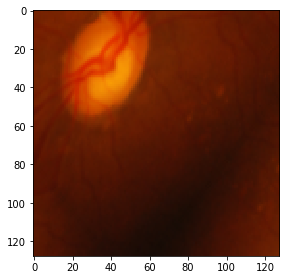

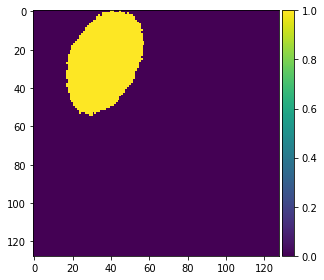

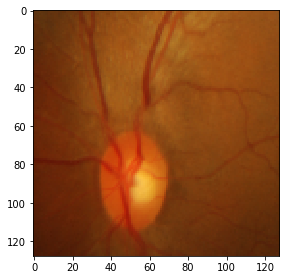

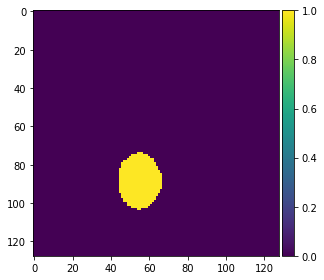

In [0]:
'''
from matplotlib import pyplot as plt
%matplotlib inline

imshow(x.next()[0].astype(np.uint8))
plt.show()
imshow(np.squeeze(y.next()[0].astype(np.uint8)))
plt.show()
imshow(x_val.next()[0].astype(np.uint8))
plt.show()
imshow(np.squeeze(y_val.next()[0].astype(np.uint8)))
plt.show()
'''

In [0]:
# step 2) 
#creating a training and validation generator that generate masks and images
'''
train_generator = zip(x, y)
val_generator = zip(x_val, y_val)
'''

### [Keras ImageDataGenerator not working, further this method outputs format in tensor instead of float format needed for prediction] 

ImageDataGenerator class

keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format='channels_last', validation_split=0.0, interpolation_order=1, dtype='float32')

Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).

In [0]:
## step 1&2) Keras ImageDataGenerator revised process referencing below tutorial
#https://towardsdatascience.com/a-keras-pipeline-for-image-segmentation-part-1-6515a421157d

In [0]:
# Rescaling image data by 255
# https://stackoverflow.com/questions/56616098/is-image-needed-to-rescale-before-predicting-with-model-that-trained-with-imaged

In [0]:
'''
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255, #https://stackoverflow.com/questions/56616098/is-image-needed-to-rescale-before-predicting-with-model-that-trained-with-imaged
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)
        
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
'''

In [0]:
TRAINframe_PATH = '/content/gdrive/My Drive/Drishti_Resized_Data/train_frames/'
TRAINmask_PATH = '/content/gdrive/My Drive/Drishti_Resized_Data/train_masks/'


According to the Keras documentation: 
flow_from_directory(directory), Description:Takes the path to a directory, and generates batches of augmented/normalized data. Yields batches indefinitely, in an infinite loop.

With shuffle = False, it takes the same batch indefinitely. leading to these accuracy values. I changed shuffle = True and it works fine now.

In [0]:
## error message: Found 0 images belonging to 0 classes.
#https://kylewbanks.com/blog/loading-unlabeled-images-with-imagedatagenerator-flowfromdirectory-keras
'''
There could be two situations when you run ImageDataGenerator on test set of images.

Case #1: Test folder has subfolders representing the classes. Peter has answered this part.

Case #2: There are no labelled test images. In this case, you will have a single test folder which contains all the images that you want to classify.

Kyle Banks has written a tip to handle this in his blog: https://kylewbanks.com/blog/loading-unlabeled-images-with-imagedatagenerator-flowfromdirectory-keras

shareimprove this answerfollow
answered Jul 27 '19 at 15:27

Kaushik Acharya
'''
Solution to image segmentation use of `flow_from_directory`: 
#https://stackoverflow.com/questions/45510403/keras-for-semantic-segmentation-flow-from-directory-error


In [0]:
'''
# Directory 
directory = "ihritik"
  
# Parent Directory path 
parent_dir = "/home/User/Documents/GeeksForGeeks"
  
# Path 
path = os.path.join(parent_dir, directory) 
  
# Create the directory 
# 'ihritik' 
os.makedirs(path) 
print("Directory '%s' created" %directory) 
'''
#os.makedir(DATA_PATH + '/' + folder) 


In [0]:
#!mkdir '/content/gdrive/My Drive/Drishti_Resized_Data/train_frames/train/'
#!mkdir  '/content/gdrive/My Drive/Drishti_Resized_Data/train_masks/train/'

In [0]:
#!mkdir '/content/gdrive/My Drive/Drishti_Resized_Data/val_frames/val/'
#!mkdir '/content/gdrive/My Drive/Drishti_Resized_Data/val_masks/val/'

In [0]:
#!mkdir '/content/gdrive/My Drive/Drishti_Resized_Data/test_frames/test/'
#!mkdir '/content/gdrive/My Drive/Drishti_Resized_Data/test_masks/test/'

mkdir: cannot create directory ‘/content/gdrive/My Drive/Drishti_Resized_Data/test_masks/test/’: File exists


In [0]:
'''
https://keras.io/preprocessing/image/
flow_from_directory
flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')
Takes the path to a directory & generates batches of augmented data.

Returns:
A DirectoryIterator yielding tuples of (x, y)
where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) 
and y is a numpy array of corresponding labels.

subset: Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.
target_size: Tuple of integers (height, width), default: (256, 256). The dimensions to which all images found will be resized.
'''

In [0]:
'''
So first of all the test images should be placed inside a separate folder inside the test folder. So in my case I made another folder inside test folder and named it all_classes. Then ran the following code:

test_generator = test_datagen.flow_from_directory(
    directory=pred_dir,
    target_size=(28, 28),
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)
The above code gives me an output:

Found 306 images belonging to 1 class

And most importantly you've to write the following code:

test_generator.reset()

else weird outputs will come. Then using the .predict_generator() function:

pred=cnn.predict_generator(test_generator,verbose=1,steps=306/batch_size)

Running the above code will give output in probabilities so at first I need to convert them to class number. In my case it was 4 classes, so class numbers were 0,1,2 and 3.

Code written:

predicted_class_indices=np.argmax(pred,axis=1)

Next step is I want the name of the classes:

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
Where by class numbers will be replaced by the class names. One final step if you want to save it to a csv file, arrange it in a dataframe with the image names appended with the class predicted.

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
Display your dataframe. Everything is done now. You get all the predicted class for your images.

shareimprove this answerfollow
edited Jan 23 '19 at 18:15
answered Sep 11 '18 at 9:51
'''

In [0]:
'''
Solution for path:
Its Just about your file path look here is my file for training images =

C:/Users/Admin/python/Dataset/training_set/data

here is my file for test images =

C:/Users/Admin/python/Dataset/test_set/data and in data folder of each path i have put my images.

but now , if you are giving this in a command , you need to give it as:

test_set = train_datagen.flow_from_directory('C:/Users/Admin/python/Dataset/test_set',target_size=(435,116),batch_size=4,class_mode='binary')
and

test_set = train_datagen.flow_from_directory('C:/Users/Admin/python/Dataset/test_set',target_size=(435,116),batch_size=4,class_mode='binary')
Do not mention 'data' folder in this path. this will solve the issue

shareimprove this answerfollow
edited Aug 20 '19 at 8:41

mate00
1,88533 gold badges1818 silver badges2525 bronze badges
answered Aug 20 '19 at 7:22

Kamini Salunke
'''

In [0]:
# (not implemented yet) Provide the same seed and keyword arguments to the fit and flow methods seed = 1 
'''
image_datagen.fit(images, augment=True, seed=seed) 
mask_datagen.fit(masks, augment=True, seed=seed)
'''

In [0]:
# initiate the generation process using `flow_from_directory`: 

# Set some parameters
batch_size = 8 # the higher the better
img_width = 128 # for faster computing on kaggle
img_height = 128 # for faster computing on kaggle
IMG_CHANNELS = 3
MASK_CHANNELS = 1

'''
#train_image_generator.reset()
train_image_generator = train_datagen.flow_from_directory(
'/content/gdrive/My Drive/Drishti_Resized_Data/train_frames', #'data/train_frames/train',
class_mode = None,
subset="training",
target_size=(img_width, img_height),
color_mode="rgb",
batch_size = batch_size) #NORMALLY 4/8/16/32)

train_mask_generator = train_datagen.flow_from_directory(
'/content/gdrive/My Drive/Drishti_Resized_Data/train_masks', #'data/train_masks/train',
class_mode = None,
subset="training",
target_size=(img_width, img_height),
color_mode="grayscale",
batch_size = batch_size) #NORMALLY 4/8/16/32)

val_image_generator = val_datagen.flow_from_directory(
'/content/gdrive/My Drive/Drishti_Resized_Data/val_frames', #'data/val_frames/val',
class_mode = None,
subset="validation",
target_size=(img_width, img_height),
color_mode="rgb",
batch_size = batch_size) #NORMALLY 4/8/16/32)

val_mask_generator = val_datagen.flow_from_directory(
'/content/gdrive/My Drive/Drishti_Resized_Data/val_masks', #'data/val_masks/val',
class_mode = None,
subset="validation",
target_size=(img_width, img_height),
color_mode="grayscale",
batch_size = batch_size) #NORMALLY 4/8/16/32)

test_image_generator = test_datagen.flow_from_directory(
'/content/gdrive/My Drive/Drishti_Resized_Data/test_frames', #'data/val_frames/val',
class_mode = None,
subset="validation",
target_size=(img_width, img_height),
color_mode="rgb",
batch_size = batch_size) #NORMALLY 4/8/16/32)

test_mask_generator = test_datagen.flow_from_directory(
'/content/gdrive/My Drive/Drishti_Resized_Data/test_masks', #'data/val_masks/val',
class_mode = None,
subset="validation",
target_size=(img_width, img_height),
color_mode="grayscale",
batch_size = batch_size) #NORMALLY 4/8/16/32)
'''
#errors in file ingestion or path:

'''
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
'''


'\nFound 0 images belonging to 0 classes.\nFound 0 images belonging to 0 classes.\nFound 0 images belonging to 0 classes.\nFound 0 images belonging to 0 classes.\nFound 0 images belonging to 0 classes.\nFound 0 images belonging to 0 classes.\n'

In [0]:
'''
train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)
test_generator = zip(test_image_generator, test_mask_generator)
'''

In [0]:
#Define IoU metric in TFv1:
'''def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        #https://www.tensorflow.org/api_docs/python/tf/cast
        y_pred_ = tf.dtypes.cast(y_pred > t, tf.int32) #tf.to_int32(y_pred > t): convert to TF2 syntax: tf.dtypes.cast(x, tf.int32)  # [1, 2], dtype=tf.int32
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)
    '''

In [0]:
https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanIoU:
'''
model = tf.keras.Model(inputs, outputs)
model.compile(
  'sgd',
  loss='mse',
  metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])

Args:
num_classes: The possible number of labels the prediction task can have. This value must be provided, since a confusion matrix of dimension = [num_classes, num_classes] will be allocated.
name: (Optional) string name of the metric instance.
dtype: (Optional) data type of the metric result.
'''

### https://stackoverflow.com/questions/59990587/tf-keras-metrics-meaniou-with-sigmoid-layer
I have a network for semantic segmentation and the last layer of my model applies a sigmoid activation, so all predictions are scaled between 0-1. There is this validation metric tf.keras.metrics.MeanIoU(num_classes), which compares classified predictions (0 or 1) with validation (0 or 1). So if i make a prediction and apply this metric, will it automatically map the continuous predictions to binary with threshold = 0.5? Are there any possibilities to manually define the threshold?


In [0]:
#why decide on 128x128 image size?

In [0]:
### Converting previous Keras model to tf.keras estimator model

## https://androidkt.com/tensorflow-keras-unet-for-image-image-segmentation/
# Build U-Net model
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

import keras.backend as K
#def mean_pred(y_true, y_pred):
#    return K.mean(y_pred)
## https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2
def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou
def dice_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
  dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  return dice

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
 
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
 
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c5)
 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',
                            padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
tfmodel = tf.keras.Model(inputs=[inputs], outputs=[outputs])
#mIOU = tf.keras.metrics.MeanIoU(num_classes=2)

tfmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=[iou_coef, dice_coef, 'accuracy']) #-> change los funcs
tfmodel.summary()

#custom defined performance metrics in Keras:
'''
import keras.backend as K
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])
'''

##myKerasModel = build_keras_model(...) # put your keras model here
#tfCompatibleMod = tf.keras.models.Model(model2) # cast to type tensorflow expect

##Rohan original: model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.MeanIoU(num_classes=2),'accuracy']) 
#tfCompatibleMod.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.MeanIoU(num_classes=2),'accuracy']) # compile
#estimator_model = tf.keras.estimator.model_to_estimator(keras_model=tfCompatibleMod)

# TF2 error: AttributeError: module 'tensorflow_core.python.keras.api._v2.keras.metrics' has no attribute 'mean_iou
## wip: add Dice-score() performance

#model.summary()
#estimator_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

"\nimport keras.backend as K\ndef mean_pred(y_true, y_pred):\n    return K.mean(y_pred)\n\nmodel.compile(optimizer='rmsprop',\n              loss='binary_crossentropy',\n              metrics=['accuracy', mean_pred])\n"

In [0]:
type(tfmodel) #tensorflow.python.keras.engine.training.Model

tensorflow.python.keras.engine.training.Model

In [0]:
# error: AttributeError: 'ModelCheckpoint' object has no attribute '_implements_train_batch_hooks'
#https://stackoverflow.com/questions/57122907/tensorboard-attributeerror-modelcheckpoint-object-has-no-attribute-on-train

In [0]:
# U-net v1: 
#earlystopper = EarlyStopping(patience=3, verbose=2)
'''
checkpointer = ModelCheckpoint('UNetmodelv1-tfsmodel-v001.h5', verbose=2, save_best_only=True)
results = tfmodel.fit(train_generator, 
                      validation_data= val_generator, 
                      validation_steps=10, steps_per_epoch= 80, #is a random assignment: steps_per_epoch=250
                      epochs=10, 
                      callbacks= [checkpointer]) #[earlystopper, checkpointer])
                      '''

Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 0.1796 - mean_io_u_1: 0.4670 - accuracy: 0.9274
Epoch 00001: val_loss improved from inf to 0.05580, saving model to UNetmodelv1-tfsmodel-v001.h5
80/80 [==============================] - 22s 279ms/step - loss: 0.1796 - mean_io_u_1: 0.4670 - accuracy: 0.9274 - val_loss: 0.0558 - val_mean_io_u_1: 0.4794 - val_accuracy: 0.9724
Epoch 2/10
80/80 [==============================] - ETA: 0s - loss: 0.0592 - mean_io_u_1: 0.4673 - accuracy: 0.9718
Epoch 00002: val_loss improved from 0.05580 to 0.04932, saving model to UNetmodelv1-tfsmodel-v001.h5
80/80 [==============================] - 22s 275ms/step - loss: 0.0592 - mean_io_u_1: 0.4673 - accuracy: 0.9718 - val_loss: 0.0493 - val_mean_io_u_1: 0.4794 - val_accuracy: 0.9783
Epoch 3/10
80/80 [==============================] - ETA: 0s - loss: 0.0455 - mean_io_u_1: 0.4674 - accuracy: 0.9763
Epoch 00003: val_loss improved from 0.04932 to 0.03854, saving model to UNetmodelv1-tfsmodel-v

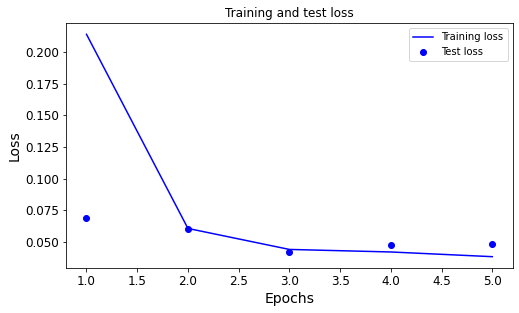

In [0]:
'''
loss = results.history['loss']
val_loss= results.history['val_loss']
#acc=history.history['dice_coef']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 4.5))
plt.plot(epochs, loss, 'b', label='Training loss')
# bo is blue dots
plt.plot(epochs, val_loss, 'bo', label='Test loss')
# b is for "solid blue line"
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
#plt.savefig(os.path.join('/content/gdrive/My Drive/FIG','loss'+name+'.png'),dpi=600)
'''


In [0]:
X_train.shape, Y_train.shape

((40, 128, 128, 3), (40, 128, 128, 1))

In [0]:
X_val.shape, Y_val.shape

((5, 128, 128, 3), (5, 128, 128, 1))

In [0]:
'''
https://github.com/mhwilder/tf-keras-gcloud-deployment/blob/master/train.py
model.fit(X_train,
          y_train,
          batch_size=2,
          epochs=10,
          validation_data=(X_val,y_val),
          callbacks=callbacks)
          '''

In [0]:
batch_size = 8

In [0]:
steps_per_epoch = len(X_train)/ batch_size
steps_per_epoch

5.0

In [0]:
# U-net v2: without data augmentation
#earlystopper = EarlyStopping(patience=3, verbose=2)
checkpointer_v2 = ModelCheckpoint('UNetmodelv1-tfsmodel-v002.h5', verbose=3, save_best_only=True)

results_v2 = tfmodel.fit(X_train,
                         Y_train,  
                        validation_data= (X_val, Y_val), 
                      steps_per_epoch= 5, #should be equal (training images/ batch size)
                      epochs= 30, 
                      callbacks= [checkpointer_v2]) #[earlystopper, checkpointer])

Train on 40 samples, validate on 5 samples
Epoch 1/30
32/40 [=======================>......] - ETA: 0s - loss: 0.3033 - iou_coef: 0.0296 - dice_coef: 0.0571 - accuracy: 0.9310
Epoch 00001: val_loss improved from inf to 0.23848, saving model to UNetmodelv1-tfsmodel-v002.h5
40/40 [==============================] - 1s 36ms/sample - loss: 0.2934 - iou_coef: 0.0316 - dice_coef: 0.0606 - accuracy: 0.9319 - val_loss: 0.2385 - val_iou_coef: 0.0294 - val_dice_coef: 0.0565 - val_accuracy: 0.9372
Epoch 2/30
32/40 [=======================>......] - ETA: 0s - loss: 0.2562 - iou_coef: 0.0485 - dice_coef: 0.0917 - accuracy: 0.9300
Epoch 00002: val_loss did not improve from 0.23848
40/40 [==============================] - 1s 32ms/sample - loss: 0.2425 - iou_coef: 0.0571 - dice_coef: 0.1067 - accuracy: 0.9325 - val_loss: 0.3236 - val_iou_coef: 0.0937 - val_dice_coef: 0.1698 - val_accuracy: 0.9039
Epoch 3/30
32/40 [=======================>......] - ETA: 0s - loss: 0.3157 - iou_coef: 0.0631 - dice_coef: 

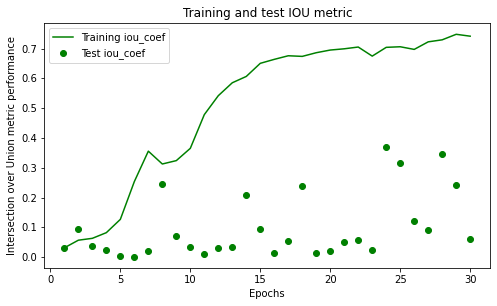

In [0]:
# U-net v2: without data augmentation
iou_coef = results_v2.history['iou_coef']
val_iou_coef = results_v2.history['val_iou_coef']
#acc=history.history['dice_coef']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 4.5))
plt.plot(epochs, iou_coef, 'g', label='Training iou_coef')
# bo is blue dots
plt.plot(epochs, val_iou_coef, 'go', label='Test iou_coef')
# b is for "solid blue line"
plt.title('Training and test IOU metric')
plt.xlabel('Epochs')
plt.ylabel('Intersection over Union metric performance')
plt.legend()

plt.show()
#plt.savefig(os.path.join('/content/gdrive/My Drive/FIG','loss'+name+'.png'),dpi=600)


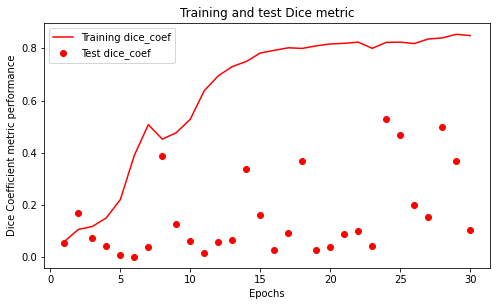

In [0]:
# U-net v2: without data augmentation
dice_coef = results_v2.history['dice_coef']
val_dice_coef = results_v2.history['val_dice_coef']
#acc=history.history['dice_coef']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 4.5))
plt.plot(epochs, dice_coef, 'r', label='Training dice_coef')
# bo is blue dots
plt.plot(epochs, val_dice_coef, 'ro', label='Test dice_coef')
# b is for "solid blue line"
plt.title('Training and test Dice metric')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient metric performance')
plt.legend()

plt.show()

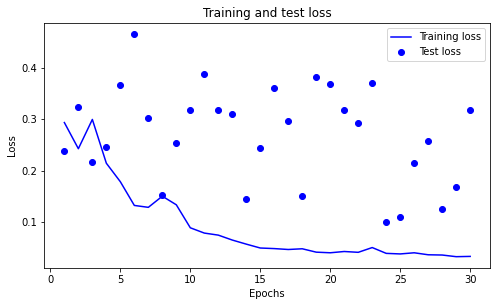

In [0]:
# U-net v2: without data augmentation
loss = results_v2.history['loss']
val_loss = results_v2.history['val_loss']
#acc=history.history['dice_coef']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 4.5))
plt.plot(epochs, loss, 'b', label='Training loss')
# bo is blue dots
plt.plot(epochs, val_loss, 'bo', label='Test loss')
# b is for "solid blue line"
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
#plt.savefig(os.path.join('/content/gdrive/My Drive/FIG','loss'+name+'.png'),dpi=600)


In [0]:
## need to modify before saving as SavedModel object
#https://stackoverflow.com/questions/55857522/how-to-create-a-serving-input-fn-in-tensorflow-2-0-for-image-preprocessing
#Expanding and simplifying @harry-salmon answer. For me the following worked:

def save_model_with_serving_signature(model, model_path):
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, ], dtype=tf.string)])
    
    def serve_load_and_preprocess_path(image_paths):
        return model(tf.map_fn(load_and_preprocess_path, image_paths, dtype=tf.float32))
    
    tf.saved_model.save(
        model,
        model_path,
        signatures=serve_load_and_preprocess_path
    )


In [0]:
## to solve: SignatureDefs in Savedmodels
#https://www.tensorflow.org/tfx/serving/signature_defs

signature_def: {
  key  : "my_prediction_signature"
  value: {
    inputs: {
      key  : "images"
      value: {
        name: "x:0"
        dtype: ...
        tensor_shape: ...
      }
    }
    outputs: {
      key  : "scores"
      value: {
        name: "y:0"
        dtype: ...
        tensor_shape: ...
      }
    }
    method_name: "tensorflow/serving/predict"
  }
}

#### Prior model versions comparison

In [0]:
#model training 1st attempt: start 041120 11:52pm 
'''
Epoch 1/10
 49/250 [====>.........................] - ETA: 7:24 - loss: 0.2588 - mean_iou: 0.4533 - accuracy: 0.9021

#2nd attempt: 041220
 Epoch 1/10
250/250 [==============================] - 554s 2s/step - loss: 0.0270 - mean_iou: 0.8726 - accuracy: 0.9848 - val_loss: 0.3874 - val_mean_iou: 0.8754 - val_accuracy: 0.9744

Epoch 00001: val_loss improved from inf to 0.38741, saving model to model-dsbowl2018-1.h5
Epoch 2/10
250/250 [==============================] - 550s 2s/step - loss: 0.0166 - mean_iou: 0.8781 - accuracy: 0.9871 - val_loss: 0.1127 - val_mean_iou: 0.8809 - val_accuracy: 0.9716

Epoch 00002: val_loss improved from 0.38741 to 0.11265, saving model to model-dsbowl2018-1.h5
Epoch 3/10
250/250 [==============================] - 556s 2s/step - loss: 0.0159 - mean_iou: 0.8834 - accuracy: 0.9874 - val_loss: 0.0813 - val_mean_iou: 0.8858 - val_accuracy: 0.9789

Epoch 00003: val_loss improved from 0.11265 to 0.08133, saving model to model-dsbowl2018-1.h5
Epoch 4/10
250/250 [==============================] - 553s 2s/step - loss: 0.0144 - mean_iou: 0.8881 - accuracy: 0.9879 - val_loss: 0.0825 - val_mean_iou: 0.8904 - val_accuracy: 0.9806

Epoch 00004: val_loss did not improve from 0.08133
Epoch 5/10
250/250 [==============================] - 553s 2s/step - loss: 0.0140 - mean_iou: 0.8925 - accuracy: 0.9880 - val_loss: 0.0905 - val_mean_iou: 0.8945 - val_accuracy: 0.9789

Epoch 00005: val_loss did not improve from 0.08133
Epoch 6/10
250/250 [==============================] - 554s 2s/step - loss: 0.0187 - mean_iou: 0.8961 - accuracy: 0.9864 - val_loss: 0.0608 - val_mean_iou: 0.8969 - val_accuracy: 0.9802

Epoch 00006: val_loss improved from 0.08133 to 0.06083, saving model to model-dsbowl2018-1.h5
Epoch 7/10
250/250 [==============================] - 550s 2s/step - loss: 0.0155 - mean_iou: 0.8982 - accuracy: 0.9875 - val_loss: 0.0860 - val_mean_iou: 0.8998 - val_accuracy: 0.9836

Epoch 00007: val_loss did not improve from 0.06083
Epoch 8/10
250/250 [==============================] - 548s 2s/step - loss: 0.0134 - mean_iou: 0.9012 - accuracy: 0.9882 - val_loss: 0.1100 - val_mean_iou: 0.9027 - val_accuracy: 0.9783

Epoch 00008: val_loss did not improve from 0.06083
Epoch 9/10
250/250 [==============================] - 552s 2s/step - loss: 0.0151 - mean_iou: 0.9040 - accuracy: 0.9877 - val_loss: 0.1358 - val_mean_iou: 0.9050 - val_accuracy: 0.9773

Epoch 00009: val_loss did not improve from 0.06083
Epoch 00009: early stopping
'''

In [0]:
'''Rohan tf1 original Unet training on Apr 11 20: 
3rd attempt results:
Epoch 1/10
250/250 [==============================] - 553s 2s/step - loss: 0.0186 - mean_iou: 0.9058 - accuracy: 0.9877 - val_loss: 0.0905 - val_mean_iou: 0.9071 - val_accuracy: 0.9817
Epoch 2/10
250/250 [==============================] - 553s 2s/step - loss: 0.0118 - mean_iou: 0.9083 - accuracy: 0.9888 - val_loss: 0.0991 - val_mean_iou: 0.9095 - val_accuracy: 0.9813
Epoch 3/10
250/250 [==============================] - 554s 2s/step - loss: 0.0115 - mean_iou: 0.9106 - accuracy: 0.9888 - val_loss: 0.1089 - val_mean_iou: 0.9118 - val_accuracy: 0.9792
Epoch 4/10
250/250 [==============================] - 555s 2s/step - loss: 0.0114 - mean_iou: 0.9128 - accuracy: 0.9890 - val_loss: 0.1200 - val_mean_iou: 0.9138 - val_accuracy: 0.9802
Epoch 5/10
250/250 [==============================] - 555s 2s/step - loss: 0.0111 - mean_iou: 0.9148 - accuracy: 0.9889 - val_loss: 0.1159 - val_mean_iou: 0.9157 - val_accuracy: 0.9796
Epoch 6/10
250/250 [==============================] - 555s 2s/step - loss: 0.0108 - mean_iou: 0.9166 - accuracy: 0.9891 - val_loss: 0.1091 - val_mean_iou: 0.9175 - val_accuracy: 0.9805
Epoch 7/10
250/250 [==============================] - 556s 2s/step - loss: 0.0115 - mean_iou: 0.9183 - accuracy: 0.9889 - val_loss: 0.1066 - val_mean_iou: 0.9191 - val_accuracy: 0.9742
Epoch 8/10
250/250 [==============================] - 560s 2s/step - loss: 0.0115 - mean_iou: 0.9197 - accuracy: 0.9888 - val_loss: 0.1162 - val_mean_iou: 0.9205 - val_accuracy: 0.9780
Epoch 9/10
250/250 [==============================] - 555s 2s/step - loss: 0.0107 - mean_iou: 0.9212 - accuracy: 0.9891 - val_loss: 0.1331 - val_mean_iou: 0.9219 - val_accuracy: 0.9776
Epoch 10/10
250/250 [==============================] - 554s 2s/step - loss: 0.0104 - mean_iou: 0.9226 - accuracy: 0.9892 - val_loss: 0.1360 - val_mean_iou: 0.9233 - val_accuracy: 0.9763
'''

### Try a more simple U-net for version b
https://www.programcreek.com/python/example/97196/keras.engine.training.Model

```
def get_simple_unet(input_shape):
    img_input = Input(input_shape)
    conv1 = conv_block_simple(img_input, 32, "conv1_1")
    conv1 = conv_block_simple(conv1, 32, "conv1_2")
    pool1 = MaxPooling2D((2, 2), strides=(2, 2), padding="same", name="pool1")(conv1)

    conv2 = conv_block_simple(pool1, 64, "conv2_1")
    conv2 = conv_block_simple(conv2, 64, "conv2_2")
    pool2 = MaxPooling2D((2, 2), strides=(2, 2), padding="same", name="pool2")(conv2)

    conv3 = conv_block_simple(pool2, 128, "conv3_1")
    conv3 = conv_block_simple(conv3, 128, "conv3_2")
    pool3 = MaxPooling2D((2, 2), strides=(2, 2), padding="same", name="pool3")(conv3)

    conv4 = conv_block_simple(pool3, 256, "conv4_1")
    conv4 = conv_block_simple(conv4, 256, "conv4_2")
    conv4 = conv_block_simple(conv4, 256, "conv4_3")

    up5 = concatenate([UpSampling2D()(conv4), conv3], axis=-1)
    conv5 = conv_block_simple(up5, 128, "conv5_1")
    conv5 = conv_block_simple(conv5, 128, "conv5_2")

    up6 = concatenate([UpSampling2D()(conv5), conv2], axis=-1)
    conv6 = conv_block_simple(up6, 64, "conv6_1")
    conv6 = conv_block_simple(conv6, 64, "conv6_2")

    up7 = concatenate([UpSampling2D()(conv6), conv1], axis=-1)
    conv7 = conv_block_simple(up7, 32, "conv7_1")
    conv7 = conv_block_simple(conv7, 32, "conv7_2")

    conv7 = SpatialDropout2D(0.2)(conv7)

    prediction = Conv2D(1, (1, 1), activation="sigmoid", name="prediction")(conv7)
    model = Model(img_input, prediction)
    return model 
  ````

# TF Serving Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0 

Christine notes:
The below script
- installs and setups `tensorflow-model-server`
- 


In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" > /etc/apt/sources.list.d/tensorflow-serving.list
    !curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
    !apt update && apt-get install -y tensorflow-model-server
    !pip install -q -U tensorflow-serving-api
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
#import tensorflow as tf
#from tensorflow import keras
#assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a TPU or GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU or TPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
#tf.random.set_seed(42) error: module 'tensorflow._api.v1.random' has no attribute 'set_seed'

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deploy"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  56596      0 --:--:-- --:--:-- --:--:-- 56596
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http:

# Part B) Model Deployment to GCP

# Deploying TensorFlow models to TensorFlow Serving (TFS)
We will use the REST API or the gRPC API.

## Save/Load a `SavedModel`

In [0]:
#https://stackoverflow.com/questions/45912684/in-tensorflow-how-can-i-read-my-predictions-from-a-generator
'''input_fn = tf.estimator.inputs.numpy_input_fn(my_data_to_predict)
for single_prediction in SN_classifier.predict(input_fn):
    predicted_class = single_prediction['class']
    probability = single_prediction['probability']
    do_something_with(predicted_class, probability)
'''


In [0]:
#np.round(model.predict(X_new), 2)
#np.round((model.predict(batch_X)[...,0]>0.5).astype(np.float32), 2)

In [0]:
!mkdir "/content/gdrive/My Drive/TFserving" 

mkdir: cannot create directory ‘/content/gdrive/My Drive/TFserving’: File exists


In [0]:
'''
model_version = "0001"
model_name = "tfUNETv1_TFServemodel"
model_path = os.path.join('/content/gdrive/My Drive/TFserving/'+ model_name, model_version) #'/content/gdrive/My Drive/GPU/'+
'''

In [0]:
model_version = "0002"
model_name = "tfUNETv1_TFServemodel"
model_path_v2 = os.path.join('/content/gdrive/My Drive/TFserving/'+ model_name, model_version) #'/content/gdrive/My Drive/GPU/'+

In [0]:
model_path = '/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0001'

In [0]:
model_path_v2 = '/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002'

In [0]:
#!rm -rf {model_name}

### TF Serving saved_model.save(): 
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/saved_model.ipynb

In [0]:
https://www.tensorflow.org/guide/keras/save_and_serialize

**Approach 2:**
Second approach is by using model.save to save whole model and by using load_model to restore previously stored subclassed model. The following code snippets describe how to implement them.
``` python
# Save the model
model.save('path_to_my_model',save_format='tf')

# Recreate the exact same model purely from the file
new_model = keras.models.load_model('path_to_my_model')
```

**Approach 3:**

Third approach is by using tf.saved_model.save. This is equivalent to the tf format in model.save. You can once again call load_model to restore the previously saved subclassed model. The following code snippets describe how to implement them.
```
# Save the model
tf.saved_model.save(model,'my_saved_model')
# Restoring the model
restored_saved_model = keras.models.load_model('my_saved_model')
```

### Errors with Convert keras model to estimator model #14203

https://github.com/keras-team/keras/issues/9310
Hello calpeyser,
Using tensorflow's implementation of keras did not completely solve the problem, because I use a model with custom layers. I observed that tensorflow's keras version does not call the compute_output_shape function of my custom layers, even though this is crucial for my unpooling layer.
For me, it worked to simply cast the keras model to the tensorflow one:
```
myKerasModel = build_keras_model(...) # put your keras model here
tfCompatibleMod = tf.keras.models.Model(myKerasModel) # cast to type tensorflow expect
tfCompatibleMod.compile(...) # compile
estimator = tf.keras.estimator.model_to_estimator(keras_model=tfCompatibleMod)
```
I hope to help anyone who finds it here.

Edit: I encountered bugs when trying to train the network with a casted keras model, for which no solution could be found. According to other reported issues, there is a problem with some cache introduced in the more recent Keras versions, which stores the network and introduces incompatiblities with tensorflow. I will stop using Keras at this point.

In [0]:
#tf.saved_model.save(model, model_path)
#tf.saved_model.save(pretrained_model, "/tmp/mobilenet/1/")
#tf.saved_model.save(model, "/content/gdrive/My Drive/DSI_capstone/Model_weights/DL-Unet/1/")

'''tf.keras.models.save_model(
    model, filepath, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None
)'''

#Attempt 1: tf.saved_model.save(model, model_path) ->error: ValueError: Expected a Trackable object for export, got <keras.engine.training.Model object at 0x7f92407b6128>.
#Attempt 2: model.save(model_path) #save_format='tf' -> error:OSError: Unable to create file (unable to open file: name = '/content/gdrive/My Drive/TFserving/capstone_TPU-UNETv2_TFServemodel/0001', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [0]:
'''
## need to modify before saving as SavedModel object
#https://stackoverflow.com/questions/55857522/how-to-create-a-serving-input-fn-in-tensorflow-2-0-for-image-preprocessing
#Expanding and simplifying @harry-salmon answer. For me the following worked:

def save_model_with_serving_signature(model, model_path):
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, ], dtype=tf.string)])
    
    def serve_load_and_preprocess_path(image_paths):
        return model(tf.map_fn(load_and_preprocess_path, image_paths, dtype=tf.float32))
    
    tf.saved_model.save(
        model,
        model_path,
        signatures=serve_load_and_preprocess_path
    )

'''

In [0]:
from tensorflow.keras.models import save_model, load_model

#tf.keras.models.save_model(model, model_path)
#print(model_path)
print(model_path_v2)

# Save the model
#tf.saved_model.save(tfmodel,'my_saved_model') #success: INFO:tensorflow:Assets written to: my_saved_model/assets

#
def save_model_with_serving_signature(model, model_path):
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, ], dtype=tf.string)])
    def serve_load_and_preprocess_path(image_paths):
        return model(tf.map_fn( #load_and_preprocess_path, image_paths, dtype=tf.float32)) #return model(tf.map_fn(load_and_preprocess_path, image_paths, dtype=tf.float32))
    tf.saved_model.save(tfmodel, 
                    model_path_v2,
                    signatures=serve_load_and_preprocess_path
                    )
    
#INFO:tensorflow:Assets written to: /content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002/assets

/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002


In [0]:
tfmodel.signatures

AttributeError: ignored

### Successfully executed "tf.saved_model.save(tfmodel, model_path)"!:

```
WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/TFserving/assets
```

In [0]:
# Restoring the model
#saved_model_uNetv1 = tf.saved_model.load(model_path)
saved_tfmodel = tf.saved_model.load(model_path_v2)
saved_tfmodel.signatures

_SignatureMap({'serving_default': <tensorflow.python.saved_model.load._WrapperFunction object at 0x7f9e9f0c96a0>})

In [0]:
# per "Hands-on ML with Scikit,Keras&Tensorflow" p. 670: make sure to pass the inputs as tensors for X_new
#y_predtest = saved_model_v1(x_val, training=False) #(X_new, training=False)
# error: Your session crashed

In [0]:
#type(saved_model_uNetv1)

tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject

## Deploying Saved Model on GCP
https://cloud.google.com/ai-platform/prediction/docs/deploying-models

TensorFlow tags and signatures
If you export a SavedModel from tf.keras or from a TensorFlow estimator, the exported graph is ready for serving by default. 


This page explains how to deploy your model to AI Platform Prediction to get predictions.
In order to deploy your trained model on AI Platform Prediction, you must:

1. Upload your saved model to a Cloud Storage bucket.
2. Create an AI Platform Prediction model resource.
3. Create an AI Platform Prediction version resource, specifying the Cloud Storage path to your saved model.

Before you begin
Train your machine learning model and follow the guide to exporting models for prediction to create model artifacts that can be deployed to AI Platform Prediction.

In [0]:
!python -V 

Python 3.6.9


In [0]:
!pwd

/content


In [0]:
!ls

gdrive	images	sample_data  UNetmodelv1-tfsmodel-v002.h5


DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started 

In [0]:
https://cloud.google.com/docs/authentication/getting-started

Setting the environment variable
If you plan to use a service account, you need to set an environment variable.

Provide authentication credentials to your application code by setting the environment variable GOOGLE_APPLICATION_CREDENTIALS. Replace [PATH] with the file path of the JSON file that contains your service account key, and [FILE_NAME] with the filename. This variable only applies to your current shell session, so if you open a new session, set the variable again.

In [0]:
#!export GOOGLE_APPLICATION_CREDENTIALS="/content/gdrive/My Drive/gcloud/columbia-ds-cohort-2020-b5673c12370c.json"

In [0]:
#https://stackoverflow.com/questions/55106556/how-to-refer-a-file-in-google-colab-when-working-with-python

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#ensure the file is accessible:
#columbia-ds-cohort-2020-0f8a19d7dccf.json
#columbia-ds-cohort-2020-b5673c12370c.json
!ls /content/gdrive/'My Drive'/'gcloud'/

columbia-ds-cohort-2020-0f8a19d7dccf.json
columbia-ds-cohort-2020-b5673c12370c.json


In [0]:
#import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/gcloud/columbia-ds-cohort-2020-b5673c12370c.json"


In [0]:
#ensure the path is set correctly
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/gdrive/My Drive/gcloud/columbia-ds-cohort-2020-b5673c12370c.json


https://cloud.google.com/docs/authentication/getting-started
Verifying authentication
After setting the environment variable, you don't need to explicitly specify your credentials in code when using a Google Cloud client library. The client library can determine your credentials implicitly. For this reason, you can verify that authentication works by setting the environment variable, and then running client library code, such as the following example. If the request succeeds, authentication works.

You must install the Cloud Storage client library to run the following example.

In [0]:
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [0]:
implicit()

[<Bucket: cdr_images_bounding_boxes>, <Bucket: cds-2020-dataset-us-central>, <Bucket: cds_2020_dataset>, <Bucket: hostedkfp-default-2nuyo9pl9v>, <Bucket: image-classification-tutorial>, <Bucket: segmentation-unet-models>, <Bucket: uns_data>]


In [0]:
'''
[<Bucket: cdr_images_bounding_boxes>, <Bucket: cds-2020-dataset-us-central>, <Bucket: cds_2020_dataset>, <Bucket: hostedkfp-default-2nuyo9pl9v>, <Bucket: image-classification-tutorial>, <Bucket: segmentation-unet-models>, <Bucket: uns_data>, <Bucket: your-new-bucket-name>]'''

### Setting up this model's bucket on Storage

This section shows you how to create a new bucket. You can use an existing bucket, but it must be in the same region where you plan on running AI Platform jobs. Additionally, if it is not part of the project you are using to run AI Platform Prediction, you must explicitly grant access to the AI Platform Prediction service accounts.

In [0]:
from google.cloud import storage

In [0]:
# list current buckets
def list_buckets():
    """Lists all buckets."""

    storage_client = storage.Client()
    buckets = storage_client.list_buckets()

    for bucket in buckets:
        print(bucket.name)


In [0]:
list_buckets()
#Forbidden: 403 GET https://www.googleapis.com/storage/v1/b?project=columbia-ds-cohort-2020&projection=noAcl: app-ml-vision@columbia-ds-cohort-2020.iam.gserviceaccount.com does not have storage.buckets.list access to project 961083800355.

cdr_images_bounding_boxes
cds-2020-dataset-us-central
cds_2020_dataset
hostedkfp-default-2nuyo9pl9v
image-classification-tutorial
segmentation-unet-models
uns_data


In [0]:
def create_bucket(bucket_name):
    """Creates a new bucket."""
    # bucket_name = "your-new-bucket-name"

    storage_client = storage.Client()

    bucket = storage_client.create_bucket(bucket_name)

    print("Bucket {} created".format(bucket.name))

In [0]:
#create_bucket("your-new-bucket-name")

Bucket your-new-bucket-name created


1. Specify a name for your new bucket. The name must be unique across all buckets in Cloud Storage.

In [0]:
BUCKET_NAME="segmentation-unet-models"

In [0]:
#create_bucket("segmentation-unet-models")

Bucket segmentation-unet-models created


### Upload the exported model to Cloud Storage
The following examples show how to upload different types of model artifacts to a model directory in Cloud Storage:

TensorFlow SavedModel
```
SAVED_MODEL_DIR=$(ls ./your-export-dir-base | tail -1)
gsutil cp -r $SAVED_MODEL_DIR gs://your-bucket
```

When you export a SavedModel from tf.keras or from a TensorFlow estimator, it gets saved as a timestamped subdirectory of a base export directory that you choose, like your-export-dir-base/1487877383942. This example shows how to upload the directory with the most recent timestamp. If you created your SavedModel in a different way, it may be in a different location on your local filesystem.

In [0]:
!ls "/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/"

0001  0002


In [0]:
model_path #'/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0001'

'/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0001'

In [0]:
model_path_v2

'/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002'

In [0]:
BUCKET_NAME="segmentation-unet-models"

In [0]:
#!SAVED_MODEL_DIR=$(ls ./your-export-dir-base | tail -1) 
#!SAVED_MODEL_DIR=$(ls "/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/" | tail -1) echo "adf $SAVED_MODEL_DIR"
#!gsutil cp -r $SAVED_MODEL_DIR gs://your-bucket
#gsutil cp -r $SAVED_MODEL_DIR gs://segmentation-unet-models
SAVED_MODEL_DIR= !ls "./gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/" | tail -1


In [0]:
SAVED_MODEL_DIR #['0001'] or ['0002']

['0002']

In [0]:
#https://stackoverflow.com/questions/49302859/gsutil-serviceexception-401-anonymous-caller-does-not-have-storage-objects-list
!gsutil config

CommandException: OAuth2 is the preferred authentication mechanism with the Cloud SDK.
Run "gcloud auth login" to configure authentication, unless:
- You don't want gsutil to use OAuth2 credentials from the Cloud SDK,
  but instead want to manage credentials with .boto files generated by
  running "gsutil config"; in which case run "gcloud config set
  pass_credentials_to_gsutil false".
- You want to authenticate with an HMAC access key and secret, in
  which case run "gsutil config -a".


In [0]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?code_challenge=1JdtOQzxo6rdJreNqJ1zuEqCcSfYcCvUMzyjXITbg-w&prompt=select_account&code_challenge_method=S256&access_type=offline&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth


Enter verification code: 4/ywGO0wfr-HW6XFjFWXsd2lzXcSYSd-euwcBLUiiadih4raGp6BJP3SE

You are now logged in as [christinelee.to@gmail.com].
Your current project is [columbia-ds-cohort-2020].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [0]:
!gsutil cp -r "./gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/" gs://segmentation-unet-models/

Copying file://./gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0001/saved_model.pb [Content-Type=application/octet-stream]...
Copying file://./gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0001/variables/variables.index [Content-Type=application/octet-stream]...
Copying file://./gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0001/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
Copying file://./gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002/saved_model.pb [Content-Type=application/octet-stream]...
| [4 files][ 23.7 MiB/ 23.7 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file://./gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002/variables/variables.data-00000-of-00001 [Content-

In [0]:
########### IGNORE FOR NOW #######

### Command line interface for TF Serving

In [0]:
for root, dirs, files in os.walk(model_name):
    indent = '    ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
    for filename in files:
        print('{}{}'.format(indent + '    ', filename))

In [0]:
os.walk(model_name)

<generator object walk at 0x7fdc3c7bd4c0>

#### should return:
```
my_mnist_model/
    0001/
        saved_model.pb
        variables/
            variables.data-00000-of-00001
            variables.index
        assets/
```

In [0]:
!saved_model_cli show --all --dir './gdrive/My Drive/TFserving/' #'./gdrive/My Drive/


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 128, 128, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['conv2d_18'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 128, 128, 1)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0416 22:29:05.235280 140646490068864 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/

In [0]:
!saved_model_cli show --dir './gdrive/My Drive/TFserving/' serve #Should return: The given SavedModel contains the following tag-sets:

usage: saved_model_cli [-h] [-v] {show,run,scan,convert} ...
saved_model_cli: error: unrecognized arguments: serve


In [0]:
!saved_model_cli show --dir './gdrive/My Drive/TFserving/' --tag_set serve

The given SavedModel MetaGraphDef contains SignatureDefs with the following keys:
SignatureDef key: "__saved_model_init_op"
SignatureDef key: "serving_default"


Should return: 
```
The given SavedModel MetaGraphDef contains SignatureDefs with the following keys:
SignatureDef key: "__saved_model_init_op"
SignatureDef key: "serving_default"
```


In [0]:
!saved_model_cli show --dir './gdrive/My Drive/TFserving/' --tag_set serve \
                      --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 128, 128, 3)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['conv2d_18'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 128, 128, 1)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


Should return:
```
The given SavedModel SignatureDef contains the following input(s):
  inputs['flatten_2_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 28, 28, 1)
      name: serving_default_flatten_2_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_5'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 10)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict
```

In [0]:
#!saved_model_cli show --dir {model_path} --all # model_path = './gdrive/My Drive/TFserving/'
!saved_model_cli show --dir './gdrive/My Drive/TFserving/' --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 128, 128, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['conv2d_18'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 128, 128, 1)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0416 22:29:32.818389 139767212255104 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/

Should return:
```
MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['flatten_2_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_flatten_2_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_5'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
```

In [0]:
import numpy as np

In [0]:
type(tfmodel)

tensorflow.python.keras.engine.training.Model

Let's write the new instances to a `npy` file so we can pass them easily to our model:

In [0]:
#np.save("capstone_TPU-Unet_tests.npy", X_new) -> replace "X_new" with a sample Xtest in our case
np.save("capstone_TPU-Unetv1_Xtest.npy", x_val)

NameError: ignored

In [0]:
#input_name = model.input_names[0]
input_name = tfmodel.input_names[0]
input_name #'flatten_2_input'

'flatten_2_input'

And now let's use `saved_model_cli` to make predictions for the instances we just saved:

In [0]:
!saved_model_cli run --dir {model_path} --tag_set serve \
                     --signature_def serving_default    \
                     --inputs {input_name}= capstone_TPU-Unet_tests.npy

2019-06-10 10:56:43.396851: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
W0610 10:56:43.397369 140735810999168 deprecation.py:323] From /Users/ageron/miniconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/tools/saved_model_cli.py:339: load (from tensorflow.python.saved_model.loader_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
W0610 10:56:43.421489 140735810999168 deprecation.py:323] From /Users/ageron/miniconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.

#### above should return:
```
2019-06-10 10:56:43.396851: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
WARNING: Logging before flag parsing goes to stderr.
W0610 10:56:43.397369 140735810999168 deprecation.py:323] From /Users/ageron/miniconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/tools/saved_model_cli.py:339: load (from tensorflow.python.saved_model.loader_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
W0610 10:56:43.421489 140735810999168 deprecation.py:323] From /Users/ageron/miniconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
Result for output key dense_5:
[[1.17575204e-04 1.13160660e-07 5.96997386e-04 2.08104262e-03
  2.57820852e-06 6.44166794e-05 2.77263990e-08 9.96703804e-01
  3.96052455e-05 3.93810158e-04]
 [1.22226949e-03 2.92685600e-05 9.86054957e-01 9.63000767e-03
  8.81790996e-08 2.88744748e-04 1.58111588e-03 1.12290488e-09
  1.19344448e-03 1.09315742e-07]
 [6.40679718e-05 9.63618696e-01 9.04400647e-03 2.98595289e-03
  5.95759891e-04 3.74212675e-03 2.50709383e-03 1.14931818e-02
  5.52693009e-03 4.22279176e-04]]
  ```

In [0]:
np.round([[1.1739199e-04, 1.1239604e-07, 6.0210604e-04, 2.0804715e-03, 2.5779348e-06,
           6.4079795e-05, 2.7411186e-08, 9.9669880e-01, 3.9654213e-05, 3.9471846e-04],
          [1.2294615e-03, 2.9207937e-05, 9.8599273e-01, 9.6755642e-03, 8.8930705e-08,
           2.9156188e-04, 1.5831805e-03, 1.1311053e-09, 1.1980456e-03, 1.1113169e-07],
          [6.4066830e-05, 9.6359509e-01, 9.0598064e-03, 2.9872139e-03, 5.9552520e-04,
           3.7478798e-03, 2.5074568e-03, 1.1462728e-02, 5.5553433e-03, 4.2495009e-04]], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.96, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  ]])

In [0]:
########### IGNORE FOR NOW #######

In [0]:
########### IGNORE FOR NOW #######

## TensorFlow Serving

Install [Docker](https://docs.docker.com/install/) if you don't have it already. Then run:

```bash
docker pull tensorflow/serving

export ML_PATH=$HOME/ml # or wherever this project is
docker run -it --rm -p 8500:8500 -p 8501:8501 \
   -v "$ML_PATH/my_mnist_model:/models/my_mnist_model" \
   -e MODEL_NAME=my_mnist_model \
   tensorflow/serving
```
Once you are finished using it, press Ctrl-C to shut down the server.

In [0]:
#model_path = '/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0001'

In [0]:
#%cd "gdrive"

[Errno 2] No such file or directory: 'gdrive'
/content/gdrive


In [0]:
#!pwd

/content/gdrive


In [0]:
print('\nSaved model:')
!ls -l "/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0001"
print('\nSaved model:')
!ls -l "/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002"


Saved model:
total 771
drwx------ 2 root root   4096 Apr 16 22:27 assets
-rw------- 1 root root 780502 Apr 17 20:12 saved_model.pb
drwx------ 2 root root   4096 Apr 16 22:27 variables

Saved model:
total 804
drwx------ 2 root root   4096 Apr 20 00:22 assets
-rw------- 1 root root 815092 Apr 21 03:05 saved_model.pb
drwx------ 2 root root   4096 Apr 21 03:05 variables


In [0]:
#!ls -l model_path
#ls: cannot access 'model_path': No such file or directory

Alternatively, if `tensorflow_model_server` is installed (e.g., if you are running this notebook in Colab), then the following 3 cells will start the server:

In [0]:
os.environ["MODEL_DIR"] = os.path.split(os.path.abspath(model_path_v2))[0]

In [0]:
os.environ["MODEL_DIR"] #'/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel'

'/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel'

In [0]:
%%bash --bg
nohup tensorflow_model_server \
     --rest_api_port=8501 \
     --model_name=UNET \ #my_mnist_model \
     --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [0]:
!tail server.log  #tail: cannot open 'server.log' for reading: No such file or directory

	--tensorflow_session_parallelism=0	int64	Number of threads to use for running a Tensorflow session. Auto-configured by default.Note that this option is ignored if --platform_config_file is non-empty.
	--tensorflow_intra_op_parallelism=0	int64	Number of threads to use to parallelize the executionof an individual op. Auto-configured by default.Note that this option is ignored if --platform_config_file is non-empty.
	--tensorflow_inter_op_parallelism=0	int64	Controls the number of operators that can be executed simultaneously. Auto-configured by default.Note that this option is ignored if --platform_config_file is non-empty.
	--ssl_config_file=""             	string	If non-empty, read an ascii SSLConfig protobuf from the supplied file name and set up a secure gRPC channel
	--platform_config_file=""        	string	If non-empty, read an ascii PlatformConfigMap protobuf from the supplied file name, and use that platform config instead of the Tensorflow platform. (If used, --enable_batching 

In [0]:
'''The above command should return: 
	--load_retry_interval_micros=60000000	int64	The interval, in microseconds, between each servable load retry. If set negative, it doesn't wait. Default: 1 minute
	--file_system_poll_wait_seconds=1	int32	Interval in seconds between each poll of the filesystem for new model version. If set to zero poll will be exactly done once and not periodically. Setting this to negative value will disable polling entirely causing ModelServer to indefinitely wait for a new model at startup. Negative values are reserved for testing purposes only.
	--flush_filesystem_caches=true   	bool	If true (the default), filesystem caches will be flushed after the initial load of all servables, and after each subsequent individual servable reload (if the number of load threads is 1). This reduces memory consumption of the model server, at the potential cost of cache misses if model files are accessed after servables are loaded.
	--tensorflow_session_parallelism=0	int64	Number of threads to use for running a Tensorflow session. Auto-configured by default.Note that this option is ignored if --platform_config_file is non-empty.
	--tensorflow_intra_op_parallelism=0	int64	Number of threads to use to parallelize the executionof an individual op. Auto-configured by default.Note that this option is ignored if --platform_config_file is non-empty.
	--tensorflow_inter_op_parallelism=0	int64	Controls the number of operators that can be executed simultaneously. Auto-configured by default.Note that this option is ignored if --platform_config_file is non-empty.
	--ssl_config_file=""             	string	If non-empty, read an ascii SSLConfig protobuf from the supplied file name and set up a secure gRPC channel
	--platform_config_file=""        	string	If non-empty, read an ascii PlatformConfigMap protobuf from the supplied file name, and use that platform config instead of the Tensorflow platform. (If used, --enable_batching is ignored.)
	--per_process_gpu_memory_fraction=0.000000	float	Fract[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 238] NET_LOG: Entering the event loop ...'''

In [0]:
!curl http://localhost:8501/v1/models/UNET #tfUNETv1_TFServemodel

{
 "model_version_status": [
  {
   "version": "2",
   "state": "AVAILABLE",
   "status": {
    "error_code": "OK",
    "error_message": ""
   }
  }
 ]
}


In [0]:
'''if model serving available, should return model version & "state": "AVAILABLE" message: 
{
 "model_version_status": [
  {
   "version": "2",
   "state": "AVAILABLE",
   "status": {
    "error_code": "OK",
    "error_message": ""
   }
  }
 ]
}'''

### Create a client service account to request for predictions

Follow the instructions in the book to deploy the model to Google Cloud AI Platform, download the service account's private key and save it to the my_service_account_private_key.json in the project directory. Also, update the project_id:

Our newly created service account for Client app predictions:

https://console.cloud.google.com/iam-admin/serviceaccounts?project=columbia-ds-cohort-2020

name: clientapp-for-predictrequests	
Description: Client account that queries the Prediction service with test images to get predictions

In [0]:
#locally stored JSON file containing authentication key for "clientapp-for-predictrequests" service account
#columbia-ds-cohort-2020-0f8a19d7dccf.json

In [0]:
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = #"my_service_account_private_key.json"
# note: this account key should belong to a seperate Client prediction service account, different from the previous service accounts above

#os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/gcloud/columbia-ds-cohort-2020-0f8a19d7dccf.json" 

### Current hurdle before GCP prediction: 
Conversion of X_test data from generator/numpy iterator format to JSON

https://towardsdatascience.com/serving-image-based-deep-learning-models-with-tensorflow-servings-restful-api-d365c16a7dc4

#### Client
The client’s job is to accept an image as input, convert it to Base64, pass it to the server using JSON, and decode the response. First, import some useful libraries:

#### sending JSON data to TF Model Server in the correct format
JSON data sent to our TensorFlow Model Server has to be structured in a very particular way. This method will be slightly different for classification and regression. For image prediction calls, our JSON body must look like this:

```
{
  "instances": [
                  {"b64": "iVBORw"},
                  {"b64": "pT4rmN"},
                  {"b64": "w0KGg2"}
                 ]
}
```
Since we’re only sending one image to the server, it’s pretty simple. We can create our JSON data like so:

```
# Wrap bitstring in JSON
instance = [{"b64": input_string}]
data = json.dumps({"instances": instance})
print(data[:30] + " ... " + data[-10:])
```

#### log of prior GCP prediction attempt request error: 

```
HTTPError: 400 Client Error: Bad Request for url: http://localhost:8501/v1/models/tfUNETv1_TFServemodel:predict
```

### Team, please see a possible solution reference for transforming images to proper format:


Exporting the Model
Here we need to convert our tf.keras .h5 model so the SavedModel format that is compatible with GCP deployment. There are quite a few complexities in setting everything up to correctly work. The biggest challenge is getting the input data handled correctly for the desired format. This StackOverflow post was particularly helpful in getting everything right.

In this code, we will export three different models that are set up to handle data in different formats. When calling "gcloud ml-engine predict", the input is always a JSON file, but the contents within the JSON file vary depending on the desired input type. The following formats are supported:

Image converted to a list and written as a string in the JSON file
This is the simplest approach, but the least efficient and for larger images, the JSON file exceeds the filesize limit
JPEG image bytes written to a string using a base64 encoding
More complex, but smaller JSON file size
Image is just a URL in the JSON file (generally pointing to an image file stored in some bucket in GCP Storage)
Run the following code to export the three different models. They'll end up in the "models" folder.

In [0]:
https://github.com/mhwilder/tf-keras-gcloud-deployment/blob/master/export_models.py

In [0]:
'''
import os
import shutil
import tensorflow as tf
from tensorflow import keras


# Some parameters
HEIGHT = 128
WIDTH = 128
CHANNELS = 3
version = 'v1'

# First convert the .h5 keras model to a TF estimator model
h5_model_path = os.path.join('models/h5/best_model.h5')
tf_model_path = os.path.join('models/tf')
estimator = keras.estimator.model_to_estimator(
    keras_model_path=h5_model_path,
    model_dir=tf_model_path)


def image_preprocessing(image):
    """
    This implements the standard preprocessing that needs to be applied to the
    image tensors before passing them to the model. This is used for all input
    types.
    """
    image = tf.expand_dims(image, 0)
    image = tf.image.resize_bilinear(image, [HEIGHT, WIDTH], align_corners=False)
    image = tf.squeeze(image, axis=[0])
    image = tf.cast(image, dtype=tf.uint8)
    return image


#####################
# IMAGE AS LIST INPUT

def serving_input_receiver_fn():
    def prepare_image(image_tensor):
        return image_preprocessing(image_tensor)

    # TensorFlow will have already converted the list string into a numeric tensor
    input_ph = tf.placeholder(tf.uint8, shape=[None,HEIGHT,WIDTH,CHANNELS])
    images_tensor = tf.map_fn(
        prepare_image, input_ph, back_prop=False, dtype=tf.uint8)
    images_tensor = tf.image.convert_image_dtype(images_tensor, dtype=tf.float32)

    return tf.estimator.export.ServingInputReceiver(
        {'input': images_tensor},
        {'image': input_ph})

export_path = os.path.join('models/json_list', version)
if os.path.exists(export_path):  # clean up old exports with this version
    shutil.rmtree(export_path)
estimator.export_savedmodel(
    export_path,
    serving_input_receiver_fn=serving_input_receiver_fn)


#######################
# IMAGE AS BASE64 BYTES

def serving_input_receiver_fn():
    def prepare_image(image_str_tensor):
        image = tf.image.decode_jpeg(image_str_tensor, channels=CHANNELS)
        return image_preprocessing(image)

    input_ph = tf.placeholder(tf.string, shape=[None])
    images_tensor = tf.map_fn(
        prepare_image, input_ph, back_prop=False, dtype=tf.uint8)
    images_tensor = tf.image.convert_image_dtype(images_tensor, dtype=tf.float32)

    return tf.estimator.export.ServingInputReceiver(
        {'input': images_tensor},
        {'image_bytes': input_ph})

export_path = os.path.join('models/json_b64', version)
if os.path.exists(export_path):  # clean up old exports with this version
    shutil.rmtree(export_path)
estimator.export_savedmodel(
    export_path,
    serving_input_receiver_fn=serving_input_receiver_fn)


##############
# IMAGE AS URL

def serving_input_receiver_fn():
    def prepare_image(image_str_tensor):
        image_contents = tf.read_file(image_str_tensor)
        image = tf.image.decode_jpeg(image_contents, channels=CHANNELS)
        return image_preprocessing(image)

    input_ph = tf.placeholder(tf.string, shape=[None])
    images_tensor = tf.map_fn(
        prepare_image, input_ph, back_prop=False, dtype=tf.uint8)
    images_tensor = tf.image.convert_image_dtype(images_tensor, dtype=tf.float32)

    return tf.estimator.export.ServingInputReceiver(
        {'input': images_tensor},
        {'image_url': input_ph})

export_path = os.path.join('models/json_url', version)
if os.path.exists(export_path):  # clean up old exports with this version
    shutil.rmtree(export_path)
estimator.export_savedmodel(
    export_path,
    serving_input_receiver_fn=serving_input_receiver_fn)
'''

### Method 2: We will use Image as base64 string



In [0]:
! gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: christinelee.to@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] christinelee.to@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [christinelee.to@gmail.com].

Pick cloud project to use: 


In [0]:
'''
model_version = "tfUNETv1_TFServemodel"
model_name = "UNET"
model_path_v2 = os.path.join('/content/gdrive/My Drive/TFserving/'+ model_name, model_version)
'''

### Function to convert test image to correct input format for prediciton

In [0]:
!mkdir '/content/gdrive/My Drive/test_encoded/'

In [0]:
import os
import json
import base64
from skimage.io import imread

#img_path = 'data/test/test_img.jpg'
img_path = '/content/gdrive/My Drive/Drishti_Resized_Data/test_frames/test/drishtiGS_101.png'

'''
# Image as list input
img = imread(img_path)
img_list = img.tolist()
json_data = {'image': img_list}
out_path = 'data/test/test_json_list.json'
with open(out_path, 'w+') as f:
    json.dump(json_data, f)
'''

# Image as base64 encoded string
with open(img_path, 'rb') as f:  # encode the actual jpeg bytes not the raw image values
    img_bytes = base64.b64encode(f.read())
json_data = {'input_1': {'b64': img_bytes.decode('ascii')}} #json_data = {'image_bytes': {'b64': img_bytes.decode('ascii')}}
out_path = '/content/gdrive/My Drive/test_encoded/drishtiGS_101test_json_b64.json'
with open(out_path, 'w+') as f:
    json.dump(json_data, f)

'''
# Image as URL (NOTE: you might need to change the image URL below)
img_url = 'gs://tf-keras-deploy-mlengine/data/test/test_img.jpg'
json_data = {'image_url': img_url}
out_path = 'data/test/test_json_url.json'
with open(out_path, 'w+') as f:
    json.dump(json_data, f)
'''

"\n# Image as URL (NOTE: you might need to change the image URL below)\nimg_url = 'gs://tf-keras-deploy-mlengine/data/test/test_img.jpg'\njson_data = {'image_url': img_url}\nout_path = 'data/test/test_json_url.json'\nwith open(out_path, 'w+') as f:\n    json.dump(json_data, f)\n"

## Part c) Making Predictions via GCP Cloud AI model

Now let's use TensorFlow Serving's REST API to make predictions:

In [0]:
import requests

SERVER_URL = 'http://localhost:8501/v1/models/UNET:predict' #'http://localhost:8501/v1/models/my_mnist_model:predict'
response = requests.post(SERVER_URL, data=input_data_json)
response.raise_for_status() # raise an exception in case of error
response = response.json()

In [0]:
response.keys()
#dict_keys(['predictions'])

dict_keys(['predictions'])

In [0]:
y_proba = np.array(response["predictions"])
y_proba.round(2)
#array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
#       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
#       [0.  , 0.96, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  ]])

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.97, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ]])

In [0]:
from __future__ import print_function
import base64
import requests

### Using the gRPC API

In [0]:
from tensorflow_serving.apis.predict_pb2 import PredictRequest

request = PredictRequest()
request.model_spec.name = model_name
request.model_spec.signature_name = "serving_default"
input_name = model.input_names[0]
request.inputs[input_name].CopyFrom(tf.make_tensor_proto(X_new))

NameError: ignored

In [0]:
input_name

'flatten_input'

In [0]:
model_name

'my_mnist_model'

In [0]:
import grpc
from tensorflow_serving.apis import prediction_service_pb2_grpc

channel = grpc.insecure_channel('localhost:8500')
predict_service = prediction_service_pb2_grpc.PredictionServiceStub(channel)
response = predict_service.Predict(request, timeout=10.0)

In [0]:
'''outputs {
  key: "dense_4"
  value {
    dtype: DT_FLOAT
    tensor_shape {
      dim {
        size: 3
      }
      dim {
        size: 10
      }
    }
    float_val: 2.0824443708988838e-05
    float_val: 1.4913139168015732e-08
    float_val: 0.0004813199338968843
    float_val: 0.001888890634290874
    float_val: 2.682592992186983e-07
    float_val: 8.666840585647151e-06
    float_val: 1.6853943241024183e-10
    float_val: 0.9975269436836243
    float_val: 3.833709342870861e-05
    float_val: 3.4738284739432856e-05
    float_val: 0.00017358684272039682
    float_val: 0.0002858016814570874
    float_val: 0.9816810488700867
    float_val: 0.0157401692122221
    float_val: 1.1949770339914068e-10
    float_val: 0.00023017563216853887
    float_val: 3.078056761296466e-05
    float_val: 5.393230750883049e-09
    float_val: 0.0018584482604637742
    float_val: 1.8884094288296183e-09
    float_val: 3.397366526769474e-05
    float_val: 0.9835277795791626
    float_val: 0.001533020636998117
    float_val: 0.0014515116345137358
    float_val: 0.00018795969663187861
    float_val: 0.0011680654715746641
    float_val: 0.0014667459763586521
    float_val: 0.006120447069406509
    float_val: 0.004315734840929508
    float_val: 0.00019466254161670804
  }
}
model_spec {
  name: "my_mnist_model"
  version {
    value: 2
  }
  signature_name: "serving_default"
}'''

In [0]:
response

outputs {
  key: "dense_1"
  value {
    dtype: DT_FLOAT
    tensor_shape {
      dim {
        size: 3
      }
      dim {
        size: 10
      }
    }
    float_val: 0.00010566964920144528
    float_val: 1.6857472928677453e-07
    float_val: 0.0007060960633680224
    float_val: 0.00219810102134943
    float_val: 2.7022060749004595e-06
    float_val: 7.477524195564911e-05
    float_val: 3.204536014322912e-08
    float_val: 0.9964448809623718
    float_val: 4.252896178513765e-05
    float_val: 0.000425036036176607
    float_val: 0.0008328843396157026
    float_val: 2.8256272344151512e-05
    float_val: 0.9890779852867126
    float_val: 0.007479545660316944
    float_val: 8.612064306134926e-08
    float_val: 0.00021752773318439722
    float_val: 0.0015617996687069535
    float_val: 9.620241270269503e-10
    float_val: 0.0008017844520509243
    float_val: 8.43824636831414e-08
    float_val: 5.533395233214833e-05
    float_val: 0.9723477959632874
    float_val: 0.00872104149311781
    f

Convert the response to a tensor:

In [0]:
output_name = model.output_names[0]
outputs_proto = response.outputs[output_name]
y_proba = tf.make_ndarray(outputs_proto)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.97, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ]],
      dtype=float32)

In [0]:
'''
array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.98, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ]],
      dtype=float32)
'''

Or to a NumPy array if your client does not include the TensorFlow library:

In [0]:
output_name = model.output_names[0]
outputs_proto = response.outputs[output_name]
shape = [dim.size for dim in outputs_proto.tensor_shape.dim]
y_proba = np.array(outputs_proto.float_val).reshape(shape)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.97, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ]])

In [0]:
'''array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.98, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ]])
'''

## Deploying a new model version

In [0]:
'''
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-2),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
'''

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 39us/sample - loss: 0.7035 - accuracy: 0.8060 - val_loss: 0.3445 - val_accuracy: 0.9032
Epoch 2/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.3213 - accuracy: 0.9084 - val_loss: 0.2660 - val_accuracy: 0.9252
Epoch 3/10
55000/55000 [==============================] - 2s 37us/sample - loss: 0.2663 - accuracy: 0.9236 - val_loss: 0.2304 - val_accuracy: 0.9392
Epoch 4/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.2331 - accuracy: 0.9331 - val_loss: 0.2069 - val_accuracy: 0.9430
Epoch 5/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.2105 - accuracy: 0.9390 - val_loss: 0.1910 - val_accuracy: 0.9446
Epoch 6/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.1924 - accuracy: 0.9442 - val_loss: 0.1732 - val_accuracy: 0.9518
Epoch 7/10
55000/55000 [==============================] -

In [0]:
'''
model_version = "0002"
model_name = "my_mnist_model"
model_path = os.path.join(model_name, model_version)
model_path
'''

'my_mnist_model/0002'

In [0]:
#tf.saved_model.save(model, model_path)

In [0]:
'''for root, dirs, files in os.walk(model_name):
    indent = '    ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
    for filename in files:
        print('{}{}'.format(indent + '    ', filename))
        '''

my_mnist_model/
    0002/
        saved_model.pb
        variables/
            variables.data-00000-of-00001
            variables.index
        assets/
    0001/
        saved_model.pb
        variables/
            variables.data-00000-of-00001
            variables.index
        assets/


In [0]:
for root, dirs, files in os.walk("/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel"): #os.walk(model_name):
    indent = '    ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
    for filename in files:
        print('{}{}'.format(indent + '    ', filename))

                    tfUNETv1_TFServemodel/
                        0001/
                            saved_model.pb
                            variables/
                                variables.data-00000-of-00001
                                variables.index
                            assets/


**Warning**: You may need to wait a minute before the new model is loaded by TensorFlow Serving.

In [0]:
import requests

#SERVER_URL = 'http://localhost:8501/v1/models/my_mnist_model:predict'
SERVER_URL = 'http://localhost:8501/v1/models/tfUNETv1_TFServemodel:predict'
            
response = requests.post(SERVER_URL, data=input_data_json)
response.raise_for_status()
response = response.json()

In [0]:
response.keys()

dict_keys(['predictions'])

In [0]:
y_proba = np.array(response["predictions"])
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.96, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  ]])

# Deploy the model to Google Cloud AI Platform

In [0]:
for root, dirs, files in os.walk("/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel"): #os.walk(model_name):
    indent = '    ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
    for filename in files:
        print('{}{}'.format(indent + '    ', filename))

                    tfUNETv1_TFServemodel/
                        0001/
                            saved_model.pb
                            variables/
                                variables.index
                                variables.data-00000-of-00001
                            assets/
                        0002/
                            saved_model.pb
                            variables/
                                variables.data-00000-of-00001
                                variables.index
                            assets/


Follow the instructions in the book to deploy the model to Google Cloud AI Platform, download the service account's private key and save it to the `my_service_account_private_key.json` in the project directory. Also, update the `project_id`:

In [0]:
'''https://console.cloud.google.com/ai-platform/models/UNET/versions/tfUNETv1_TFServemodel/test-and-use?project=columbia-ds-cohort-2020
MODEL_NAME="UNET"
INPUT_DATA_FILE="[INPUT-JSON]"
VERSION_NAME="tfUNETv1_TFServemodel"
'''

In [0]:
MODEL_NAME="UNET"
INPUT_DATA_FILE="[INPUT-JSON]"
VERSION_NAME="tfUNETv1_TFServemodel"

In [0]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/gcloud/columbia-ds-cohort-2020-0f8a19d7dccf.json" 

In [0]:
import googleapiclient.discovery

project_id = "columbia-ds-cohort-2020" #"onyx-smoke-242003"

model_id = "UNET"
model_path_cloudai = "projects/{}/models/{}".format(project_id, model_id)
model_path_cloudai += "/versions/v0002/" # if you want to run a specific version
ml_resource = googleapiclient.discovery.build("ml", "v1").projects()

In [0]:
#SERVER_URL = 'http://localhost:8501/v1/models/vedNet:predict'
#tfUNETv1_TFServemodel
SERVER_URL = 'http://localhost:8501/v1/models/UNET:predict' ## error: to fix? MODEL_NAME="UNET"

#IMAGE_URL = 'test_images/19_inp.jpg'
IMAGEtest_URL = '/content/gdrive/My Drive/test_encoded/drishtiGS_101test_json_b64.json'

In [0]:
# returned input specs from TF serving 

In [0]:
#
{
  "instances": [
   {"image_bytes": {"b64": "iVBORw0KGgoAAAANSUhEUgAAANwAAADcCAIAAACUOFjWAAEAAElEQVR4nDz90XImy46ki7k7EJE/a63e3WNzTI+kR9PLSjKbOb1XkZkBwHWRNborK2OVkT8zIwC4+wf+v/6f/48AnucoQhzKAdmCOANJ6J9rZUT29HmevZOUypOc7pUcx6Djtw1o8z792VkuRTS4gzr91KyQljzPis9P11ZSBcOY/UkMq2dvh/gzhMKADrm0ZPfA6OfJawOD7FNIrLvOtUGmj87R/NP473/wieu/8l//yrz2zzlpiC7weaArf//kv//fP/m77CMK6f/5P/vXf/36LkqjjDF9/M9zzjfm94n5+t/z81//uTNd4hXrfs6gImP1YX4wVd1mrqX7npyZFIKG1Z0act0/07G+/310d1xef4lrn/b5PojsGHz3tfWYqEY2+fm5S+VIDlHF808/z/P1rwtEbnoQHivqmYFJ9pkVkFxQM7rPVvRMYYgMq9Nd1unxHK3mySGcj7Fzvp9WbX/3LOmr15IPzmBlfD8/udeO/XP/RAQHYfRMBQuTkxM9zUde+/Ldg/in7/Bk8Cgygs2nJ6/r+fkncgl9elJB4ud4r5ixwB5DOR49/TApZWRocOVeEfZxPYtAn50bGOCkuBUxWCbQgd7JcpEtRVElIB3R1b1ia+aaya6M/LW1OfQI7D4mhiBSGVxRVI8BT+F5rB7OLDgvpB3gHM85p5cLNmNyMwC4VdAyBzeicWH9x2V7fqq+fxbOikAsI+rQPTH9pckrquyD076Lv791zqnqGtCY7q5eZpqf3Kfu3Iqv1A6u1ei4liIY4A5gjhAkbKMC9IZdyQqpQWkDWAufxVTCxFNqSF4hpiIpe+9tcBCO2IzA7L3WpuDMFKjjiwrMXoR7ezJyGkbvHQTMIdGgRunZWj723Qnl2D11t8tUOBfs9CLV6Lx4pndE+oSVwFprYBC5+N21tSQ+90N6qqsLm0gODcS4JdsnoOc8DwZBtfPaBVzk1D1siO4C4LbNoDCmSeqpqfGPezhIWKOMNWPSwcnM8/SYEUHRnqCNpiKspCIUS5KU2ohlfK1Ntwcz3ldKkZGZa+4TytHEklhhMikmGSQxHZjjHhDWlJsW1ZEFdsTXWrlDAYcPpgLcF+GeIdmPAzEz2umOU0bhCqwv8IqIuLzrRn2fxbJcIBJIAZD68x/k12oJkA//+We+v23FYM5dGrY95fNzL+pB719iNJOfBdGeIZFSDW3D+v00yBpYQA/DV8avUGLRAJABodZXFDHad5fRaHcfT2Vg5oy4BBKETLtPyHtTgWmSspyhFf7KZR/DwPx1bQIcf6hFBigBADG5Q6GlFclI7ggag7E7ibEVEUH3eBwO/zRySmdmzvBMV9VSAMA4M+gQta/srvaEY4GQTsugSDRm5p/7n+uTiQHoQnKdZnmOCyQAwfQAUx7QNmY4dkK4z2bKpzke255BnXF1DxARMAyQ6CqA53lmBpjxsfWN/qm+TwvRXQrQPucMAkZEyt5UDE07XPaMyezxjgQYkVXNGYI0IjPGO1KNqpaREQy04NTj/vtXcDNJpCAMtXYuhKHAAub6K9Zfn8x8fs79288NjuW5RBm5shqO+fX30q994/RTtLp1fsCabPSZ6oKiLPR0tdl5xd6QMM+PyK4RxHYoU0sgGVCQAnBFbmo8B+3EiG6QTGF1BXIhllYMMQ5SoQSMrumYQ88Q4wGcQwkMcmbsnZHikgDvz2U4AwlxzFjWGGg4A3yvHc9aa2y7QrJszrWSGMF7Jw2Rl+LKPQcrL6O4MD3dXlwkowb2lOt56JGcngAIoWeqTldLSMEIk5y1A3CPxYDIkaxNLfBSKEAxIpgi2ehMXrnWZzcsqaclkeQWZ9i2gpii3d0mRQMS+fPcPcZ4/jy/5z5tE8zHk4bZM01CjkEjetDAGH5fIDbFOT4ZOHNIBke0lWPILhyoAGcIALvCZ8OaucQVbPSWIFvz+3x//sprzb6InbHpmi9xX/LFggV9/9/V7SU4uJaSpRwr4dY1oZVS9wPr59/un1NnArQxRAO8rn+e/vXX/pWY58ypK2LRv/6KCAMjuFHQ7K81cwLYmw9IzDQ2RdG21JpoV/5Khk+7aubxfSoz17UagQgpfuCxTcQ4xWBI2m6cWfZORliD4KAZ7OAcTtkDW6G16J5TcAOEVS5eUubP83B8fX3qNDMmeM4dPrC7+1T10zMDOIgcfjFAs+tzSeBCjGzqTM+Bq2IYEfsTmWQ3mgQKXs6P8ky1aXvo0xUaznR1w+jy8Tnt8fs2V834vA+f7QRFqU/bfJ4CZFix4Ejt6aZIGJS5bJsYRBWmcC2FoCm5Wc4JgtNslyJsx0oTAyOyDGSAedptbgrAnJIEDD1VE4MmDn27u/xDcszpGBr9uVIrnqr7fohYTJ4iO9aQdxOxE+dkPPyPlV+Rhbn9z/99s3qxdmJH7FiyPxn74t9/fYmBBhF+4vzENBpmSNL8vr+4H05ciZkrt+2nOTbmJ8TymJNLAdL9a8WSOM6ExAXPnCsmA0CMLCU4uRDBPrzLlpGOALuvyBzs0JUMIkPyKMYD30ANphN9JYkJIjwXk8euE3S6zLnPk7yciswrYlxG76emismWfIqJkGB8ctkCUJ7ceyenqWuvvCC42p4L0WVK1SMSwjBMYV1mUz41pCJJsepsglPo2v4ogxFnnMEtNCZzE4bU1ECxrgcTg1i6p3B6To3bbLU98HFFpqBUNBrAM2/77FGcap8iyYwaI7SvKywEQwCijOZQQmasCDXCQ4eCRHOUDKFReyfYAtpN5cyQkJSZZ7AiaO9MLrnRw+e0DfYscuydgnJq3GRHTmDmV2oHGJqAhM/u/WthRUbmT/rHqGm4JQC/roDr6y/GX+EdlM5zfj/P97+f53Y/g4JOL+Cf+0efhGju//4ZRdpuE53h3tKVsWgGrh3UgB1BwnDa5ngbUybRPhHhcVyrPGgOsfcKyWcyQTiEBYVijDFCAhugY137ylik/1RAJECGzKxjGZtUk1TPYNTwA0v65JJBx1KAeDQO9H0ypDaCe8VW9nfVTynMANAOfy7tgAWnSnBoRQS8pJo+PSM0bLFrPEAwlEuEogDiVg/skEJCVYR6PBANAhDvu2JCudD+SG5cEaRnIEsMrissQ6QdiAh8XSGMx4JJxa8LShisXkbdP0OgGhDpoBE8YlbHOTjPr5Vol7FAzWSGMJ+lRfl9zMzjQuhUCXhMiDXOSIzNE8G7m3EptCOmnr3eNoliGH76nj4e1ykQTJdYM0noS7USPbzn/HSdkgkyM+gH9Ncn939e+LVJfiJy5e14fvyUx+PftXL3ivUrri+VuFZc+SFpUFoEVqRqSAEapCmRGbiWbBflyPNUEskOwTK7uF2ClWu4M4O5Y8X+tBvht4c6PafKdGauEEK2VYdimHutUGbyrpklr6DiaUTE6eMlY3ZQAXoygC2L9zN4mpz0MKPdB2MaMzmDU2stBK+/Yi9JsIfg2nv6JzFJs5XBmtPECGLaeGu87u7GeDDASpiCBUxPDgDUcBGSPTPwAML7pMmmG8H4Cj1d1DKlr2QO0LMzkx4Xk41yYWaS6vMshOtQNixOVyuWYKUGpiVoZnBOJnMvKaY7MVNPGVJ4JpKYErwyIZgDOigadmfSdthoTxWR0SRS5LkPyYgQTVsJhKkFho/dM/PWrJNwBCTujfWvxNdy7P6Z/qELCUYoFSuQvveF/Ev5135+jg631v076gfnn7MU9+m84q+/9PmV1xVGPv7R12WwAXB1NzCRpmdFLkWIsjWgh1KdMgwXpa0cs2CEr78uzGGNn9vu9pnu6/PxgGICS8xQSACWnASqayAFjePTXQfugIHMGMwQfI+HsYnqnhmm7tPVTTKDa8Umc+WOuaCeVleCBhdlm6uBrq4lnnNm3N0ecyBamKnnPYw1eDBnWloGghnghCB0Hc4cs6fX0qTONISZEkkasNEhBM2YnqOgNbOwI0goJbsdgIFTYH/E9CzGVCukiK0EzqUEQU5mDDEwx7YBZstQ7vWJrHOXh8R7xIaiPUO7h1VJzsz7raWYGYJXCsYWRQ+DRISEEQtTFNYVMz419ZjkJoCOlAFBstwqv9UeEoQ7AX56PmoFmvfveZ47eVZMrgx0cn595u//69JfqUzb9BNm/cb8YMr+Wvvv9esTS/gsfF1XLsbS+iRDHdEQqe7zuUQdu2FP90xJTkGBzIxMD2H1P8/ab6/eCmIGPZgKWPTUyRTcZK+IkDQGEBhNw+NEgWZHCkRjFiI95x0XbbY7c1GmKOYcTzekNp7pvTfpTVY3yBnsnRrZLLjLgwfX1Fukub9+XQEv8bMvd+dMLqUU0o4UODP7sxWI91nras8zrell0bnJ1RUwOQBkoQ9MgRiTFPg8d5Bh+/vYHreru0p12h4QpEgNUGC9h1jAXVUHAG0bAiRAAHGqycBMo54uz4yamTUnuAo+JAgOZIdkyDOG20MjDbZnxuZPH4HhlFQYw57ZWrZqHsNPlxkWuj0wwWSv5CwaUGjoY5Fx16hI6bP49V9rPn2D90/P/93zc+M8BkI7J9L411XXf675aw3VreEzBiqqAc3WTHeCcmU+Mdj4WRvra63Pvsm78Dx219IoRWrFAiUukolow+bBdJWSAScm5Fg6jcUUqMBFCOPpWAFAUp8hOVM0qgdLmbEyvcia53Qonr5tL2X3SHaC4y2CsCcJ4h17OuXqb80DIuxAtLAw3LsEGhjEXj3OjhDTScU7UKw6SxRxzjFWe8bTrl8Zfh51ceCuEXLwzBSALXmqu0HMA9B0O30gjKzFrHOGyHwrRM8OzwSZuWgJ4NaugXGK+Zg0gu8TOUyRadHRkrqgUU0pvHee8vf9c87snYsiQXE7a2rGXTXTkDPQ9tP6GcEzMwdBgowej5X5mR4QNZOYVDrXPzihWvB0L63TdQ8eEFZwvBiZA1hN1YckTlWh3WLP2fBn9/6LD8ONuad/o+5Hfz5FzJwt/9e/9PV//eIno7XAtdZ9+PM8v7KDWns/z3NJYx847b8Dn+j1lV/XZ+KDlhTVds/AP3NEGU0EpjX0OJi4VmSwEYivr49DGPz755EH1KNGgQQliFVWXjRyqtquQTU87PGgbaY4XvvqxXoeRao91Qqg3TMHZlyGNDAgMBCmrCk7liIIGoG6J27/+vwF1ddnk5gCqXN3jD+RlxILHjjyeyq5AW6ru9u00wAjYi/8nz8cD3MUsh0tPPAEA1uSdQxgrlyAcmJJGRzEuStMTYUnyTxGCrBRRcW4FxOGadcomOEaySP6+zypNU3HRC7hy/MWCz0DgCIZuaHuMUzw53GEGCBEEuQ7hBpXSEKfwWTOlI4RWTMP8Dd07Kcca/V0VTG2GycmV4hiN9DEmqm1A83uFkF7kt3gjDKxnzWR7fpt0Hnd2IvmEse1Pvz7P3MO5v/bLMCnCzD07+9//drTy/KQ7+i056jP/mzkqcunaMd9d3B+fa5n3nImQFe3QqDeqqSnRLadstEkAXVNFz+YRJQaPSvnYBTUGPYz73cKpWwhgVGLBGd6ejzKpO+Dxcg0qEQYhs7c4AxjzYzZPgolVXMAwhWKpx9xzamI3jsKCHFgCP55Rvp9TsEQuWWPPN1nUNybhAZzKkPt8bGBiAzCXZtxYIl9CjCFBDv8545ecaY0eG/eKhheezdMRXdLwlMPQCnCI9demSLoa4nNjPQxBhEwJndmpm0AQAfQGLhjBt2cgcroIzCTTZORIVJhYgDYJh0RAN4CSZ6G1wplgJiqGNcppYT0eMzPvlATxCbURs0rdnoQkZ7ZkBSkLDw997h6hr2+GJ9sou7pf7v+fWvKc4JexpfP37sjvL62td2AWYf1D3DXPIcK2QKSnGHPRpHlXztyecRhEus8J6kQxzBHAUpGGTNoEk15r0M3R5sQZ+QGT6NtaQUucoOoR4RIKduqmlPVuBl4Rw+L2Hvn23LGMGXJgyGAP40Y7Vw59HGMsrQxrp+6YrFqA1UDIDxhz1RcIgwgaI4zFSFIzBA56DnnysyY2OuuU27SFosALFsEZtANgG2ByQhwrSThagZBfxRhYoICyIYpTZ2ZGfjpqmkRtbdIDDie9GB6MJSqZpr9lFoRI06s9VTDCPDKNfX0tIRMu+cTXIskMBOnWeWwbYVjSkAmYWfor7//6p7InBoRO9fChPDefUF8AdggJfTAFuG4UtAYIGkU1XZpUeHuIwxJBSlqRRMGDf/6KD7ySlpduv97+r/vBfp5THtiun9dzK+cpdPonu5+7nj+GxhvXjNN9yVmxFNlY06rzudKBbjzrgMGxmkohnwNGoZHNmw6gLwUl3JdWx8h8edDd6A5mKACCvPvzFxx7dybAXWNhylFcMIX/Osrq8rTGeiqn6gGPMTgjIeCtaQMxf54k4nBI0gQ7WynBPLaX/OcJVTOjcZIoMYRXAyGMA1PAvFniIO1Vk9n5DkP3F8r+NzRFYlcShDjps33Xnm2VF0RKSkL9XQg7u+HCOdqsNpNrxUYn3MAxCtFznPT9p+Las24T7lPDfdOCLMlqavPTNCwlXY97hxwuTRCZlECmSktkxEAEHnhvZMy3MgLmdHPtwUCkctY3YNX2JmBAgo1NYEu21u8ALCPYhHFgialYMRKhJHivjozPKDbvfdKEOAldU2n8689waF6ru/fer6rie5+nnIhwL/+Rv7XJ//+C2Qo+onvf9/Pc87UUHY/hhUhnHMz2H0wD10J69p3+x4PoLKMJMNWZlGgTLTPuBxtPB9pUhjX77p/nvjEJ7VWHBbptZboqfZwCDpsXx+5mj0Z6NsKKbj2J/NaWDBiMVIMiRDsEGayzzozPZ+1R6bi8Xx33VORrB4yB1wx+7NzsfrZ+0IPSU2JIvSnEdorlubMYhi+rmuog4pYgwD0nIIMzWKUPUORD71y4emZGvjX3kNMqtGeGiCEvk+QuNKxgwpCcmTuAJcQAc+YWLlAInCyFAFgZkgtLsY1HhNPvXc+KD19D02AngVKMHEMZfY8EJh4R/Ukp56IFXJEM2w7kwr5nRad9swPpqeTubjUvVfQLTSGG0sGpgLAeGWua+9PzgxSjhA450l6gBord16IL/SviyS768fn8fNdOsOeOb26/vPD/TX+hQnaNHj/aL71aigTtOY92hDrad8TDa6181JGSALVQCzvvfppZNpOQe8oLUD4Cr0qnlaAa5z34/v7d7BTQ8Rasp/lqZyQ6veTQMi511DTOI0znVIY9f2bGKYRI7yjIscrELWnZrpzr4xwG8OjURArYyUtNu/fx+yvSzEThbVW1ZDHC0Im2Xd/D55zznleZTwMVl+KoNoz6dG4eeVKeK0FQmMpbHpeHfe193VQXffOBYyH9/eDMyuT5NSkTZi0nrvOM2N3PZEJODJQRea0RQ8bdvfwPVdJBTCYoadj2mYwc/LrWq/1Ci7pNW05SExdIUEp9TMkp0fkYqD7LeQBzDHsCFCoKoGnnEtXhPvYSHCtBWuaEdmnfTrpmP4AK8MEJUsEAIDMyIhJyZr1r8BFN1F+/rv6B3PDDZ3+12d9//7+6y9c/6n8+5oZi126/yn/VBge1j10r8wlRIQpOEjJIGctuR8AnibfE6BFUK8AxfRb6RnjDFy/khfNcEciNG5APQrMsFwr8rvmeVDP7M+yTGVEHuPAT/fTs1bWNECMeopyeACHOMGRImhPwCJCWsOdK1e8lhPf50u7PAjHOOWM0OKZyIk+83ji1x5M7Iid814F72s29qk+HsTAM0MjI2bQxqS+61FqPA1Xt+Aib09Edv8pmr/2RzPrz7PuK5gAYJHBYdcE6SmKgofTdyUXRiKVIeSZqSqjCdKcQHxCVyha7M1z7oeDOc7INHZmxh+J5TReO0pqnQYNKVHoHsxghmTm5oD2Vvy1E2XO1Hlq5pUWgKkqIKSchke5ljEyaYhmBslYiwwHCQ9qJQHZ8/lA/7nrk69ZK45+/3O6HWiRoxjff/9HxkeKIPB0n999fo7nCAoxyQyfZ1JYItWIASdTQ2dmADHZ3aN3FtM1nbHOeUfWfioGovDrE+vXGs8UUOgz3Vgpj7spBYdlaC0D2NCKQlW7yza/70OlGWulzAQjSc+VgrtdEQyM3OSMa+y5QuBzKkFSY7uahDIyUwDg8imP3zcqgR3lkdGwgbLPFBMOP/XstZZWMr/2L0lT0+6ZGXtSO5NjAuRcO4W0MYqBbS7ndJPkpmgZiyC4xDQkTrYN1gEP3SPADFTX+U6BnPI5blARsYgAvn8O3EGTXBHXSotdPTNdJzCipg2/HiOdKosrA10ZYc5MVbeSseHp8zzjHoORz8zzzuYwEcsNMrciSagHB2xJk/a5ceb7n3sA5kSSKzAFewpQKFXdDCpmob8ufv7rc8h5Tt/dT+C3L+Xv7weprfWV/vUfCzvnOZTO6N/HP6eD6EHNqfNgyXXeX2tQMqZLhqkJHYMiHBjPMwlVj9bCDENHE4tJLgyjEBZ4f3eIO9Rst/dioH+e1gnXtM51icbKHEKiobz2YMYQZiJKqJoZVE8ZiqUZhowAxJWe4TQTO2UOgQLdAferaI9RcMaeM65+5jhDjLpHjBwvYkkBntOvK+Q5552d/jxnxqRgRHAn43iFzpQyN+XuG5NA94Dca/ccIjQTAIlTM9KpUx6QMp79lTMjxQynZVNjSte+OPXqd9LbivRyzylFfPYioJ6eFmACKUgTvtuPe9AUJU0Dw6+dYxVBdCy2vTKvSAIZ+nwWxjbPd3mwv1KpGc8MAZ9pur4fBUOu+yfkzNy5TmFf18wJeidTjkg7qfU891SP54r5YnT1zlpfk//ja6gQ2U6mH5eIrc/Oxdm7tZdTUJ/D+m/0PU8NibFe532Xg/PZCGDOJBhCBDNSK88AxDAHsgi6Y9y9I7bIeYA+dWcGV7SBJi33QYE2Ttdtz/ju739uRlAtWSnTAI7bPqGBeglAx46MNQC59766m6+pP9aA7tlLG5PRa1EOTSeDB0EwxnRkQFFwKq6v1BVHjbfi7qJoq7pWLiDWuoJrFG+pFNOARyZYVXOfS3ruZykEBFYDCMQnlzjndHeLr922D2o4QWO4aBivZj3qvRlG14Menzo/55+fGomkB2wscTxkvnLPWpg+XYegrEJWj6H2kAIDjFxpV7sNXEH08fvhQq4C9MiPvbQEcCBIYghSnXoA7wyoI0PBc8p5vfOGzAyT7lMzcLNDgumaEEIauzjXWpncO+Sxdcxu53L8Iv7jM/Znay39833n1r9+rVg+ZxQR/xKvZK5rJW73odm/PguAVkzDZnS+ujQYYIJeKcKvwTu3EMKSMQpekvYii+RMr7VjXcn+9bUVMcVzA6X+7r5531En9omni5vrKwwd4OlyMEJB/7o+kiSKgSlhyImQo42iEVTYmFv0ldIKD2k9P02SgUELJzevX2stzekIy0P5931bDOZzVwjxESPeaviZh1IPTNp9gDoHGTPPRY8dWlr738+91h7zzJx+ZuDCOYeuS/qEkk4hNrGiQCoFwiISoERAmSFuh1arT3Ux17WjDbzGc/X4UrSPHB1AGPamjGEoOLFlDBgRIbFdwJC7C5Ra83TMMRDoDjMbaAqC52nU3XsxNEwKaRMRzfbombtRizw+ZzTdQ53p9Dgrd+I8912FqSlRjZpVWiL4PE1Pg3cPU4Z0Jjn8tfTrV9I6tVYCZhhhKxbn61+bX5Ezjed4upzFOYXpBBIcx2kDosiAZ94LO+nWrFw7+PXFvdfKQHeAiDgmJOAi6eEOMmfQQ/wefP/T3xU/D55nMPh9DhTXlZ/FCZXr0Iw44o4QeIYzcaDF5WqJS7GmVQ6FGbJCXJQhjgEZMgdTCMeAA9i5l7S44jRmMDh5LZvlopRfC+1+joy//1qRkWynh5TErcwcRayAidGbU7rWwrTpgQGQTECdC6Rj2Hw19NNAK+DqpwdQd02PwnCf6UF3bmgoI9phB4tNVYv0vD7GPQQkzwSzaTHcE4qlSDKDnqk6mQT4nGMjI9zz3u/2tLtc2iqfqQOohx1sVIgez8w1yVPZAUOSYt1lmVfO9VkBV/VzFxHR3bxGEaV0sk+Kv65PwnutpY1GQCuZmHdMIs7Xr/j859eRpnzOCFRPkMBIsz6Ij+JN+Fjfv49ASWK8WYfqGb7SFEgDjXHDCi1lUNB029WLb3zBKScQ9qs8KkAOw9pcX2rjfmpx34Uz+ueUt/CRPuGVPVxxfcSLXK+FaKyMmdMzUiDibeZsg47tYSMsu9HATM87p1vrI1qZ3Z2XJlz1zOkQOe4qMFb3fjOrrn3lWpk7m/39HL8O3AHcSxHj6k5Yym/hnvNmTCnVTMNXxEzPzMj3TNHlFt53WVuB0yIlQTFTRo1HM853rpGh1N4rQn3u9LgPhiGyhvJ5ntPnpw9JDmmkVkiv389dmxRBUHQqbZCv3/MoYqYFz/i6Vq6cevaKLQ1GacIENIXTLJ+q3GmZJByBWLmuxQW7DjwuDHVOyyMmwQPdXfc5m8DUCkaAb0VM2J3yzBiaQQZq8YcGFbn82qFtEkb/5wf/83/+PVdqESaO6jTkgao8diR7Gq4MRayx3K8vfGLsP2PnkFj9minwdpCLxszz3HDDWoH1pbeSI/bv37/vrg5zL15cH8VCaxjs09H4rJDRruqyW8Kv6ws8CFAwJlMRVhthCbEUiXFRGJ93iGG4ytux3uleDzx9anyCEZDtN863xboP2tOlXBMJoGcCTrHm4emd1HgNg/xShOw/A8S3+HNkXKEs78iI0BX9DBEj3hjnrvOUx25KjXBKJrhCIdMFOMCFuHKJPgkMIXJSWBEe0cGanVlBzvTUXXMkUySrqmcAjVndEvaCpmf8Kjoa95kP9JUrDcOJvqa3p45nnNfXMFaSLKWUr2+uYzXp6qYEg/FHaXiK6WeBmJLNBo1PaoFazi0uWmHRNjPgsQfz8+svrP/4KhS2TjcB+PhY5hZ54fNrX+FAz8y5x7a2AJDIYAgJhyuFpTCYlqurKxCGU2xz+MYXUxbA6RoiFBhSEcaFiNtXiT1Nrl+xv7gv/nXFcodnEZlWauiJ993xXlyKREz/vhYjggTM56lUBnfiqmfmjJ9aEnO5Zu1YtJjP4/nusc9rMq9XV8cK5DiQARqliETkIB0UuluptbiWesoG1xU2MEgkAbSGBEOUdAEzT+AtIGR7bA1OxCAwI0SS11q58BX44ydGyhz1EAwG7Ol5mvqVNe8YwW8Go6anrZr8MIOYWSYEQ+uTdnn8XYfQyvSA5YX4KDLEXGnvrh2DVCplPF1PUVpDxLUeDlKlKDaDhmt8dwFI1FrkuGGInpGBbttJRhA+NUUCEqWZcjeMIGPLYHJ2ss2eV1hSwMH59dfnxP7K2TXPT7lDBBjGfBL7a7E2g7C6+9x1rWgCM5nYgSZJUB2LTZ2hRTHv56HDLorSCtiutcPQcOdgOUJmajC30aPneb5r9t/5dYWEHTEt5d4r0SNYGWCc+gErY3dB3bkDbTfksU+SVy7AMyembZyxEdTKqqVg8zlV82wsotvztdLmA/1zKpmeKOhuHw9HFmvmmalAcwKUGNRp0rkirXm6FDjPcR1bIxiN8FLWgE7qNTq9aWuD3krGpAggwDb67gdjMQLhlqwCHpfd9ijeVBKRKpSpp193L/e+dnApQq8By0MzddAJmoDChAdXxg6/P/ab4Vhghpm8kjtaCWMiB+gPc0zNW5zPIiiTWoyFVO5YebpOt0JtA7Ci2/HaHdozNjqAAM/BUzqn4COD4wi+lqml0HiQ7XnKDXMDVH0Dxv0zbn42vy7EHG3wy/rg2ptQ/yOfR66l+LVyzWyt6rEVEgP7844aXP3YrjL02qOcjFiyTIJCecodUs/ElSGBZm4EPisS9cleGxEWegibYfZ5E2jgAIAHVV33I3KcX/SCuh68qA7OqVo7gNEK+02tCkBkpNL3WQrLR25RGa+JqzlmXxub+VdqCwrsr72DPEhmDJreQblivAZLS6A9F3fk6nFSUXaVJSue0z/utlNED07V8227qWf6eBhKkO3AhPS4FLFkhFLwCti9JdeY/nxd7gkA8M6872/bqOecH8grwDFnEgIwxmsPKZfRPbWTKUx7xrhigmMIHPc09lbAHj99eiZWBiepRpt+uvUSPvq8ZeXaV4yT+lPWXMuvwdOVsTGaqjeRXuWXbzBTMN6e7ozHM9DzPPNMDarr8wVeaYPNeQqDlPWOzMR1BZIEMvJu3T/AGcz7X5mJDLmH/afdCWIpGEwhV8Xb8nSNixxNCfUWu1WV9GIHnYvyPNW5hCklETEaqCNYsK6VEaIzubiW0N0j8domIiBOD20EM9aaAQfXJ92dCkVMP2xTk/SCY7SLn1Rc1BXr2nR9xOGfpA09wAHppzgN1LXyNZDTbfHcN0mwPef10/362q9BIqYJKBep6gYd4IZ6PG1JJ4OJ6qlySFXVPSRXrlRUFwHNVAD2oDU1mST92Sm6ujC+tF7bC0mHPROhzMDxivBMDqsHw5lXcvZdM2ZPExPuS8imO0h6LNJ2cnV3e4ohZflQegZgKLmu1XaE0GfKM9QgTJqRufY2kGAYS8nXmge8WBLMuD1wt2em4HHacdpvYOS6VkoaYCovGmAzsNzFVGRwcfP89Uvx12ZY4pm+f1hPsWugpoZYqaCnW1gCVqZA6kNmREb+/zstL4LtAJLOZKaAvkAB/ZwVdDemcitCiBhFZEaSnOM69LW1aALn9PWVgvV2qIpEnxkplNHT3fP2oSmtDBgJib52eCrYP78f32e6r2sD57MiooNDycCS4KR894yQme56qhBQaIv93EEp5FzMtCi3+jTnK2JRAH66in/mDEg2bDJXtmeg1MIxOZKUeHEYZ96s+TuztOmWG5tYcQYNzrRIrsXFnz7HfX66qi7x9Y5jRimTMO/z8M0ke+29+cc2AVDH0NrnRSER6WF4avjaQjoyAl2eJnMaA4uv00EdAbZ7errRpXf4QUnlzoXQGjfsriJRI/S5IiG/OR0T6EmE2wKkF5GSP08tiuOf7zu/NDsiYpXrnz5PRyxDl3St+PoVeX1t4a9P9tHdAIy+Zbta5GAGuBZexytTK6n0Ck41pyIjqGmbu7Fr5JEZjTA6GItRMISVq0lyBZ20a6oKowt2s2cw1Sjk7gMSX6FMdBcQmyR5qt+6mhkYi85AzAlhB9ZIW6OUQXLkz2ddGcLAgVSgf/1aBy7Py0OQ6apQEBRo8q6+kCAw7To1M91rLzLEeb5/DyHmJ6ieCxpPDIIvx2kUsTIZyE+8xtsA1ONCADVDcCkUyaJtdLWMgIlWpEWjIMFzIfwUEIDHqJ5+c4kAoFzLoRb+WqY7BE8f2pljTU3GgjpotPunijjt1lV4+2K1e+U8PteVxKzQCqYYBplVIyNAJrDYTwn/J3sR0XKxbYPZyFMFIONydZ/OyIGLasgdHqyVclZPj/vpXLX/tW9DdJxM89X0qiqiP/9a2Hp8PNFP3//UdDKi500VUnr5A3OlnDwoatZ+EU6cYR8O3t7M9CtIahOBNw5Jmte6RCq5Y9ttdATBdej9pgfDgEbKwHoJjNMVs+FLOQTCCmQAnkwFEVKYl/E1nRm0B04Ghgvrs176TQt4zuHa3f5Qz3QSeQXyzYpsxfKQbnEWbOuZ8RtzJT8RdD/nOTUznlwBXsGqFmYFguqZzAXjeY56/DzTE7SFbJ/R83QnX2VBYqM1ZsR6YTtBJdg993lgwuPQKGDN+B36k9RKwmbPuOa0R+QmQ38uFDPEzB6OCVozmH9+qiMb8Rxauu9bmlMnKNej5s593yWIg+lDzlrZtBkr48q1k/CQxDglSEqdNsowgA5C6BUKBAcrc9zjvhYNn2kFICM0f+JnqvLnf3z8yzVmn/4pzezMzJQ7w1xCsOZR8vlGtZnMa73OP5DKIMYedOc7qOIgd0rBt2PEdHOQCUxPH7wuDcbYYwAEhlujY1rKbhu1sGHY9aqwAwGIwBWJkO8CrJBedF3PjswkPH7apwa4y8Pw6fGfkKALz0FZs/nTp0BqdRdAo2MQlKZlWPyxGxo2qZXhGWV06nRnZnVz5nMlGWstc1ozxDPnsZN6k+MpnW4awhDzySDZgzey1RCW3mhZ0o0BqW7f1U331PQPGU6uvUUvcSm7gcKlLz+TyJn/g8P7w/IQpHmHVbSCAzI0rmcONGemuro1kfN02w545hPx+eydEOu6PnirAeN0dU8jN9MzIJqu7uf+IQKYFimg65yn66ygFCtwLdgzluyn7vcs90xgaoaRkrRi/4r1NSvkkZqw1i9+/f2hxDX37xsexkiicK11/b24PhRjse7p33eMAxjCM9pr+DJ5sBcjmIuKfO5vetpvEO8NenYbDRnrGT6NFXHMu5/KYWDlIMmMp/EORC2ewDgpfvbapCgq7rq/Ptlw5AqOQnDCjTnP7wfA/rosgKyfkyGS7Sn7PDWDM/14mIHX5AlwRnITa7FnCOS1l3Q/ffqGVeQ5HcEzTTEU93nWtYc43Z7u52zqigBpYu/93NWeXBIdBgZaaeGonneGIj13g5ZhIaiZll9+GayIvRUBxTrVUrDHQhvluT4YP0/fnnnxkLZXZkR2d0jydB0FDTzPAYTufNte2660ZSyIkXg1pdCQT5fW8gj2PTXhtdc02p6Z50ybG/ERPyEZc+6XKRLS0t4rLr6MRSbpmYDXOwW20V5ajrzW/roiMmIvBXJFEDN933eu3BeiG1u1hFxwfn9/V1cRppX9+Rv7lzIR8Vm5f24raPEtlS4xFf0MxjDD3Ew2I5aDiIRYk3aOE+R0d/dpA3yqPQwjJRKxgoAUVxJA7CD1ycxwhqt+o8suoyPzpytzddX91FomGZHAGyhbdc6vUDNzXz/uu5tLUow1gyWYpUVmAHjaXstKidUzHhpV5ZmkJRQ8o4Ge+1wrFubtKQXOdGpBa6wxKM5z1FPnzs8evwUebIs5jdfH/Krh3Y0VGqTcXZyRNHCOZBsyXTLfnOESMeYMGUMAbMWIgJ8x9IcKAgwNGEHtyLS7UG30tMuBFSsdl6V5a2d/P0craYNsj4RpQElpZ4T7TYnFSqNN1kCLEsoGXM+ZYzTOU6f7ZRLc9/3WM655QVoZuBgwf55nTHrcvXVyORL53hlaV6y9Y6l9zt75eqPnRt9vBI0zTUymcgVojA/Qvwc/hzXCOwx+8E4GJdsF9zlrLWKDUe3TszbJYfabRTQwM6LuaRtoFyd2gJNmjCNAewCgT/84ZuT1YvIyrwi5c2lJGkQsu9bgeBDZ4KkTIsbt6QCVIFLhBnPX46WIhfiKVwgcj6twntCQXGuZ7pozEy/GkpQaPKnxzJ8YDTU9mVk9tmNnRkwXQs1QhPUiWHZhAFQXBqdaptBt7zcOkKK5cknlGkmnWzMDQJCr41UcZyIAaLoiO2Lxuh4EOntm2ngloxnbLyx0ZhDCy9PCBAi7psd2ahj3oGzu60wFGe9X2u6+65z7Yc/MYOprZQw0TTxBP/fzRsbJGMT99PSr5+sPonjt9/CuIYIN320zejgD+Twj0Ev+sJMmdWBnRIg6ZJ7zkMhfH2O+cs131++aMWIJJRaSGMC3jRv69/8uwm08ZROI4L78p7vX2BPsftzjod4859tzk444nky1MMMePtMeWhF/+H8gCTjkTexcH246W8EroJyZtRZrOEaqNaej5kTEC/FlRAGHCvUnNC/JrQoaj/V0+axLdtf9JF9UBBiach8cDnYyVmqvzCA/eRmzlKE/Cm8NxjaGM9S0u/FISIekOd5EwHut6u5CP08EMxUrOdjU3nJ52WtDiuAyEJqZySt0pbanB1SImYI9z0HunSvXdM0PYO2xisfdkIFCd3fPzIv8DI9TtfAHCbwirPcCmAch0Yoz87UWIs50Fd5ctCJzixKx0ZanSI5XaC1qpe0zZWUb3WB4uvcKyD1gWYujoMy3YQjZQ9S1k0jJEX9CO+MG61rx+QpgpHiqgKx+8rJT6+rpfO47eIgAMhPrk3n9AnilVubP99TPM9UIUWutFaCn9SbhAbuaD5lB5sopz1hnzkzDzGCyzcfh3/cEn+fZiySdi+PixJJnxOF4WFukSaxG3TVcCGFdqPYImHGul+2UK1KVme1J8NDlJmnF0+3mnzyVLLwStmSkLKlP9HRKcya6Rrinf99zfn5Wrm4XmI7u80JiAJ7hzrWEsGb6hW1Hhm27757vexZXfn3a1UIDwyH5nAJnrXXKP33mnOk2Y631VMmKMV04mPFBz5LWYgS+voJIGQuVin0tCFVzhl5iKFZQZhuv1g7Z9ns7l5fB7lAE5rOY6S2EO2lNf64kGcReKni6Iwb7dU6g6DYwE++hbNsHDIsqX5FzmmMSwB9kdhBiZ3RNv3T4yKHK3UJ0AVAw/kCTOPGJPhPaoABg5Xx9nrKk82ieifBbEOQXTwasVg9xTv77fzclwKGRi5z21GmNDXbNZhhnX5zukBEcEERSab9quIHv+wQWIim/PuUDq8Qi2kMw8kx7iv0oBky5FfweuyZDKOAi+gSILmDC8unIvGIRo2rM5Ip9rafL7umCTUa8svBryiPbHSu/nzLZdKQMv77rOUNamT8+kghWsD1/KWzvWEC/bQ1JhTM4rwdSJGobZNzPg+o3eS1qjJ+fp+osiskwxjinTGlEZwJIMgiFZoZz/Nzn9yMMhcjgitHkeqcur4xB96zQ/JGJ8qk2wIwXrTblK9bLuCEBgxhJVTXJpoejN2gXGzRJw0yLxdxlUgpyPFdKaLyjav+Rp8pAZOxNTgi5P5BK0aeJ3qE+jhF66ukX0fWHREd3T2Qos+0zE6n1FevvdQ8R9uH5qXy9kj07/eu/Ll0L6NCM57S///28NxF8xp1x/Z/RKdScxkyTL4JxEEHm9LFr7PupVLoNaMd2H22j+jn3ymXwVNsEeKoRAVBJ2xAzI5Qrv6qN4EL2DwrZ7VCShFXV5+cpjyGIyoyEMgJanIhca9kjDMtoAyjP3kFi7c+8CMOqtVYYTkP4w5YK4ild6z53Zn4/357x+A1sntOuA/j0S+SbFM2JaRI7cq/N9l0ngWM631n/LHhCS7iEi5JrBpiXyl11bEohpiQssNOq2yRzKRn1jMsC3BMSR+3RWC+zpvt0ixatjFN9jFKMicJYNa6Irrn7aKfCPvdrprzHEelu4KXVxtiACAlNw36ZTbqf53V/TJ3TlSmjoh/3k8PMlEN2KuBaYZiN7nqp2lJcQj53lfpdEwAiwtA8ke0TQNe8AY8Y5fjrq/ERoWVh8n58vnue46q57yXCmEL1AJUSGWvvbnfVS0eqfsgRoxymbPZTMqrqr4x4R130lptwpEIY2s5YCHFntacRqTpnjmev33c9/f0rwpxSDDRPd8aIubMxQ83KEU7VeY7spDCF9+3sob2pc8aWMblIo2z4ZQXODlq2LEkGgU+s0+drXUTnhvgCKjRNNAVWVY1yv0ruo6/raScF+fjQ81nb44uI8QbGLc8Bi/kiKxUZMsIBMSJcBRjgM4PlMQEj+Y54x/X3zkyOPczT+KkCCHePSSMX3C9V51RDM8dT3RBJzTyYsaG9GnPKIJR5irboJWDtgDZGGEJdb4IvTLz0MrtesfsNa1wrhgHmQ0VcL6R0LdVgUPPalzeZydRKRRyy+iWYuCnZ8rS/nwHjE/D+Wukb0fZ44BBDyP+4zHV3IYD+msL53b//OT//fjwT8YeLuBxHfpmzTw0YT9k/FviqeQCCIjTOFeg+b7QH9tJ+QQN8AziJtSE56SABreAQZkKeqtg51o+dS0GXS5KW1kqHEakA/6x+8sy4jjXdnVtSjHCm/3HHVi4yBcTrHbaNn8fh1nwYGPutiJvHsz1AMTZzv+CikYUxUNWYXAKGSSalc7hyZjhWCGi00Z30ypS4Yp8/8YTb9mPImEAP8T7vb97IdjJdM+P+A0ftVOYyo+GJ10dVU42gqCzDEDI34tRUAxwKReSK1/Ds/WocePsODYB8uu9xmzsFNsdLgZro4rREYyyRTIkueNuwLCEoWAHkzqR62rHoaQxEAmstQJxOV8pEmbbvVA+ckgcFvAlpd3/+6+pkV9eZf//3z45s2HDEKOzPRqzPZ5vnn9v//Pfc/9R4oUecFUkHDJ8OsArvWbFWdtKxciXRX/FyKaluMWwgIamH7KMhpsPjxdfu6sbrLAnBbsCZEJGkpNcrMIIHBJADzCV/FjCPxyvy5TIAOWdW5q+/P4qZ4WNgZXziNaoOJMpdH+X+uh6/EwUN9CYuZkkc7TzHbp3n4Mxan7nPynA1+0QQ4YW6BA4nskwQiHc46TFvNCJKM+83bW+Fqi/s8uy9hW7XjP5QXN3yAFb9uUbf4WcnX29iTBqMc3geJBeJFprvl5JP0bNeU+ZwxxaJKmCe6e6DNslh30JL91NsWFQEB+yX+luRCsXM/Dx3rjxjOlyNmcGhkclInn6MzqA8kWFgphVr2kOOY7oLPD3dY+j3d5+7Y3IK0u6yIq7PVYwHGNfnX3t9MkMrAiN2RYBELF6XtHFP9TySBnwm/9e/+79/13fN/XMMmbA0UMFDTU/3PN2ZSUZVvfuNIsl+UZOa96F8d0woCq80xx0vmMMzPMek8g9xuODewVyCuK5YCRYx8wldn/RMki7QEy/hEeDe5g4lU0ifYW6ReuvWa210hTw+SkKsrrzyldfQY5shuINxfm4p/rDAgXZL8e9/fpipaynxlbEkLyLRVYqXXwwAfyJFkpJL+YryeEHdnoGvteb8qNvld3+aTqHGc/xuoXpzFhGx94rx+7cKwVxOQzOWR9L8IcF5UyQlCb6Y50ykRMCEEAPBC2L/ETCvnaFQwfWHWpvStd98D8zICIxpPS/qda+VIu3qtoZpTZ3zGg5gpNZ0GwR52k+73W1LcT8HQ806j7sPfAjFlsLcUmptpcAVz3RYfZ/n+xvdGRR5pf/+a+9P/DxFMhA1Gu3ncd1j85S7p4CX6nv3VHcurfSiOSaCiteSXM+JmPvnh2uAWBFr5bEBaq+xN2GD5bFzpyK6nmttMq5cduF1xxiAACQRwRkQGIWcv/ZFDIKvwH7uW4RjhhO5um9wduQS2/VKN+/+hmfa6L0S0uYfBs79/GTEi1ToOpFK8YU7+hUSfxqcfX1e8s88p5/nCrpLYDpQTARDWyFAFg+TKWX3WJhovZsFbDrCA72fm/B/AtimOeWn6pnqnjfBTSYD3cWamYkI4s9wUmLbUNqWcl9hDaAY4rxq0wyIPyA1fzyYNongQB4rdp3TZxp+pji1lP2c/dLDI0hTsiEyeq6MGnTjNOb05/M5aMp/8kscgltQ5Ls4S2Q956Wikny6Xtsb6RD3kuT191cpp7urzhkMPB2ckK8rPn9d6+vTd1Gjy544j76/34JrSPXLyad3rsyrusYE2QF43jUReNB3B5Oxfn19tP3Mc1zuTjnFSL41vCJXinKKao47QmW8YbidXkkRK/NayhXPMynOzAhN5xWclvq6rvvuHvwUlJpuN99VcROv/sHnjKnNlcYnon6KIRO3zerPvuYZiYj8uq5Xa1WGy918p54pPvdv0PczVERsiUt6zrnrveZOYKYren7ub0XcXfZwieIl+TzwSKHnKa5sICATz/Trk/OfvYxJYuQ2y3RoL+pCTvXp6VnvsHQIDonnOS5P1SH2Dsz5aWeCxufaK9NT5Jw6gF1FNELOeKbqaZg2W8zPZmb3vRZCXuJFJD3TkdGD8tzzCGGGg0o/54ExwsHY8TI59Vo9qHfFWtvf9+3urs5YAhX6upQBKKp+X38FNl/qtovzzPm+3Y1zk7O+wl8Sc+5n6eQATuFz3xPBZqNRx5KMqlNG/jz9dJPcETN16vwcNzjgPTezM8JKKb/2Emaz3Y0Zcr6//wFg4Pvncb7wTY5BKRZXvuwG5/R0P/ezguM5XeVzPK6idP3KHltmAIK1zvDMBOdlcRGBmlg5DTzT/Ry7aLpPNSGHfp7jFEAaPIduRbjhBgxUe7GnV2ZzmnimTFS7Cw7GpZ5z7VhwhpaUn/3Mqam10nVg+bSgGcge0eMm/XRpwq9S2PmnBKJlbkZEmGMO2bFzRQCNBp5aGUteUiQipExkuAY9c9qcx222q4R+N5Yc07q0V8NPF92LQiRXNjocU67qgfTaseQxj/Unewmc059Ym+zuaU9IoRQ1yL0UmDER9RRszigIQtJeHw45linAbGLYw1EoMvz56xeCAc43znMY63xPgp8Pvr7i+nA+PMU8ohqYf//7ee74ecbGU+7h/DwaREZ7XgZADsYms35Y3/3ZiVdSi1nEOyc2dDyAZ/j9dBtfv744jZfUg7CB15Et9hk2T80Qg3IupfAukogFRw0O1XNm1j/fz5eU7LVHdFVlxFpJkKFGTTKWFWpO7t3IN103DZ8huRRzugeNzo0IuSdADeTOa7sr9wY477IECVaDYrgaPTtSfOPG8c9P1eme/rV31azIhEn0YO0lDvZrC2opaDaop+5iuxoYdxFT1TFejrrv41boCZMs8PfTAQz6XS2zAuGe6qm+fwjo8lwClTf47T9Ypis5wj117f0f69r28esqGoDkENjJzxaQpjHFjYRmplh7UR48hT7KN+liaaH9GOjO5ZDMmBcJDES1ukNWYDqe4THfWVQ17p7hzH1yTn6pGAH1n4DcIPNAVyIDv75WfKVzfT9GVa44gHP38XxPAD0z1Z5TODNQjc8NTBeef04/AKBW3eevr0Wu5tsl4nhABt/iYzFWEHvH10qJudAYdtLFd1GIeytCq6VmjUzGTF0X/3B5SbhrToz3ECa4evrrupZ811lJn7IozQoljfQotqLaZzo4V0KS4f3FwrPhUMzTBfA5rxxzLUUSz0NiRWgUzDO9tA6MjLEzd1lD2WcnA7OkmZeDDr/714V6HkE404ho2JrjJqjcYJxXEEK82z4hwLUVwQWYl3Stlx1H4NorgwvMIBK536P+3SycgEjGyutdBhqfvb8A7Fx0g6OlCKTaHkkOtdieoAzczb0WeoS5yGhDHOruaZ94x7/Nrnp9axpHj+g3/zoz4ykQJOxlHr/HT9N+V1dk5rARrPMMq7fqVBbP97iB6dfytsJff32uXx/+a09mRYSxKJLnzFPVtoUz7h+jyEFD1HVO/37mHk/AyH++H3zSKUcY8S4C8WkiTAAIYYtS9DlEE0PC3YV5XfmRO3KTHahPTDiESGVI04i93q26+/pYV/WU5z8+F2jBsVnNFS/YjNmd/tNrrtDWuIpnsubXWotgnzCj8bU3gLs6tV8eg6f2JWIicmUCcPUJ90wTP/dNN7tC6K7Tf5xrbay40mTPSkGI9gV+IkBKK3oOAaTyHcTUNByxzBiPIp/DgZ5mO37uZ4yn6yUKpdJnpkxJEY8xnJ7x6cdqDXcUaXIpVnAhMgNRg58rh9P02EMyxOSQmAHLrE4ugG7Crp5+Ie/A2xCS0QNMuNy3z7AH3+fRcEp+ma5vNOPdRkWaQkSdZ29x7Gq9eTbJrpUmcqoj8fnXr8Zksp8+d9dTrj6nMjr85Jf/+mu926hS2BH3Pz9n6InnPh6fM/CIChHKn+8D5II3qe7fz8EOLr5eDlOhCEmhGZ56k8lFVGOA6JqdYZ8rFyP4wgzcJAObSluC4Tbqs9hTTq0VY0uqu4h09T0/XPj77y9glOH3X8A7Yq3Vp/Xmcu6up0KIvUoovWLleGIKee2iPN5MRVw777pr6jmn/0y4X+vczMzns661ACY0dIbQw3fq2NPjlavHD3pSQ/5BawBYmbRFYUaeFXw3In+FJlzzAoINzfF4rWdsIrtJFhmxynPOTCMiC0gLDgw2vdxj1LRPqac4rHnaHv0hpra75znl00tb1rtpSnt18jGpSfYzhhLJeY+JGaAjchx1RuRTz/fpYtzdNXp/Onk4M3QD7nrtZOZEtzEAZxosJKXIMieemyR1iVdAIDRVGhLKvGDuhb//BrP7K+7pKl+evVbGur9HP2QBXD06R/XjFUvMun/q+N//rp+Rglr+9cUVlqDk9MH0ey30gCtJ7MwiH+xTpJWDd0XP9/0kQaLOTXVNFUsBvXYl9t5aUJ1aCtIrcp4Ky5/Eit/ntkkeeCI/GPKzf2Zif8qsQjfu6lgC8BwXYwxxdU8I4/pcl8TT5zVFRV6IFWvVmMCZzqfWetFqc7pi/2qEB0vi1Js1p5w7Z7zaqzEe93tbW7aZaXm6yWCw4dBrwHUqwFjAm8pJILhITXVgmRMYdZ8f2OMwokj9FB5b61UEUvBAz6CN0z5JvqCdFxq4NgIiESqgPBG0z45+3bbH4zdIDMCdkhSFDIl/Mv4BGgam5tAjo35q6kw3sNIiRccau6fIfMp32VRVzFNBoluZTvCz/Zy1hevT9exUPbBH0f3zDxrnTAifnZ//+Ku2/nvm5xnUt+ZGXP/+mfqpfz/nu5tnIJx///f97/t//Xv+P//r+5bW1/r1H9dezFdXYUefr7iMaU+DMvZFhei5lq4rRvtMMS6TRK8VT42NTJkc42Lmiq9rI17/x7Inc+dKAj8/TxHHFTRNRXS7h3CaA7WBeVqubbvnGJ/P7na/+N/uEF8Y/sB+wzNljNfekOtUDJ7uNqZGiLxiCjuyYC2FH9dZa+F5t3UpEyOqB3SLCgS4c3k6BaEb3YmMEAApBxziTVeZelcwNyaCVti1g197l9HAuihyUYtrB6Ld9QIEkVdocQXeYeGm/MIO4o0OecwJPlUwcyX1ktTZVVKEEcHpETJIBOxWAH7sitT+cC3HfhdECcOkxBeF/CJ/1s84BuhRxOhNaek1d5Ic17Q9e44Ren6OhLX/2GjW39vIbYRdd824h36XRFtri6qvz/587fL0DXyPDGN+3+IT840Md8+/z/woZsXX//jX/rVyU4vra7VeEnYO+K63zIwFZHCeebXFS5OoK0a0bS4mmH4jV01SmQ2yMJgz04axfs7TM50dgQZNaXxttTzTLTEDiEZZE7F+ngfJ+57n/MyMNnUlBUzZsxa15Eiqjjv3rp/6vn/i63rfdinumW6Tgcgh6rXbvVivedhNoE/3u+Y2wwZZ80adgi2km2gTgXcdM+Vqv1sd+v/gss6DVh0vcS0Bnup40/0zM7NSS6QNGXT5uDSlccTXXgvlMz0NiBjg3RooCoMwEKBrul93XcAKUr2WGOH/H0//siVJkiRZggD4IBZV84jMrp75/w+c01MVEW4qwkSICLNgy1m7L+yImZAQIQLcaygRtKHyOUcVZ0ywtDCa2zgZTFjHcguHUIUH9aaRubeGZkcdDOuxFvS4mTmsDAuRpKo1U4M+nCqq6eTZlw/TMQoQB30GwkOWlyycXy+uxATu8J9yHbH05ZmevUeFvaeG9nph2dd35tW//hGx4Ilcdn0tjTKM4WZCYs+W6UyDfy5xVQ2Ooc1pbvbE+SwMtEgRPYM/ERXO8P0+7s5Rprmw7w35zMQZdxQIt2UREU/Yu2esHYeGxBVtztCvV5AK89dasHmaGN2tciLqM/05r9cFl7rwkGvMXpHzUGzJ6g53I9JolmMWGZkWARcXzY1fGTABmpH7amI0pJVkU/qDkO7RaY2a03PcTSgj1U9DVEkbNKSe6VFgyHlFwB8ltXafQ9gr4bV+LTZaGBjN1nLasMaHdXoK9ugI+GcrShklI4yKMDUaqqprPYvG45pvZ1CR6TQjurpGR81QJH1l5gUQPaR3tzEMPAd/n7M1p7tP7/vWE8XqnnOcoD3fRJP7FLoKUO8PePz7OjVOf8RRTdQuSdQ4JzmLovf6rxfXazfnfgdpVvQ0sDc9I5ZdV3wl//Erv1dkeDjNRNN1OaFnBwPhJUs4aC2M0TNoa3qetDYNYWMWnz+2GLaA6uWpcHev6vTVu9JxSvfvQvt+f9hyWsQF8xYM3XPuOo4HYTmGMm32DkQGWX3ubbQ6s66rIDz75LHLfQpJP3XO/YHY+2FykKMwT3cCK9wNMzXT9ehDiDBniADqOOvJiJFmtL7ruM1gRQhlMK5Xdj6rMEMijZnXhC83SHu6YRlLasoilrtJc2CQ391mZhZ1BI8xfNksDqevCHfbGoxJOi0DnRz4qFwzMIhOj+VyDQE9CBllxqlxD/zRYRgosbvVfY52dT9Nkcus0GSHBg4zg7OIronprpsjFOJBAwxOo/vYA4/iY1GCakLjL5uBDjS9N7plhj3C9D7n56fQBIgqnburZObO64rrFfkP+ywf2j6VDZiGaClS4ViXIyPc4VA6SbTSQDejoeXur1zxCvIsTDrMosjIq48yAFl2kaMnzUqbVlUfYPCcMpPGxRYBBmRkNKwPSNZs9/bolQ/IEvY4jdR7mrKnSADDOQBsgaPO5ef07DmnG6Khfvct3RTMTF5g08KfO3eCph6jpiQZ1yrmDMI5zyqODsDc6ZdxAZxqPRHeh1Y2Fe4G8vSGIJIraaQ971+lc/m44zmrzC2DXgXCwumycIWfGgAtjJxk76OD8z6ACC3KXftdwRhiMCVlBmpqZObEGPj/F6k/4ANMuVnX5pQRmjPdRQvw7JF8YH+G7II1SV1frr6vhOeYSc0pscyeFPhRWmpsJqYUxkiD/JlDGRs4wUOrmTl3j6KHR4N0Ng0xhd0PMR4zdMnRFraWEztf1OUnr5/tXZWa85hlZ75/+ddfK9JpCjccJjMilvEVBrPWUJ0OIKbpdBJtvcDq48ErLKZZhVZK6aKeFD5CzAhJdVCnJA3iCMKsVwwE96EZvKDIdOe7dD7bWzM9fDB72ppB7M+h+Tki6cEa4MlW5+otE+VkWnzRF8MmnlcpxLA9H/oM+z5HcXXrnJPCRUK9guiyEdXbMDVbTwtRRoXROWG0dIVZGAJaQphQ5+W8qO9FSq0uY+YKM3c3JkBP524KU6Pd57SMM2OWJN3Z4tNsrBoNz91ArWVwSe0OQXX0lP6FdpdjGiZxOZY7rYwwM8I5FKwaJINPKmxGGJCeIgdecnsa+WFp9noMVtLPxoHvJi16eE6NsyS01Z46lUl0zX102rbZ9gBXBGSiNWSX2WW3OkBVq7220Dqt3aBAdKBf7qn99WWKQUIV6N41Z2r/fL7Ck4hnug2ANSiwzylQZnpZXnR1ERhaGSK4pkfCfXyoZpVm/BTOoVk8EnYoNP7+7BHerRLs65IVqeuCxcg615ozKy2u9bhozHyaYzAuPgoys8uzd32lQzOgnLTUcHrCvc7k0Y62pXXpWm7AinTnEKTDmeF0DPTr62W6af1s6nump9UF/ilfxJiDXeWEhT8Dy9Y4rLshM6uyAedGD2Tnc/rU/tz7rt12n/l83nVqptQbp+69G6rfWx997qmf0ibAqW3oJy/7hD48jKa81meDkU6+Imb6K+DLRIwmM8L9eS1D+PnUmTFE/emjuptrGLGenPk42wJuaj2vfKqB2adbcsNn6lMjERiskAzBqpmW00a6XguMapnn1DPmV33q80cChN0l9LA1VhTX9TTOcGbf59149i2jZ51PI/oc0n79lfErjtWntU8vLnHt0rlvUIFpcPdxH/qIHNj+3GEQi+5utmIyiOk6pYaOPBxUFaq1yWaO2d+fqYld/NQcolpwo8MvmdfKNMAwMsHtfU5OW0yh4RYE3CzZxkHBezQl36cG23J8BcIF//mc07MieqBbviwWwg3vmuoGnlSxpZ8ZdJnxuesKesjC/TBqFgWdhtl4AOYNnScfU+IQUgKkI/1Ps6fk532cbB1Y15lfK+aPunrcLeiqmTMNpa2pMnKaGO5TVvZamqFo+IycCT3wN02v9BHyZYYz4tT4FQNaz2stCfln6aSZuTziuqA9sGlFGDGtpkVPh7uk/vPoNoDwP5IMjIysGUjBaOlAIqn99RWE18tMNmrNPPj7NJ/SLmBPmjeaNe/fOxyWD9lbEYnBWcU0N7Gd3UBUNf+UAIrmU4oHXGj4Wt7fq3cZUlMeobP7jF/YpbX8qQLOlCNakDhHZ0BB1TMtOhDdHI2TLdHYPUa4P8QIG/RI7iHnFgJY7nvO5dFPaMCznWqJIEtT6ys3Giaz7/Ov39drlaE/5T2NP53Qr1ykutWnzE3osSl77c9NcvJPBAE2HKOhpp3+uW+Nruuqs9NjhpqRW3W9XteceZ8ty6SdvXPFzO2WPScJLn+ffiZw3J9Rh1B1bP8cwNlrZFP2gnM3dpsQoLd4Omg6zSFbOZjdMfTpF3mRBvYZa96f+fxUH54b760Sd3drP43sK130EmbogaSuJFSaCvfXCkw/Tkl7xkN/YMnI9OAf1jcEjlb6qDFF04Mx6QbM4fFEPGFzfV/XckO9VibaOUZci25CMBLpXgMoZ1Nwwc/B79/1/r11hG6pfApreMWorKX7SN14KDGiW88RzCianPX1ol/hrwt/tH93Nfa7AYGG6jDolIlNAx6kqJXzPCwGOGAN+9SI8Vj9WngcoEiIPOrIdb0y0/7xdUH6/pVmZpzefZ/eVXc1JJ77y72rdSTIV2REH12ZJuDMnFm5qnp3PQ/NUoy03E9vkF+x3v/++WJ6SA6nVXdm1mhGAEcMj9d1zXNy6pixNShZC/vE4IqXexpAs26tSDdd4Y/TVCh3Kw1pAw0jfZmP49g5/aInSOMRmzYIM6sWSn0GtrBH3Y+ocBrhl4NGQYpB1JOeQ238/OecH50bVlTbk93aU22jgWM0lFuJIwvzRRjOdUU4YQozAMYhx/n86ccEAFUqzOmTuVz9Ci4w9EQ/ZyCRpvMd/LJOj5L97LcJdW8zu8wW+VQbgYllDU0Cf3DvvuX7fgqyqu7peblxrfvTuVzlqmlxnzazliJMHABhNONr+ffX5ebmNj1dM+33u877x8F1uSi4nwMNP2eXcNQ2eAIAQNM0ouMBxJk5+mxKbjHFh5bjPh7AHGqWW/eZR9TqhqbBI01bNG9NMNKjRytt3/b53I/r0tSv73VmMhec4/yZKbCqC2UZmbF3L8tenRdfwdNt7g+O38gS0ieeTjZgvoYG9KiDFp5n5u4zZ+uUPVkhAAU9YBGLEplr5jj6eDltoDqKd40nze00ywfdzmDEmaMbkt8O97EMNxZsHI6Ymd+o+OvSmakSntKm2bBmvtIM3G+d4da9+tWUhTzJDlHDkpQc8vllrMcNpDnOvHvcTKPTO2l9RrBnmLQe1ktJVkaihLExHCCGAe7p4eTQEnwmFxaSQt4NSztdLkqh5Hq0F88IemYPZgj1z88GO7++BKtPzTnTPPscO19yGGcYboN+ee6WuUBI5ukrdH9N39Pggg/Qx2qP8VZFRwxiLUmt4eY8hhNfnJkrvAfEZPigWuFjmevJge6uTN+FSJwzImg+c9u67s+ZUSxjn0h4eNW5rvVTcikjLAqGc/9JUZGKRDdIGAVNXpdd9vOvn2u5i0CdXecIbnmxukJEF+1SdYTOkDM/1W5ujZ99a3mOm/EV+Znh0wfi0WRXA7hk9YBig/fnM4yMkBCRd7/zCrXc1GOBb2+oHXal6oS5HlShGQU2YVTG1vuv11eNUBxnwMtHmDbYl/eARnx8akwxtcMtjDoCsn/U1PXln/Kj/scvtya73fPMEw0ZMqYpxIOJc830cwnC9DxjtGp1zUobjftDf2gw67SZeWT3j/tVatWsh509yrSCNk/SAMefKAolUm1GN1u5NvvVambfAyMQ53MUQ6focg/6l7uX3DkPAJl+BCX26Vfmrn1F5pfzb9q1Vp2t4dYWf/WaM7MszMd19kgIs5oJ2rGqGjLeu5hXTznoaQLgtj83Ict8+iRmPiVK4fnZ97BLMcBEnNPqvsJQjUCEz94OeIhfyaHTZYA1Z2zi93sTNuyvX6u6Zs+v1zWwvd/J5OdkWH6hxh9/uOyprFwy7j7h5gDkXf1f318/XaMO2RkxjCgAexfC0gi1aAy4cWAPyOdW28Bdmes+Gwge6kbEhZWhUfd5pYWhoKA3KmJZlwGeNrguwSn7XiM4lG1GdrLnfMc17LedtKv3/ByrAc+JsByFrDUbPSxLUOIYxNPdEmUa9aBnXy9/tF4zfYakxxThjp6HaUivGTOePQ9cpGuvV8gxUyNzTKbXUxwhR1N1dnG35UWWYK6paXlcUhtyn/pyc3JeLXmPwSzCZ1s7u8498/Va83N7msIer5c4eYXRu6dK55Sn99QrV/5a89HfPx+PMNWY/ex5ub+AfSoix/uUanb42nukkfCAxeqMm/sjeUjrptLVtYJgPLfqGYA8pwC8LoPGLn9YdmFyi9Gs1/qcg7Lpt79WoZf7a+Xff/8G24JHlPBUDX3a6WEm57uGbfv+RATSzucTi415SDgHKtSjU6RpBl0PiK+MVHg755yMmN27a+WSAiZIcLBnpg9DfIjGFGemz2nmmjbs0n0sKaoWmW4REMZMl3OZoWcRHoAO23x6uWT3wv0VjFf7Klv6WkmcV1heMTn5Yn7ZvKK/rgNvkqoruMRrzLb9/D/9+X2fLhngdp8+bWNEZMFoMkhmT+tULhh7tAstN3pD5zHzFSXkMqIdZ/p87ud6N7ApqAYa7m4N0nzXbKn5+IOoU4IdjMx62nrkcDfLKFf7dNCarPmV4WnTA/Ln7h70qGcTACbjyrwE60HVZGi9YpbZy/2chDA1ZzQ98XAZx9TdG/ABZAwYAQ+aedWZKWA8aGJPT8NjVZdG+gNntAc/Mz1hAcDYj5/vWpcIGLvnc7jrIQ8ez2jUvT8Uvr9+0bKB9b2GI9Np1dYQ0zUtDiT48p6zeFGto4hc66KQMwlCOqMatYDgma4eSL+7zBONkeJPEmy37uGACsMr18yYtyR9NjUlWmZ3nfdBay23J8K0T/dINSZxVHOwaKiZJmQRhgdVOb+wnHHvnWLt8mlJNb3PsYPA/COxlvIiv6lfNpe/je9pStGKz9y/ex/7z7/v/WmOEnCztXy5vI4pWqDs8kgDEZiGp6iwYYwA81XCGZNRJJpQqP07r5am5sUwM3e6IzLxVCCQjLzSBA6iYc2QzKFi14zBE71s1LLBWvSVYMyudn0i+yhKuDUqjrlxqNFt0+4h6b6nz0mb/AowLMJiwe0cQz2Qwnre77muPv1QyMbo6bt7NBlpZmVjnjLbu/JPCe1hjTXakNCz95I0HOmJPafb7l0j9EzjovH0a9sh591mCfrXL986YnyHG5BOZ2RmLLNlNfJNvXutHBDFY2pZeFT3T+2ZAXlcFh0cswwD+7SGUwattiE++0QkLVoVEZkvEQlw2FXXIhmSrsvSHtux1zGV1tPwI70aSo+I7qnGyCTqUwAUrpram9SZrtKZvsuwroLFujCPpCub8pShPXW5fX/xCuWXzYv4a93Gd+Oz2y1/RVI+FXf5HE2pzu0cM8u8umVmlwkqkCl+f32XhG6nwuorH4q7RThmejDkvkc2T4vpWlcXg2OYdLsc11+LMb9e5iqTQJ46ZgY8dp2x0Rj0fPPcGGpkw5jH1vemv1VKV5/l8Xl/eij47MKoqhpVOOacwRMtyKhcCUe5lhHEFk6NyW1m9GCdNXW+roWIGivEp85WySg+pMVm2F11n2NpoNc0XQm6uUfYZVWVEcuS00b79evX0N3XHHu/zwW+vhXfX52MvDAHqr9eC9PBeWUCqD4ATs3n3di+32fW+BdLHRHhPjM121oGRvg0Mh5grEjayHPFWiR97MKYELE+p8+0iSL7HOelpgctXDOnDn04Ks1dvff4WzYF6uY2M3tu0PucgdW0PTUXZDfPpzVmsgboWcNzU5ra1Xfvn6NmgFSZJgwG7lOjcsyKedn84zuvL6y/8ix/L24frv42BKI+9ftfp7aZZW/hke2xhRIxGNgY5+z39XhpyAcvksbpFjZJY7YZIh/R7Ej3lCVl1rvMTI54zDAcg3oXDeHPQJ5m8IguQ4FdGJG6XuvM7Q5Lb9t056hcDU7YKKrxGZ3C51Y3BjBbbvSVMw7Ig69vg1mCdBfwZPRKOBD0AFh40XSfdcWDgbVc80wU4FUTz750xs0y7fxhsqnPMTZd4bFWZlDo5WaB3m3wOnPqgLb7NgfU1yt//n1fdKfXe2dQVLUEPIX6Ljvv/vy+LXR9XwSdeTDvz4dGi4D9+XhtmekBWl/siiSpmab7u7si9MRR1JecmqqTK83UnKKci8MvetDePdXkQf+MnQ76ZvMyA9vTzxnCzrRF1FS4ka0udw1Q/bwiKGDopg49ikKXNDUzw8b+qZEPAu5D6JGKmy52BvNX+l/X2LnP6X0uzhcnzO+ffv+n9p6ezmU0rIwZBblggIzUlIeD1m0NiQ9gQc9BZ/R9Kt2my4CaGcKSsdLTux+Yl7q7n5EvCI4F0fX8AgzpgOvRn2vmPO4nALEiX2EW9sr7yvt+qweD01WDpwMwsjo1PWtxaqxmmSypoLrOqEdz2syberxsZvRYcDbm999/R5iHP48YgVUkwLCHBpJhgDLXVOkPDFHqx6le7m6Ch4kPDoE/vw/azBiWLSbLyXtmpP2Zz/s+ew/i8/k44/45//rfP+c+Me7J9cvV05+aaQnrWvXk6oBTh5xB14ybPQKvA1XLjOYm53lixEB6GEGCQZpGI4jEXT3dcnarLfdRfXZoLL3dKuzKtK4+VRjvmbAQGPKBnR6LZZkDgdbP+lI+Nu5PP9BPQWMThNseNpG0c2bfj4wOpMzkoLnWxfyF7//1bf/4ta9QTd4MeNVo4+9/3f3ucxT26AGoRs+caotlJFTAuLseDzIpyc39chH+ZGPTPDz9YQg++x8E1F0yYuw+eJ9pCvBR7EY9wyzXGGB29jEx4XmliKmqvTPwCiMaScATYdU+7i43kQbKw9qsoXG24HRBpTljfe8k9657n6cEpbF93yC7gxZmjOjT3UfpFoSl0RqGrgkP0eZPHRw1Gum8S6eNnWlnep4Vy3B/9PvvHz5n/Mi6eiVcw7pefqgtHsbPp/7990czP39XbX66mA6nh58qBzWargy1HgGjuZk1X7RfmWb0K80MawFgLoC9z/e1Hino6WoJQQ9ftByY+rpSgOaO0a4+xei47vkLvta6o/xlvgxjwae/vhzTnn66Y1gPO5m29yZ9ekC4k0NZ17AlX9TdiidaHspeFjhzT11uT+JckHW12mhXWM9cGc+07X7PvpU6Xx5m3vD732cGes319SLlmbVlvO7P9kUAXW0Yg33Odk8hIXBqRpEBzDntsap7uupE0PbeDiFyTsPgac/nJaa66WGQpAcIMxJXAph5fg+o6aTb00JT8SvwwSLurUP9vPc/wtwFkKJGMYMgZvYTOQiv+8S6WgKzG1lW0j6Agmyz0Jm0p8vMRiedZBtodt71tPt6/hzbaqKHnlVjJkqn6xFJwaSD2fN6pRL7lrXif0Bty4NBld1DFVoN8x67dcyxVppxT89MwKfHVwCiEccw1U3JwrKk+/3263XuktQG7jk6POMeferBiFr6DHomHlkLOoI9Y2axuGc4FkP9fFbJv0Ka7185bvsM0DYgYVXHHGIbrahlFyn1beDMnOYw9+xh3xvPnumcZ95QXTX10FEH7F8rMxdJOjJXwxr24A84OlWvxPWt63+9+p/5TrzVn729FZ348f0vnt/byClF+BjkBoJuNUB3T79iLUMNjqAeVKOGwGt9qWD0tLBmmmu4i/VEjHpM5mKIvbdRD4fu1Hm/D4b3p8J415Ghq7u0SzND05Cafsyn3Z3u3SX6rpbwaIXMzGZCqTGUrsQVHu56locEh1N31y312QdDzebMtOGYDcLc3UvAiGMas/B4tJP0KiMiGfvnnMZ5b4rnZ+r31nSf3rsGNWzjzK44FQ4ZItejGwtTpuncVzIW6UCw2Csc5+Nm4Mhnu8owY3UQVK8YKMBa1maI1wzFJgu74OYNc5vWfUbd6R6YJDJsVEYYSYGIKtxE05cibrjAy89s+ws3UY1Hf2pOTg1omOdB0GK/5w4hwkXz5a9FCAZGxJUuSrQH29hjZ6vPpIcMcDcUZwMy2lRrBNr0nD0mM+MZwuF+mORXakWF/a7qOinv8ve/e/9n7091bX/KukXMw2FbIocStdh0nZqgP1w14ew+GhZG03tvcII+3dVzAJFVQ8uDrjppI/aRD/IejIVa0Wwx3AHM+BB9LILOlIRkVakbp0/VKVJP1QbV1cZGfZrd6moG4Fq0K9LFrq5BeGIKKozqYJp9C+rZZd2s83KzLgGaJ7OpIMtCh5934ezI+Nl35ev9o0FuYdpqhHR4wNQlodg6TejA7QXen7+fTgVNgH1rvO/g+PIqXhFpko2TrwwzddjW3PvzGKFvb2DOKVJwmUjJzRwMb0vx8pUrYB5ixlN6B+zxSvVY9U1Dj3XZ/vuTGMcc3PEd11fGAqYMzUyTUTYjdc/ZYMs9YISlWQCDnt2NB3TYsnkYu7XcegbucOYKdHG6q80paaVz5vHv8s+Y1/MV4IAzrfBYl14vXF+Wv8J/XXes3/0OGk7+/g/2x9636pwcOuccib67AOtTc0BYEmPWEOi9mzNXgnMCz5PF5jz1n4WJGYjwa9U+zkBTbU8KyWOq5Dj32TJFj43M5K7n/TvdhgkTAnrlXdANHR+iWK2ZBi3kccAgb/XMmFtGmEEGWpwDCaVWB/2rwBl9Wv8b979v1Jkuq1Gdo2aXKKW5uZ3See/TYOuGJuzrO2mDZeP0rzWBvPK6EDEZq4orv2C+MfKo4r/+tXULzWyuaw3nvWW0v671SgdAs7NPiA70boex7qRdkWw5LM05iozM3J/baWA8lwq2mR65dseim+murwzOENQTbjYYyfb6Pfz7DnJI+1r51+JX7L15QJsz2PtE9zziy6c+NT2APS956oHcuDRuNPhUOZHLpSbowcu9uyUR0pi6EUZCoKTpHsNI15WNZmu6ASd83zvMzYQFwfoyfZl+o86hZmHNzT6jF/iSPyI/9WMweQjr17WIP9hRQOcJZV7X3Mf+hJwd1EyFCUCYQQ0TjLRnCd50OEHx3fPkqCGyG8YwOz0y79NzpNHj2RqjNtJMZhFZPYY1o+v1qn1CY+bFaCt4AEXHfe/TSdX3f11wQ2gg8JCgxdfpIf9W/2U4u8LNFGMApjFdTdAa5/6sFbhWjdxJKb/87DF/LiITjIO7WkGbu+wVvXfSP6e7xNC1WCNSfAyq1uB0tUa7+8qr2ITMoOqvjCrA/LQo7X27BR2qfuXq7sYY1U9xMXz/560ardWNruldSfhl7zNBp8X+Kd0n97yu1zhudVwer+xu7bOYD/Ug7UnIArEoiF0NPSxgTE/xcwZu6cnRnGpIUj1ji3mcoscR3TA3ieYpi904o5bd91TbGEf6VD2QiWqV+tkkBh0za3n4Xnmuf3Kv6YzACXVgVdnvf++ft2YffyJmUkt0P2dXC1LSlmsFQ9Q5jzRlKM4sgm30JY+nVHdRC7oImyI6aF2HJKxLa+SGKMS9G1C6V3UJdkXL7q028GvBFGHW9UcqGiTZfaO3Gzo6X5cFxWnj7LniUnfI1d0sJT3mWsBFYTwiYr4s8nXxWqe9RlU1033mbHwO9l2z4N/xHeYQya+8bLQci5jeJnSJCE0TxdqwWl/p4QnzZZlBU98/xoF4+nOZoxqjP2bk7pqWPSY5O7vDn/QXjMxIQjiNs69IEq/l5rDw8pnTQf+6rhl0+7SBNqeva3m6LH6/t97i3+cb8+6fPfv6yxVTVV02zqKg/lqeoAEGct7bzWZAcH/eqqoxEQk79x4OZucrNABTg/eGPB4Ktx5bWPWVcoDTrwz0GB4QWFi7m2de96l3DYIg4zn6VHRMT8Ty9Nev9fq/f9k/4xPobtaOHivOsfvo7DkjA6+wK/QwSfQo1qBnohtc3dgjglA9eY/aZ78/zWkd91CQ6LNb4FO2fH6dzWpZNuf5ZkLOViQJTc8ZSWB1LMdl18tCg1Mv8HKs68WOllfBqLQZmQUl3nR0rRW3Rnx07WUzPvh1re/rSiOGry/PgId18J4qYhN/79NmDcxl33+90v1RootoyOZBidvyF+CE9eN5OLr8et/311eucNiEw6Gz6+vrhRFgC+upEQZgDqMj7FLoSGaS2gmYzg63011Dg7UhruwqcAQS1zwrfMBWTpjoYVpfUdONqd7W9vnXPX+zft9yK3hc3/GVBlh1DrXfzvUMPX5+3jUyhrnlWotGuQ/1+n61pmmf7nG6WUhruerMqJvv3ULWbjvkPBcS4xObwPmoNXQaiAjWHGJqGlWSoSdgpYmwtEo3J69AEpy96+d19ddfZv/XVV9+e7B1uX8B0dEfvX/X/vTZ+rn3mSo9H42p4XTNVNUMLOjVpB9YD7rM8+WWnmvXkVQNe/bosj5Dx4rgEDpdx90IHlSHjDElD8vlaXZlOnW9kvPnzK55Ps/efUQH3EhqWr0uywtmKdij49x3Pzlj2XB0mQGiyR//1GMcMFgIZlCutSxp3haDJw1fZaTJBT3wkNGUdk99Ppssk9XvkytJYrpbJKsE2ZqK8BtqCTYiMMJAwxaEOdPyRwWC9BiNe7TKzZwSka5h05SiVcsqqzyw0mXjGFKlGcjBUGBb/cg/iPe5/vpqNPLYNyOIrotx7p2x0KoNDr/W6sfdRnIe4LIjw4Aehrn/ui7GWDzPXnnaK5e8SYEzUPf02P05EgZo/fHf0DUqdRVnpXtAZpHGGQM07W4zapiaLR61ejiWcO5e7O8Xf/3K+LLb1md6tMMLp/n2+T1z69x+H3YJpwVW6eeU0o/ACDUGD4jLV2Qsg4FT7/e7BpKOYOaM5z5ptTsGaPaY2mc/Fm4OBk0j0s1tcmVaekqOW014P7Cvnq5ttJnprpmOiCsiDKBLJZvmZEJqdqUxBr5y2MB4uAzjj+9jluP7+/V6xXP91VQG//nrS+I+02eEoSMz1NuTIkfyeLh+wWJa/P75rO+vkvZddxdDAw3zZ2/ATc2wUQt6dF4CwrG+Fgj2H+hFaY6OmdLkgJOqMcYTlOLDFA+C7MeKTGRi5R8sT43+/vfGe6jKK3ff/Mv91+UUjZCdUdg61XXvK4303WVhxueMfehRVUlDISJNLXamPdotC1ONcGiTi4bik1r2eKS+RIhGCQeNURiNEXafvc9IpJmS46Kbqofo5p5p4f3ZnzolNPyUSRMaT/gX+Vfb9/pU/P5XU5Zok+23ztvP5v37EI6R0R1k8+Hxzz43rUr781GfoxpArWutbrY812t0ZppuQzvyLW7N9O1Oc440I7TNFDl9l0OROudGjaVheDWywRrzNHdzPm9tc2PoykBrfX0h/GFIQNafVuPRXHSflY5TkKt5CgBNdHM3t0W6nicZMHgI7r4Am2lA5xx3LxJNeowQ6edj2kd8XoldJRErzWn73O8nqduytK6dDymBrpGnzQzmEAWpq2faW9+5Xm50uWbOeeWre7rNc1lERsgCY1UVD2WkMTOq0TTLrKk5DHZWLK1f6StwQESp92muNUJEjgqCmTtkj3FrzsEpWr531xg4NBKjI9MYrEtjYGRrAnaFv66MMLd6ffnrtSweJAGZ5KOoZLp0pYUj/riYLMCazki4j7S7LX1FxHrWek1XDwkHcF321/eKl/wfVr9s0gEZdRlfIG5O+f7ddU/dpwt7KLPnf/JApmWuvzfZ46MD74KAFnrqusI9oAnQHA0OvJDnlFHwmKMUjQK5e/L7FZdHuoMZwcvaHrl0d7cBV1h15eIVaW7FYTwqqnGSfUA3mAfbMWALn/swjej7bDRWusDZRRBF9FxfGe5ufp9p45y7UBZJ8JyCRX1G1a7pU0MDqvcx5+ufKzL6tGlQPKMMj7Sze0CVnKYaK043qDkVltMAkhEzONXhqe4z4487Ovy9D/58kWWkWWCOemesI/4+G48paYZldZeJoOi0ZetXGqae8vA+Zna94v78DrcwswhLJ02UffaZVgMx7O6C9YCwZ9DTcx6PiQSHl407RnrEg0R/vyJUyb4WNTKzCD72urtq5BHhjp5hkwNJ9mcboEN5+uPlLCrSIdL8dG/MuO5zd206/IX8tv7Fk9ya0YTOX8R3LCur3Z8b73skVHdDw0FXU22HYTVq1ajOoIRDEjCbmY7pKx/FFyNhZh7rfzqsHDO1lvN/eMdPebQfocSir4LBYaYSpy+n90iH6IvEOUQNhtKlIJ78Xz8Od8H3bgN6BsG44p7eXaJ/PvX33+8eNOZ+auxG9zQVr+zBwDwjrzjqB6FmwSnMPZmrnZl+Ph3wEXcdagoaifRTc6pJu/tPXjbCAYzqkHtXddtyN2uMaJD3Y1T7uiyMAU8zw0hsXMsifJnM+pULDTvS+2Tjyrz3VtK/XQunhbE+ZQK9uxpPXz2wNX3PqJE23UbPFpvRYW58CF6f+9jEbozikcylZXW7zCwZPkSGPPwMboGx1CJwXUGbtdyNljbEfVdLu60a6jGae0ijrszIjN5l8oSCLFhDnlldc87KNfBHh/XXX1em2z8S/7XOsjt5+oT6f/3363UlynSjPhvAKGq89p+w/nIxCJfBzdzBaNnojAD/2fz786bqCiT6O7GeVpQF4Kd7CpK7GUc+k8tfr9fpykxSgJ4RiEZj1B8cUqLgzO4m+Pr6tuv17tF0erJKVFPVQ48Da6OPNYGyvK6Bft9vuptTQ0Eidp37bBhs1BiM3CQfMx+pR70LDftsel9f5mbhs6dKZX417N6oI8xEhCcLOt1CZxgIs9DIba3wKwzorxVmktiloTrIz4H6ERY6YBJRl31xON15RQMs8t1fSqMdVHzH+ssnniaBd49RQPdAhn0KKKn/bFObOlh+GWgy2KBGpgmQxhu9u7w58+gj0OdQVlUNVQ886sY5XXs4XqfrDFqDehy/woTRDQw0LqfgxXwAkhSY7hgl5JZHqFLN0BQ0VLuZe8w+y33v8pajvgKvy6/L7Vf4P659YdP+97//c9FfbD+FShufKs56j/WM2uvgZZHDJDQFiPS7TkktFgTPP/ap0T67AID353N2O8FkSXQjBdDRBsTA0ieVK5bAmsclGI/XR5qBZswufxlTM3oFLuP0eCkZPXi5+4y6tNH14EOPutrcIyml++iYk8S6loHFAGF43lXx/s+ZhubMqSn25/P6xzWo6ytkY8Z45eu6Htv5ay2b8Yu7bg5Fv64rPZ48R0/RCE4sc+Nl7G6YteDLQe39saC7pyHcesYMafPpYhBp3dY/mnv7GBm7VS/z73BnlKk4tcNBNdJNFgonL1+Zr8esesC77+4TbnK5u3cfS5+Cut3dhjRKY09G2kCw1C9zChF+Picj7I95t6A1UTM8460T0WYJkTAYY9llVhIAzXa/MDqzPQOD9CUcA1bQWUPNeJ/tsR57c5D/w4Zuwr6SIuav9fmZav/970/u/f3rV7JG9p+NT78zOCuFgWEXIbabGsPCk8QoRrQ/rUdqn/7ULONgaNboeID4TiPczh9RIc0d67p2NS2X4W6wIhbM2YP0kEpmrbbHbpW+Q332CPseLb2qwx1Pi9Z8GJZ0jHv2c+463Q3O2SIEmDZmzlckxkC7s2HWe4yFSLECXKNuXn/9tU/ddYwOaKCqYuucbQbzFdelfVCDiH4iqWqPIP6nQgRF+M9uSrGu2scJi5d6TCKAeSTh9j63BW1sH9Tfbx9LRGGO1QRtUTZneHrAIB9TKqp7RBdAG/Z9T4+FGq3wDJNNl9gzx83uU2SMaKOaOZQ7wmzv3XzaUuw9U9O7H2XpQK2Salfn4Pzu/QPpaQlv8EyXppI4Z2skTaY72hOZ8WBJ/riUybB5nG09Q4suTI8BMpzCg1m7EldoYS4DEl9fL/9a/XX9PuoaL//G/Lpe9G/smR63GPhdMwDteSU/v1Y0GNSunn3m0xZZ+HN/GzBfAVemmSv41C9hxq2DtJWRXy8Lhvl8jldHUFKfjxlI5cuBsTmvtHA6zaS0OAXTJO1z32YOURpwWnjXtPFoAjbT7/uWhoxTmJkghtXk3++PX94SIbp9iqf4/nzC7fe5dcW/zzbGzOTyJkf1OF8f9ukUqHmlUU0zBHIF3WVWe3T6D1/AeF1BkkJ4dpVRaznNzM0du8u5rrjqd/n/3l83ybmpWma/8vrCa5FtPQRIzKM+Eh1jRiPHbP4Q7im7Msyd6m6bSLjRHvdUDo5TK9NJicTUjCwgB3F5yKOFGZp7w0a6OfeYJY7EiD1V++w9hN9vjZJ3jbot2tFutHjGzkM8uIszheaMJH/41u5Ot83ZQku/z5EFgICEFtSjWLZexK/6+uX2K/uv/P+U/Z+/73Pmnzb/zP6K/PJQnfrcpAWZmpBlgJge3ftx7Qwi98OwjqXR3m2gajhwuUolnS4C4jA1dTzm9d+5x1bQwUTOGTc0RxLxmIaBjKHcTTMZ9Jhr9JyRcFb37nPwZpJ0dLslm6oyd8Z6hE4Wa2y+vtY0apxmqQciZW1Zrdl9yeX1//5//UXW1/pWg7B9z95jtDEv2HjsU65xIsx8Jjj5zOu7pYkgBFVDsxwz3XieYrWuBR9JM9NV/XDxZu5/NT6S9LEpTH+TL5fBl+EMCg6PcBOedgcseqarhv7z2dPjppnTeIKQIi2oeuBKZND9nsmW+2QSDH+SFhHNTpqNrDgQfWr0CCqFECzCClITCR2pNV+I8H2OWpEJbxtzYPdtHqcq4REhtYdcLnIL3FtG64LTklWAGeTgSN1Ne14XgKtdfflq7svsVOe6+u/5+9zzuwz1dV0Kl+V7H7PRrqOxB03MfH4nALgH4eiBoavUWItsrzqvQA+CRkOsEPw5SS83dyANV2BrhZ8ZweuIsfwKDiWk5b3f1/df/+nfISyLt7bBJGkN39OIp88ukSrnnHPOKSS+3PdBaTvDcGT8eR8fGftKn56Z7umnfHcJea1iwQ46wuLTxVhoLlZkoAqvnN0BhJNj0/NotW3YI405W/KDHoM46VGkFWX99bU+Z6jV3bGC1Klhs35P9Q/9VedMKP9xwcVqXjx7sMeCIs8RYdqHFqVevm6eOf31itaMmMwtnZ5FmmgupHkbCxqeNNH0oAQ1HQDMqxuwwtymJuY5cLuCiaPrz8FTM22q5fTXdcDTrG6zbOfuEwyO9ulqVkFj7kYIxj1qqp4YLV2ycRMt6ZGCg0lzt/ABR+zpeCL7tK524wr+esW6hn+1Lv7H/DP2r//s/tc7u365ZWE+Oj/9+1P72DmFKW9lpsHN262hDupreRqgliRaoxjG5FeYucwQ/qwagKT9WtVlfdjFA4IRng9kniFDXAsmc6PFzzlyIqP3XBH2dbE4A8tVMxSIfJ8Z93hd9x5JHDOSzhlIgtkRioZZ3WKs/mxTfwmfUycJWTXv9zHn9Su0yqOn6WQMQ0yP++yBRJeL4Y/jWTYHMAwuH3fz1Mx936pWa9+3O845wjHX2bIP5//5eO+/rn/uueu/7PV/XeubxOCiDqyGZkN/Uly/e49zHONeGn+SXrLgH52ej60Ih820kdYtlLzZd0nyYM+cml1nA9MwyzqnSybf+34ARZHrTHfaPO4F/Gn5C/DE69d1n9o157RZVk8LB2xzAbsk6a4zMyNEvE5PTxe6iYYAbLEF7FnQywUemuAuej8YAJHI9y6jd/XuMtpamd+2/vL5Xvda/9+Nf/2fu09Zje7C78FvuEL7z6Pk7KmHhWQwYIjNc1g0ZK6HD+MJGpuey0jOQNOPBNyv6Fyiu2BqsmkihDDYmMOSecV6pRzrdV1/Xadbd4fkDUPYSFWCNGpNk2bjhjH2DEknQLibP64os5oufcR5n22RqNHFjrZnSNMN6OvrmlNBrZWA3lt17pmpnvDofjIUPkMzu15XzwOfKns05LJzaoWbQwCZmqF52jd+C/9n979OxEXaz/5P/ve6vvMKPvhaE2RQJGQ+mu4Iv9IB+JPBrZO09Xr5uqb5tYw4zhNuQ/Kp0EtqWRNEmjCQuXu4a07DNVLTYL5GAmlGClPNoa0nEf78B1aX+7LZJWZmnQMohCFr1/3YnSEAT4wR7nrogNAKe3jRbnbAc4oZ4zEYVD1/pKfLB2HPPOodi6sFX4sc1I7h8jEAf8W//ZzMaJzdgQ64NwOM+7GP6HCY4cY+TSrzhVOANAhzQgB6OofwaGINCiBZpzLNHbZcfzne7uYjqQqiEA25WwQVBjuv7+u30WvoSPOpw5kr8/eB0f7xa71PzzljcsUlMww8qnSBqKF76awwdVvY8pfukmEaUP+CH6vXld8r5Lw/G9DdaMig98+n4V2k4fWV965XcMaeLs3MkzntK3O6O81OzVHBrusaYs+R4XOXOByv98GxOhPIOqfM1j8N/8jq1LnnaeHtbkAlmY06MxpKGTQ6Cugrg4u3cE4vxtwtRaH51M1ktgt0f4WtoLlXzX2EalX/KTpSFtifBjqo5SbZZ/cZTZ356PPT96dqT5XiSgeOWA0LW1+Xuf/McXMwrICCW7w4X84vM2Gulcufdtac1t1SxFPLwcxDHhglQP354e+ICGOj3WctSeXWYW5x+bXoKU2q/tev/P62j9sd9pbdTblP9dzny/NRVL5vfU4DCNnpLp0gH8HbkPAwYcYM9pU+KAtDMeLK1wqZL+TXyoiY9qMwZ2T18x1lGL9iRdI4a60gA+k9bJLeKOiAmscX6klG6Hgi1jWlRc0KswRo8DoNi4f63VNTAuiN+Apa5lpn8N5bhNIK9hA8MYInuq7lmnbwURi+qzucjYPBlAP5vbzawXDmy3u6T8ljACd9c//rnvcJxz7zQ3zS7fJY+opQ7yIlcaB0PVwIe/JO3VXzgFlNsvL0qmFPqkRsCdXaZxoQ0TCGSvJkUInhwOkl3n3cLMy6Zv/0ymUtCC5I03QVGDRzA3Phuc9+7qoZDYw8tYdgmnnegy2w8anTn0KbgUksxlR9fraAGYQnpao6R+mV6b7iWm6vi7F6BrAz1T2n+0hnn6DCgyJ6qkvElcgX3xqd/V9f1+svrstxxfy6PoFa8XOkz3sh+x4/Np8573l4KhdyZQInQ9fylX4aA6L7UKEIcRE04fJxMDv+8vjrCjPW4X3nZXF9Ry48vykA57wuW1eaK9IiEmNWAkDMWlZ1YJyeOZOGEc4+4QpOkrunagyITPRca3FXTOzSKoZ0zs05+6kKEKe3S48j+d6cyHtP/HoNUcqeJokM/1r59FDhNDbm/fcBYBFm7NlmBjdULTpv4dPfudLjPsd+fdWXd0A2M1PvtxNF7TOi6uHILNf05bboZjCKaXYFbP3n3vcbc4CDOtNiQ+srLdzMhgjNALiBpAlwt6nGikCcmoHSPcGpMxPFbVc+b0VLloJkrtziqGDQoCRp0i2CVQ3jCph7zewRPUv47HmF/PLp3rvC1qkT7rV3Gh3gy4E0mZvoxj1ki7YxAzPAw6ZlbmeO4IsmyGiSrog948som/3+tqg1rytGPMu7he2fqtV9mf3RYIGnVAGlvDsyRWAGRkuAEJmGY+ZGa9DpX7Sky+6E3Ee6GJyNKmVZmiV1AEyMtwE2XPSX6T8isavESMPlURo31uiKGFJudbbJySn118ubgplH7Ll139U00xJ0imZjerIzOas9v1/e03uPemumZA5lCrNuzet1nSkX7vfNK16X32fUyPCRruDpMXe03s2Q6dPYhRZl7z6ZVu4b7U6qaetd+x/pUydgSoMUzbxi7y0OwJ4x9+kGrE+zIcZT8/jKaDPN8ICEQTJMKWhYxBSaEGWQhdVuBmg+vU84q8XHAeBnbEZp7eIBdh2E9/+I53xG5KPjrWqiZcRz+ramBvd9Is3MnD+fd+blbo2xCAlGgRqTzhFAnSQC5ICMqj6tMP/zL5KdeZUKw1vU6cvJ1N7KDAsF7aM1G4ttCz2TabD49+9P65qavntUmbEf2ATZoPlcJIBcznBtXa/UDIaZrgX8vfO63Gh/5PHqBFeGqtvmCF8nv/6CRmq0Bn76wzWU9/7E5aU2Y0nPtoyG6qZGACPOlNNHDObLzc2mb3G995kuF5swad7bLe6611oRCX78wS6MzFJ3S5uLVhRP2Nf787ZhlbdBra9wWp8SEK1mz7r0+DdOjSxmz9yon/sr1pi9cew7eeWcHYYEDVmStH5/WqPlOhqHYQazR72Wgw4YGxqyq1XmfsD1WtNneEI5kkGq9ogSYAxjWkbjDDhT3+k2g/CZgjEiHs4EIAZrlzWeF9n5EzB++HeRblW1Qk3OlDEp2hIgaO05NFyLKtunXte6Px8CMLxW9q59Os3GHlkuesbD1I3Klt4tzhuelKBpQG6U2ZPAlg7GOAPXyAyYBrH7vF7fMyfo4IwNMe7851eYkbP0adtlpW/j6ememsbK6fFXjo9x1nJgIs3SH380o9Z3ABBBS0iNs77XfCpj3dVmHv4Ul9lotbGQWOfnx2TkGBaJTCMNSZsJeJvc/XNui5BmyCCmOq5wrO7OESJ/7undlyMyaub6/u6Zn/OT1zo9bj6mMx2GKl8UHWfsFAbpgJFuLJQ5gBBwzlkr3LrULRodcPzueRdm/nqt964Jz/96WagwX68EoX7MCp1pMzxjql7y36cpOMZ2U3bQLOwzbDItLB2kqafoIqJPf+7+XknznqYZB2aOz/4gaZqXByQH0+WUwzByEeTDb2la5p8p3jynIB0wzEwVgBYgrUhyzJ/WMkQRoGYFX68kERowJXZP7Qa0LACeKj7SJBLgdV1myoxIW5lJRFrhKSJMZmLaWolJg4UdCJ6tue8twNzQ9+uLsH6tx9memFmBa40l/L9iXtZEdy9hga+WF8wiIixpbubhHvnt68v9ivTMSHdc15VMOyCwfqV/XxsT5BJWpO6PPZS4SYhu2e+ZPbVlQLi7iCrv0r2nWvUIuNvJlzEQZgSV5vfnnGYP+OyK6Mti3qUufxHpx+pa67RGFHFGVbDAc57SJtw5HeGC1PLnC+8+IsDrlY028oqFgjbm94/9/bkA99in57Xw7bOQgeVyw+fzwbS5vXJFVQp2zhjfmjEX7b3LGLu0765dJJ2aJ5koEOMcGYs2mevKofbUJict0q3umZpHL+zuEm6oZzL86S0+g2I3nyOK95Oz/NPIwrSeveqDs+mxlhvZ1afO3o2WoZfrK8wG6P31taqb0Nda3SroPX2EM3AzPtrtFmENndnqvgQXEgzJzPnQfqm7reSPAto9WzNz4DFuMDM3XEm2kd2TYR50N1+msbAx1vpr6a/cy5sKjDdsa94bux0CzIK2mOlpCLWrnbCps+/eJ0A3rYvKsSQlg9t+yhQ1UqMs3UzBsYCn+jM4P69lzKCDNH/MdUbQzcIFo1aYUQCmhoSqpgThauqzJcphy8lZtj73CXcQo3IFoD0FtFk0u6AxLevrFetysL9i+dON63oYs+ZL5X0wf9d17NmyflT17fbLr++IeILXVoJlTBl7wNPIQl2Xm9uANg0Cfv28Twnu7g8OLoY+Q7XG3GuaI/5RErZHp4WDvKdP2ecz6tibn63f+xZ1ZA/HbJJf+dU9nqFROj29eSb+PO8j+XJfxNHc/irF/flcprpPBi3SEOc8GiQ73besLHPBLluKHiK1HhYF2kzouX+/P79P0epMYST8fte5awo/1Zp5hQUFa0lhViyYD/qgbWzBg2UMAXq8fHTLHLZpDugcsjhDTa5Yr7n+GVhRHnMmB0nzp7ewY/l6evgYPepflayqzgMDg8JMIDk0W4ujfCV+3qYYjbrWY5odhc9azORaZtPVHYEtE0NOSzFoAQNH+HpdmBn431O8DJjHKqBCzvnvf3xjKb4vPUnbqYgLp9SmCWq+wyTSB9PGbNpl/vqO1xchYVS6LXr6XF8O19f11/7X/fn/vrG3m9f4BvXt+V/2+u+VBKdJvU9tNfb9AsRmsEoDxTwi7jC6reWLNMu4Uq0LtcxgngkwYJ6uhgCH9RGGa4WMdEQYAFZHOSVk94G9xvQFC9vdCIvW5o3BnF4mGaW+wq/BLpboy+/ZucJpmh1J2mufsQeM8ai1IwCcfmx/DVWXzPzs290Xc3pWJACRZ7dHANN761osmaLFkcxg5LiEOXf7elp3fXmwa0vp2ctGVcPGXB/ROH0i0UkiTxUKsULpn32cxnGoM/Hrr3wb5ke969uhy8aQEQ/ZylsUNILMQbOcqmnFl3tY/0gjouLrpbuT3qyuG+GApsfpFd2HHBExn5Picouv1zvOlEA2UfuJ+g8cYzC3PhNjohqQh1W5e/3+YRguxMs/99ag25EHMgNQRQw8ps+KdA/GfCtC8OHff7/dXpfFENVy99NWH+n9E2fSOXr9/fsHvyz/eY093UBBg9FMU3afjpGncq1dI9nMIGBmQAHwRI3O0WV6XXG+Lt29P0dngqt1H2sw0xP04MDVR5iQjjGo4XpuT8tnxcj2mdq0eYQJaTBKE3ELY2iIZjLKo8R+VuDhM1P7BIRp4Yn/+IztcxBAkiOT+ZNBcwaNPetaZ0+In7NNPtMa0Wyog4EZXcGAIdPM8YgNk+iG5JeFm810QGYWFjPT/YTALCIge2/9/lSVKFfT6BEh4uzOK+DoKYOmd754/Qr7x5pfr+a8wl5G7q0nDePG4pRImYPr4h0GDrpqm5FP/Oyi/eMCkIi1YWccMreqSiSrMYBgBwFGWCTygi+6k0JGXLn8CjPNOQEHkWlujLBkuMjW9/c3k+v7e5eM32e6WOvX1/OEgSfIPfIIwOr5VOdI+j///jF53xvOaj7sufpXzf+5rQqon6nfVf7fr/grkIJPXC4DM7vmf95IbhZ18MRyu9rASJ8zHJz786TxV5BpQ+DcQGcaVhyMwj3Slw1612mia+o09Yx6ZEaGGbp8Bs6XZUTsM/U5uuf89G76gXetCLYnzAV+8FNtz6sc7ULKk2ZU0B8SnDQMXWuhznW6NbvO3WX0U117AOutc/5UAQmY5Gp3usZNCnmN1Gd43+3D3fcxnaNphsi7ZhdphM/w7CKcFqfQn+53/fT53H0++Ps/n36f/TOqR6p10JipvMaiAbgnOU70Wv2KO73uXhbXxOoJYNR3DwLKmW+USU/TR4+YDGZG2djO7/RgyvBu35UQTOu6/G2JUnWah1mr4+VAr+WeFvFn3w00rI2DmM2jFeZaab++X1Rd5nb3cx+5XpZBmi7FPy72e76XCdoiPJI+bRLAdlrYKmF9/6LH9fKpceFqw7uigVHVOekeX/lt41vhEwTMOb31+XTDe3BOCWNgz2MIHgdjGl1zxhtf1xWwy+yV9vyDtW1196nTQ4Y0OlvPU1huIwzcQPM6QoPGUCE0PHUcLE24gVani4LRpn840av70MzFmjvjSkxXn+oIeGT1fo7UarRksJ4xmE2Z+W+MG92cjSnr7igi/LPLwj5UoCU+7u8gS3BLaEbaPWZ+t0oj2qIbyoDqvt3dtByw8rC4/eyzzxisqpIrZIbRSLN+PqcOvoZc8WiSr+C52y0ILTdx7HJv6wxvA1hdlxkY/JxG2qFCGfm6Xp84qjPlNtdUeyZp5onRhHxJPwejNhT08thUq86nrjRmDj72MrghGARXDX1+pAmyeJJh92cy7TMbek3X5+ftiN4/l2GDzKhzA1/v/UmvMc9mw4z1tVZXn1Mkw92AML/rBsxZoG2x5N7s06acs91Z68XLn7/2xVB4vSuAPnpgIY2HQgozKyk8ex/lWiLrvl5//XT1npyRWFuf7qRPn+dm+7Xyb7Mo9XBLuBkhd91kH74ubnXS3n2UwCDmiBYYHKoMnFphuyab9QGdNzahbWaaV9jx0+hsMzZ3wE+LlLqhGRdKD/hrj/s0CDOOjt7vUR12I1+jUz35hSOzv6LqgA5WMDP97HGjADO3dGuZQ5OlTgsSEX/6j58jjiK7jv+85xm1VPmPrDCqCQ8U/4rlbvveCcccftscvV5h7qjep2UUO1Y8uVkReK/67O8VCMc9mOGGQxa+YPsWf8q/rgC5PxZfWg4LjWsGcLciaUGYbAP7YVEMzmGV/6MRE4iBngiQW/ccLI8wHXqOgPQQjW02qP358hyTX9Fdr2v9n79PwPzyrrouP43w1SrIwpTLjGaD+94wvs+JwRrTnhiDWRr/VeUvMtzdq/e14t1j8H6fGjo1R8CQ1Fg92pdzYAqTvdbs0/v8+s4emXlH9cFTgooHeY06XU7TTIIz6qow65n37/Yv2iueKHmPhHFLSUAFQJCT9rRmI2xodAIgGoDTMTpnJ/I+Nc5wmhnHZ89HUEQKjUYYhdZY1YjdZfA+0kd973sAgxf+02UOp79/tPzsj8D+x9drE4f1vXwaPbQM6pmnysFdd6wcVR+8VnT1++8jM8Dmp0DDRA9o2m1Cra/ruORGWtlM0cw/Bw7v3+VfMRS+j1+rhpl8amTE5Pcyc14L/4677pxZNKxUNc/OoHb6kf29+e2RQRpwfq21oaLgDo61tCe+r54xOptfucSRGJCMDCctgga7Rxkr4twAXDXmi/u912W/752SN3maazWL4ZoWYKaVzFjI0GkDAnTYxv31j0u0++6z2wAVvPL8/iT6YiL4n3PgtJe3yhe658q1DD1Z93YjyXMfjJmT4HqQx91OjwA1nCZx/bqO5vNp8opR00XASc7eE4AMWPazCzMGGn3UEZeGHJH+MvzsXTr5hLuEcAZfOTo1ndez/xyjIiPakDgmnNJoKR0O+Fdmz12fU5ue5/emx3TQnRfYoZST3ipndHGOVIMBDJv69b2OxtQ0nzMHUlsw/vW71xU1rVOQt8umfr04fUgTmiJFM2vq/a7G1MZKDxMqxnh/aiBfhuWt0vn887oAlDVzDM8Cg58P3KKL2yZ/k98dyzUdaa3JiAiL15qR2TU/fDCIdJ+eGPpgoUhy7/96/d/m9rmrT/d80k2SDOOGbhMMHNJorOPAhO9PZ176bhPgGGsxFv2Dd2QsTc3T/m0EGnhdcX6/s/M7v44GL9+qoO0jJ+AzzTkPllHonmamNXTe71GYRX/uPup7vtteK35Xg8AyUY5Z6TIhE33OQVdzStVCDvjrO+9PATM6RGRYj06dazl6LPi7n/W0ND9Gn4GMbgJRQA/M7exj9Iy474LBZDSTOtzQG90auDu6zNbpWeYBnsutNeJ2vyS62tEWYhfN4+tSn+mzwqZnsL+/8jMIQ1zGGvVUUQO9bwvjK2aqNQz64BmeyCdeDnO3ujwkD+Pu9lFmnILEPQ3YPuwzZmPL/vNbX7/SF5uERU17ocr2GVSHx9mjgYx/39sshhPJv14Yxe93nzlf11JL23/98k+p6uTlatWWCRhX0lORzIQjVli8XGzAesnAUezdqfZX8LDurqLRdeK8Pwi3K3U3/iC+o11coX0Qof6s61f/DH/eKmEFu/UcxiQjRjWUOJEWK9XFepxautwku3sMy9R6pJh+GcYi+j7L1BG/P+cKF9rMTh0POzBuoCMb+/d+7gXfijrnN/dOsxXrhZ6mr9LYTL8/7zPLnECDX77unogY9aNac/JhQKYRFhDuFiCDuYZhMyHIuwmhhmFugQYBOQGUhmZVNRKrYHy/b2aMwdJnKrhuMuFTFV/pwrwsajqC9+ekMeQaOc2Isz9OzjNdBF7LpfP1nbtw1x0vp2hjc3es9fnUVDtBypR335FJg1aS/RXlIjGZVn3oZubyIbVookN2jmp3Cp/fY6PuD9PX5Y2hkUVV9+lIPz1nzJIjkcjX+LXq/0fUn65ZkuRIliARAGaRq2buHh6ZtfXkVL//Y3VXd3VukeGLmV4RZgDUP8Rq5gH0u59uIswA0TmZhSbwcQ6EqpZNWuq6sg3DjG5rrbWIpHUxGG5mNAfhpR7ox4VA1256hB0DWT6GWrnVVvaz960t+nADSG8pqqEsiW4+nHziy9K7jo6c1cNN2w/aecDdwtEyZZrieFymzrUHhYj7/R4xlD0Y2fnIbFT57Ko+Ex8fR+c+zgN3M/tCsnuOwY18L5RwrbPtiNfve/3Z6S/YL2dmT+I05Igqdnltoe00F3uYV9fedArdMg4/EvfO6urBWHl7hNrvXO42mk7f1ciqrjjGup9Ki2Wtg6ZG7T3mKOlh65IWbt/3dR7zKraS2O4Eo1RSWUR01VY9IYdr9UM7+r4SrdMB54zYe8cYDQn0gkc001qvCLgYpjaG4WlOJsxkE3Bae0wn29FjhpvUMtgIUhOqQrPM1PA6I1ZKkE07Tu+3crc32Lbe22MkhAa6GnoAMBgcgxzOEqnKjIiCyJqHQ2LXCOvuH157UF4fr+N7bdKGmN/3aa/jjKps2JiOptCy9DGHzA27tmzixBiHrnIFT7O/L5HpRFeMIFDrergONqIf0zLMy/bnlUx/zW6EUaf8IxQPNwZGBA3qalJGJJxgf3z9kPxr0N67xrhb7TKXO7FrjmfIar1uYGwhN495rO+XXTCgN1ZB6O97fdfmGeN0WMYAxE1Tcu8Nmbqe+OJxnJX3MO4Sbs6zN+K+3y5EmLq7toWXVL2/zGPvrNbW4wRukNdeKCuakqCvrJYa0U3zpxffRmPp9IAPbA2hmMP9ymrBRRsWd0kNsxgOsmFWheERQ0RKmfuHmxHNrfJAw4aPwdvdGolia81ws+YRCdgLYelOmu/ecbjdDK/nc19Dq9rdDXPXrS7Spe6NFjjiDJph/hyxGwJyN03i2vBnYeXJM1Ay6ZgQCmFFIMwlgyZklWlgV1e3mbcX+zC5s8b8SJDY77T2+1uG1/j1UKXkZNA1h+1OOMkKi2KOmGVJqqE2ArXuO76QW5gC4MeRuwfMTsc66vOmpBYybcYRje9cveM1fISsyXS6MGhRjKDX2goDDiiRSYzaG42qnoe/tYeHe7z3ighVXpnmse8F0MvsLpeBGzbvbyvDbfo2uhHaDR5pDEv0AlNpQleuwgQi7L7vY3LO429/XEGRblkpVItJK8kUZluYWRwEoGHI5u7nHX2Y34HRVsAymjmZwy1i3P0Zx4e6Ku+kh7y0QS+J9uDTaIm9a5RFF9hc3moM0gxZ9RBCHATcw7sFksYpc8C7zdFgNuV0ozNonlUWUKY/HC10WHhYibTeVZjTFrbkRAn3fqtow6ta4naRQtUIhSHcj/NYvWrNtfqq9BnmIDBiHMOKPcL1EFlpHLTKx1bGwapuGTCM2k3UelJFINTpDhusdr03t91/dI/yOZpK1XRuZfiRyLCxV1tYZTlVItXjGIlhieFz21W93SEpaBvNfqY8VmV8m+40q/0e61ocjL8cHObO4fNdnzyPnXJzdocBZ+iGVimeWW1DbSN27+MYIFduj7EWastsmszei8Cg0/3+3Gz/ljXOmOdY6u7tg+4OcK09bLjbltrC2GMMC7AyM83GXrsi5zl8917347n3OWzrrvU6R6mzAFItupsXxHzgs+57L5uDtEpMaU6Uxgbv2ixlraWCISIqiwTVME2jGSRsarzmvXaUaTxCU4LPuxG4s73yGKDHUg1zM38Qt13yUqpJ7L2dWLWP4+xukeaYhxvKPZQN6Ry+ZHrwuLXMKSFh3RVjygG0z1ErBYPbDLXWMrgpdbkjxe7+GMMCHXKb6m2BLDWKsI9jpOpKefuWBMSw/pHyADbNUK3ZT5CdzDSHAfPr7PD6/e6C/v7+8iv5OtxMEARDh0Gop0PohGXJvLOB9MBe71lkBHY9H+f9LHSbYe1pPNa392g2WQts6dXz1xOTBuvc8wwcnp0+oBsrFzz8iKIrezxKPuiufXxMBluRWeyypK4V0/fSAaP1CH5bvRsy17RWrVw0jnHsfZmbudFHwXq1wvQDZq51p5sssO40AkjIrrUcpNswEL1a9joaValBMqwaq4o7zeJBjkCMeCrZvNdWl3tcuwvYdQ8yJhWjWjsrwrLSQbgBTcJaQc/u3R1fI+5MdweRneYjgNUdEUS2h0HIlNQNo/bODFfjgyAUbYqXWgV4eGVby4mdSXq3dFdX0lzZQtQB3jBXjJEAOhlUpgfMAdSk2Tg+G5nyAT5d2MOBHoFFuJIGIedgVTstVDQL458bO5NmSIz2QsI9nGvl5MiqAqlwNB6F79xgeH/kdednbdvDZPE1tUd4C24uVLjROtqrgzIHjJY0dLv7gAlHV4tUtFUlFDH3GOiB+5uZmay7jmkafh6zPXpl2hYnq17HzK6niwxrmF5wCbX0Ay/m0aWIuK48ukzjvfdrjiPGpZWNq3Q10n0dcx6R19ss4DqGrV5ffhpoLWjvNMYYrBJVw70yha5ngj8VbnTb74qI3M2dww3EPFytvJc4AWWmKgeB85WfG4HuJmLG2J21ko3d+rafIyQ9oqqc+IFnIlRVdAuuKhL6kRLE3i0xSn360ah3rtc8sxreDgAFN2N6o0qyRoTU6fRhpnLYYdzZw+rdHTBkTuPetciSBWV84F0cldk95ujVUBkEFcUZvPY2Bo1Px4PsO9ujaWMovq09p5khS2/myw7rBAzwru02Cn21GxrIMOtp1V3wsGYrujNhZFsndIhFsjUiIngeUS6BcNMb+f1NvtZx8adDjcy083gsqWjPlHWbNUjz8oO8Ru4+ZtS62ugeANvM2RB6Rv2evaVgFJ7u5euXV6v8bpkbBo2wqKreFMzZGm1CZ9n30r0MTDwO4cZn8vNznPFyH6Mb3PfeNy6k/XxkamWSibavMTit0/b7HhM2rG927ZAP9zsL7n33jgYNbHd392uta/coOe2NZPXrFftJM6Ay2y2qsuRod6dT76qGtAqGpu7CRvc2Qx0xNuDVCLo8zKqQKjYKQhugzHUE7+rJka2uDA/Bg0Biy2FiA3pkIv54OzWzzX1rAZx70xjuQY6YlbelZRaHD3OpIHahxWyYycNz38dxqHu4FypziXBaFQA0bvPTwvgDTI2sDhhFQxhsrwU0oFY7bWigZO4tVmnfGmPPI7J3y1RyVrhxHDd2AsP9wfpILSNoAId1zBEB955sDVvdPI89Whf7U/ufr7NHfdg4SKFVNLOmGh4Mw8pNDD9f/mfq7u7FR6VGk+ROFDMvs1l/vtnCkJIznN321w/vZ17Rh0PIbKrZ6ghWsW+NbP1e+LwGsTaMPdUex/vb9XV4yt7va8Pe94LZCt/OflCRw6Vh2sfHsdbe6HH6sHnnymxJBUltbt1io5NdRZhg1+eq50jkfKZv4xXFfv5lGTw47vd3jOGpR2ti0sG6BrkM9uTFij2gdh8WAFwllWL4vZbT1YBB5tXotT1GV7pCMoFH2AU427KV1WgO2SMxFOhSdaE6S9e9PQa6kiry6UNp9+dn38mW5UKuzQ7RV2uDwREWtfYYQ9Z6OmWBOcNJh+kx4BbvLrkvdpkNWRBwtnNX7tSG+TQzrzYJXfKnLJ/pxPEadK//f0wLYAjYLFMzq1t395/fP7e6m7uQahFsGTvc1q5Wt1cc8J98/vLyw3XV/pc/9fe7bvbdWobVqk0lOvfWiC+GGYMlhY8nFEWEdg1ad5kMALu115iIBnZSsq/x+svZiXynq2FtDahdPMgpxarjU/hj+Z1Bawin5Rn+imRr2jV5md8z3s48g1/Py7uspYwRFk52DLuuW0ZDzzHv+76+ra62wBij0AP2RJuqCmw6epePANpdDMGMVKO06+M83Hy993stWAw8EhGTodLYMMGDJu17Nenu/CGjUWeKKIPMH7DH8EChdwWIcBntOGIYPRtrVXaiZQHzEXGvVd1m8hjZNYZTZGOpzIdyBUkGBQYNWPfyiHQysdcNod1slsELBNo65wg1a1fQ7rXnZO7dT2rUDHS2j8FVPe1Q1aLcZlWv7GPGvbbI2c8CFkBbjJXpMWa4M6uq2qvrIZ7MMS8p6HYvznExo9rcx/laKOzEMZotYMjY+UyK1BCt1DYYEbLp39zeS7/tXtl//YhjjnMQj35uZDep6rJ0uvGYLOaDDAMeWlXlNh9602x0Z1/vvM2GxT+cVSkzkwB/nM8nj9z9/nz3tUKs1V6joCT6nP7l6Go2rIW7zFML69o2I+A7K6Yhaw7fzcqax9z3Dh8KfsDe77VqeXCYbI77aiPuStI4ohD3+/sRHYYNVNcxLOtZbcuMdsSund1qh7FQmTnmIKzuRvWjLruVr3E0RMTqRVPjkX4znr+jTnMjeF2XbCQKbIda2tdV5tFG0uiC2s2Evj7X9EkzulWVM3rne2W7QVb9hGhMqienU1kbrmk0HV/nT3/56uerhsV8XWqhzXTECDO4zMKtMXwnNkwebQZTGF5HkGUQaqO1KitrWH85vVZrRBw23Wg9nLR227I2pjN/uCLZFgaLhGAVpaa3RW5NmIyr8eST262rANWqt/aqlpQ7SY7hEQ9XweNL+H/+wv/0V9L0bfW/f3KlsaFANtgRbt6OptMM7FxrudphToP/4I6ibH1bVCJVmz4OTh0/n1023eQke++tRuzWn9/jc9u7e2XQW10R9suH/XzgZeOYy1Quf1ke0cbjGHN4qhgegxgD7mF2nCOrJNlERLxrpwsj5hwMW7toGH4c7i+L1QuWER5uxzG1K/x5WLrTxnD3uO/cd32/iux0Zj5KWKayzRa6qre2ncfVRWRrt2T0BbR6BlvthtrJrpI0ow2myGxnP8IGCvt5WlDVyzpjL/gjX3dklsNoTbTR1nU/RqpnVEQ4iLXWtEdIyIasEqbz9G51LZpFWBgMjy70iVdSAt3urC9HaBdohdow6plNUNYHYwzbe50xV3dkHWGZeWL048GRwvzHVzRWV4MTvl3zDAdxstzypioZI4As4WAUWhrupSRiDIfKx9x39oM6bMzDqns4Mdy/DB7i38yvrf/4XivG12P7YYS757Uof2qDKhs+VCXb3IBZFRHDtlmhF+4/3nMMuPiz8QhkZdeYTLF22833+091cxcTnL7Dehhf0ROcYNkuxJzSUjNETqF65xpwoEjRsHNPm4CGEUeQzHXR5V1jHuxkDFVXqXpduyPIaoGlFuPb908bR0nd7M4JZQPxhKZTblvN3tMgcN+XmbuZDocMxb12EwOwx4MoeYcJAgs2C+7eVWHopjrZpKLKEFseMAwLlHYuktppWwXIHA6nxRyD3QUL0syM/pQ9H8yykQJzVXeZaoZn/XDUDIMDAQ4+jmzbD2mtcFdf3VmG9nVvGhgC2U91mgG1kTB9vt827Nrbhp0zujR9FLH2JkOiutdSi2uVI8yswg8UUY2OEJVNnWdUC8I5DL3HsNfwg+bEMehExFx7xbOh3ilQgpHDyV70d/zVxz/9ZD9/RBL/8tn//Of5uU1DoD31BbcYITpHmDsa994qDLVz1Gfp+53flhVakuX4dXKMvq8HBKSVWOrPrHt3dgfrY+jr0T+P+OthX4zTLAZJd/lLcQx7ZADVpNwPoBlOuLJPurEJPaWoP+4bCDTnPE10PqQuZTaIgO+1rWXGMFtr88FDDK8UHqa2ULtIRngY5xwOGxbuPv004DCFm2DWODzCIsW1CqvtIb5DqwvEIzir7mpZ1VPzYChRaH8dh6PDOrFbmvDwsHA3R+1OpalXbhl3VXff1d1571aTZBkV3h5XyQJe6sLuRqEbPzB+zqpymlJ1V23CepgN2t4bwQ4qiHQz1U7BdoO0Nqm2vyJEa2xIY2zrZmZpxqhu0xNe7LXue3UmmkCvgz7E6nwEbMNYV08Oo5518nXtw50BiiOst/a62GplVrk5wGxQXc0nniElv+r43362Xz8ipn5f+S9/6O/fJk+zoTk4B4zDJoI/OnJjdHdXisRb+717l2p7hJ+ML0etW5CHlM27+W5/QDkfp319+a9n/DTjp5NnlOhmom8pjuevUaWkKNBx5E7z7tK9y4c/fuluBWGJj9eRbNIKDc/kuFc7GGxtogSgSrl2uBu9s6DWLtK6+s66WlLvXVVyUnuTsWtfWffn0jaHq9C9JXk1k8Znyom72pKmaj0Y7+wsMMycZs0ew59dee7a9/eAiih3xFFZkoKy1Ykxneny1sqsQfenrE6puTNdaHhMPcH4ApqeWT5G7zaXOawFsi762YoYY95d9hzTaw83p14x9t42PIyENVx184GM26hdN1vVNr1zv4z2UICp2trZc9iMEW7VuwNST1qmJBxzyBpySTVMUsmzczjHGHepWF/Cd1XTPiJIkNzV9kxA5kA/KVX9wD5V2hdzP+AH//UPXXf+dtN+i19efkylyj13ekQLUhmsKiOGya7r7g1tmIjC9jzMtfIhONVG7oI5B8c5QD/PuK0yLGu1SMdGQz7OSYnau/PZNdeitCN83zWPsXfBNY/5mdsRmWmqw8N632LufYy5VmXWQnF5KqeHm57tixrTR6eJNHZ342nWE7Do612HH7RqdPX0sJYjG+qdJdEcIQFB7RQkuWlra0dRhnXv1ANGsL3vp1TTK6U+x0Ef/eSqZKhyU1MeCIKSjUq6UsuC0+ck9t7mrm43kxzCmKQQZruTEd93hpt2GwGpq584GRoNrr1JC4SymvJwZHflhpeBzG5aK1HD3ZWfZfQnA0YYJtpBS9GiVauyy6Fe1Qc9d8YggC1r2Mp1RFRup1uWjFto9AOqz+qY4R5dZWaAOnw3hrxqMwYNfgx1N6s3/HjsJPUDr+7Fv8Z4/ap//k3v1f/23qn4+fR5JCB71CCGlAAzpnn/fuu9LFVVBXnv46cPUVaqQkkS/OGHBM3UVOViGJkOCM/ccQCQKp/ChhA+r73p6C00RxypivHw4XF0UNwyN12dlGX19OPKvu+cYQ14HM4UgWp4o61R2t1ZNpwg6AEKELGyjxgb9twoob4rSSc9W0a4eTdXth4nomge753Acx417DbjkMCGEQUzamOM4d2JdAbgmc3cDvWWjcgqU/ekSQDMLDJ7ZUuP8V4Hp0zuj7hPK/vxBpQKBKFSmUN6+tpGwedEG+2JzS8D0Y/h1OW+qg1kYt91L9W9M2U+LdyFsIpUr153ve+8W587r1xkKOQuiypsG1EwjyfySg+jU4zr3vVMa9mOre5Ut3N37b0GuqhGOapH6+F+jGHDYU9XhAII8wgE55wknRwH7S/w//5r/fpRi/U//n7933/fv72jae52nIjZKneQFmPagi2hCyY4gX3+8qEruwt4utKpqbQSu0pV+8nMkz5g0VAh2qKLaFqMMQcHWlb96G3oEFil57QfZV4FpFiFrta3633QHoK6g13LNaQFr1pXCxALDI4mfQ6S987Nx01jBhxuAHhVZnbTh43XQGBlZ7XJ69q6mzI0jK7GrTLKDJW5d0KF3AMM+a4MD6RKXNUwLzErUw0AqOamWzZWtmlg7TQfVTIBdFWux7JI27ZMgkMelfC2ddMC02u4F/noHQfs8/O+HpxLJFSqfueCodT2rEQraymfqWIKtDZDa6+89vJsdFoNwfwYxhgx6ceYQ81+ikQRhvCIVdUQ2rwUbANIkmbzaBYBAxBiwKhGUUI2OaYsZA5NY1oVBHQv5Gozs4jBs680cFoYeQ7yuTHv1XO9/uln/y9f7Dj8rf6XP+rP76E2cz9Pi49u2GwX8S3XLvSTPpYOV1CwwTAz2bIxWATd+oeDwxzdhWwKboZSQQqTZCExQZSZDX58PR6og7mIPiyY2nl3172rEL/f/fm9pn9c32/IO2FO80kUKLReZ4hMGdWVhYYgCuN4Ud0kp4l25XrXnkSUS73WypYLMrD7wfgKeQ5WMlN0Dedr+muMH5hj55iRlcm2iG6wNdGnxYNzjxid1bCtIOwGXCMY1rt8sPp2Z+GHazezMWDEaD4BCyl/SAyGozHg1HagCmsj6bKQNOcwwzZbZMRRYj08aELT3BhGk8wecn8JQFgZ3GGw3LtrOarDxHKrEWYYrbQHxdLSymiNR81iJrIgCBdwqYuWTkhTMcDXcDcSDSgCz4o2y65P9YJpdKY7jFJlCPTk9F4bKoYaSetw0RpIMu0/f9h//ytn9N1xqf/+3XT7GHgNc4d7AWqhDDTQ2xm/HuWY5k2v7JCxG8YwLxQfB7wZO1gw+X7fx8SYMgtzBw01KMSgA+vaudIoY5/TbPLK7CZEE5lt3VaovCPoLgZommxY6eST0g1zAAAbTDVUQIVpmKE7VxksbARtdxdhXWcYd1eWoYZjuF5hR4y9l4e5NMxioLOlmnTzKPiVFR6vYwCWVebWqrXvZ6KjWwlnypbWou7uO1kWJXyZM3MRdLpLyDzmvLPCuBqGVgICIJv+XvdreEPVcJfo7/ce0yPCwdo7RlSm0RJAcDrNAIH0VU3ImnGMyjtGPADCL7Au7C0Qdg6wiI4YUuW6qmBPmDSMj60iaziNyuy9e46o1ktcZss0ioq4nb7z19f5+61CD5Nq0cc4hoD1eb/mJNjPmPQxZbTJNYJDppW0hlHllPjoXcgDzJ9m1V/0b3/s327+vfGXT/xEGnUcdjS+xepWl1QIm1/9y3/5+S6Iqpabd23Fs6dojwFpcNROuasAq2NGmZpdKBtmiBubUeoSCDDc7Iy+khb353IfzGyYSAfCndLuVpe1wuVyoz6gNzgUa/dgWwSq08sEEmB0FgAIES3JiGfXDMCmF5nZVoowGMPsupK0ltkI7RrGNJN374ZR2SgTWGn3b+uNCsx7lWSQXbu8se8ut3svFDdR1XTc+Q7QamspD6id3XKzloYsq+BWktGRNyNa290t/H19+ji6yuDuJooUepuZmocxV+/gRwxTghlOLnT5mCe0ryyDUTaMJa5MlZcE2gjXD7xiGmNYn0cXrLrxwOCbIQTwnHXOOWhM6MFAz8a764DbOEbI1vWyWPQgZhjUEtZGxOSYez/4yTA1IxrmWcZuIezhKzg3S01KVrJob+bi1zH8Z3z+rb7vz//rb+P/W/b6uUbE4MrGsxmEShluCuLe+IhI5dOyD4pogZAZ91X0otpFjOghB+QTsZ754/ywfLslBDq567K1tVRNta+1Tpfo9+eaoqD7oWOZjRms3aUre1oNHu962ofKztl8IJ+lRzntYJO4qwUrxhjgs7ZOUfJ+qOVFxS7QR3WZH5WJhjYayO9QcVd3I4t7F9w+72wi6+7GCFOzzbbu7OgNAXSyHhhShXmYajU4psGR6+l77yyDMIZaLtJoc6yqswfVn5/X5NhJdzNTPu3wbiG4C7MRFkRfe4dhGsR8d2chZJXhxmoEwHR/HFdxun/PFeFn9xalXt0jOOCErFXyK2lOgC2EHkO3uZrF1XJiuCV7jqCAvNyqMO++w8cMm94RY6ttmlw2+pn6sZPnMIrhoMGSj47ysxmFhgmQjZl6LJVz4IKO0n/9Bf/jD/921z//6f/N4jyoj3z/1pJZNPMcE6cshu6ttf14dbcF6YPYRriYLZIj5taT3TKWiU3c4QddO7fMQB+mih/PqtpZXRYxCpudnFUJoScMOBft7GyqrJa3mhzrgjo72OgYxsTK9OjjcO34vNOlsFgtG45u62KgGnVvmjOiVhEUjs6WULtLOegA7921tG8h9V5ltIY3wLab2ttAjXDz59lbtXMah/Vuit6rptuPBXhXHDGKaqC6nByg3HZvn7NUTvb/ypXFOKAu8aEVDImkG2MCjSzQ1USITsR46BC8r3wdUQaOpymL6jbSBJBVcriUq3St+mWMtbLNje5oInal0doIWqu7UBFhBcgpTt5XD/cYA7VbHeG7ku6A3PnZgh2mdjTR6uW08GBQUnyd3lQLnuZjbFkgjA6iLBuzH8FZmUc3aQCtAYuovexnwz9+5b9Kf6uMP8Z/+6uCWlBT1oD1UR//6WtB4W7GnWnhpGlVMS0OmAK04bkWxJhH7RpuOl4X74cG6VSbnGdefx5ml1PIvSqB/rwtPGLsVW41pzUScjMCFRb35wU6mlJlbtKYPp5no7RSJxxU3u2yx1Hoc/SSGcSSj9oAB5S1iHIaru9VK7Wtd5JMXilkd1vkxmAQjO03ytykEjJmsMVON5cpsyKORu5KwLwMZkl1a7hxeDQy/MheSims5JUbZHcbqU4f8Qyqdu/hMZxdFQ7CU7uaVj3DyyzIhrqSRp4xDde93aNbBQzHGI4qc1O20+97D7MeFCGIwzdlHsCTuGneC4GCqtqdUYXw/VSN1JKy2o/Yra59DDfzbhxhS9uqYs57F47hsM7NaaDt1DmtO20MNzxCTMogqVLG3Nt8QJpjtMHdtFukybsRbIahG+hi2V8C9xf749N+R375PI9fQW9YldQ1T8MZ1c1hG+rMccza1dUICewukvtaLfnwRrn5o8l79kq1AUWo370QdFju99obHk4SRvZuVGZPNGDmn98S7qoVfqjNJvpuP4MxAHbiHBOu95+fY0RV7Q0HOcw90LKHm7dFi3XpenftturVd90Is75bZp1JsV3D/LrXEV4ts5FdMaLZ3rb6nvM5lW0GJZgpLORCUzZedt6rMtOsYRqMIEQGhL1XOMZ0wfZOdwatJQrH9K0GEGawbqXDjDT6rlXUsCCd7jQh9xgEaMO6l/szkOlqyKsE2zKj0bY1ibCBAVSdcwBYeyGsIFPhOar2oh1AneNYaxtsQBvoZ5prMaCAlyfBYV7d2qUj1HCObEFduZvyc5iTIk3Xfft8On6NZgQjhouNdcRp1gYb07srgLr3jEMmNgetunT1s/Vlyl6l/3rW+lZX6Xflz+9utBnc20rWcU4bw1xIOYy7O9PdS5DpGK/7uskg1R42opFUquV4givRq1Ui0k+/PjeU83XmKpbeqGDvLBu+GlnyrYgwQz3wrHCy54eXYW20asiE3A83704crptNjTPeF3ilFdeuvGtfK+8M2ZIZmPWYn2XyrjKhIAcJO0ZEDGkXldY07YFBvMaQIzhimJAeYeDDsKwsIvYqoo/TgyN7D/jel+QR5gKqKzvpYWHPVzwG1tXLbTSTrKfKCPY85q608FR3Fc0azWyYk6hOtUxs5zFHLe4W3fnoZ6HWBpi1/ZwClMqVEmIYVYZ2ULc6FMe89w6zqLIYknZnuBsoiqqI6NpBy0yR/Yy+uiJ8v9eI8XTfAgkvwFtg4SmOQOjEJN3KLNnjmbOwYdQjtejS8NE/9uMFwMjORiDGyF4A4ovj15/rX77rrv37Nw7Ha+AOY4+fzM4wofd+LrkiEQZziMeX136KjIeZ8EzNjcaoUj8eV9I6u9A+XCtJBym1sjrbTV3tNlQboLkkRavWVoD9jNBwr1vyJj0menf1lVVbBuZd0tiV/T3rbl79+W3nBttSZhpZ7W4meMxUuUxos6CpjWuvadnBjcKhY/A1RgOD8B8dRcWcnZ2bUj0vt/eNgxLXhIdbO6imjQERkcngGMyd/WQB1cZXHJ9rTXd1V/V4WbWD2HsjAjtTi0YPt1S4k4/GqGWsgo/TUPsBvEIb2bJainM0Sa1JS4Zzd2WL4aFqESZ8DHYxt8zhzkaRINrH2Is0yIjec06VIDzL2tqb4dfaY76qq3sdNmKGGQ7z6j3mBHJtoNQ0gdrSK1EOb2IMkOzxGl11mruHUG7e1bvLSLXCGCOexT0NMtCCruLmry/+/X2U7j/edX7w9BhDhvHrEceouwWooOo2IgbcjJHPTHhK4hP0G6aSVOV2IEWotWKGIWptRmDd0+e+O69mtJnvu4Xe3fOZ5pHfrzUcYx7vb6nd7QXOQcqq2mQCg7DuZYDkK3v2uL9rXeUL19Wq+3ydVgbJzsBOkve65pepgZkhZ1sfbqhXVwM6htWHI0apr2sPC3SxMZz7/W4zlNTP0bxedhqr1NZs1nz+bMyM8KSMsfZlVeKsUqu84+KmkFkghx/f7+3G3rfP49r1MY+EIGinkSh5cHfRYt8ZM0rrpLuQ9z6OOdD7Upu91zrD+GxurWig3A3XvY4ID3NDVRE056NvNT3JZa17UWGABR1DYipEBU21gy6LTfX6POekPZVgMxfUQQqJapISfHhLu8UteGfj9IkGpbI64qx12/wRIgVhj0l3BHatbASco3pHONpy3w7gy8t++aJ//2NfF//rq4zxsoLZr6cdr/3+swvWSG2PY8bJ2mlAgq7uZFuxHFb3XeZ2DAYGInGbQNkmu0W52dj76rdM1qja2qQkByTtXY2BsDbk2sMsw6xj4bbxqi0EqgdIwqP77hV++l3358pLuztEG4w5fcTH4J1pUf3yST9oNuExCOyuCSNtX9oLag2vMePKRGa0CWWP+Zi2VYSVOsxbBRv0Qpa1pZeVnuJalmSdtA6EYGTPZ2wKUkXY3ffw8/8XlWW3HyeK58PYyW7/kbSloU2WpobZw9LXshq0GWFquOU56n2PYwxoTs+szsaEKCO+zLklNnbnSXdDKt2O+71ntMNTaroZgzSHg9WPohzgMWgwW6uImOSuTTqbYlf27ozh1phuKCqk6N4wN8kddI8qgJjDIgA1Ep5IBygfYQ+AoNtjMmuaL9tmUBirDESCJvz0oX/9Ziv3vf11dsbr55f/8nVdmfeOWl3e1ABrfcOjOrbu943Op1Ugh2huXi1rLXza/LLW6t0JGW1X3xu5eq1LLSWryiKUuzk6Vwz/vC8jAGZbl0RHZRU+a1mvrrl3mXnv0FWiffv9Oy64LFGMGFpGQ5xywOrLF8dh5mZ0wgqbyi4bEXnv2EXltMhEjM5sS6llYSYEuLxGAIpsBW0YJK/qh59v0DLrqrtzFuQCKDVaYZwiuyVomFUJha/HR0mgq0tSuAV6oTmO9/oWiKa6TGoGrZ8q45M1gAoYsTNjKx9C5M5hZG4F1tKYB1lOFdGmzoKZJBCSZTdo7Q+oMAn03XPOou6V6JoRCSt5ZnYvUWQlaKx0cwbh7/c6xozgnGfW9jCZ19rHMVvYvRmjWccItx5DbhzhgzYw5NzXjlfQWZLUjy641T6jsJkV41RVQz5jmcWXr/69bnrLSh0zOPz8h9Om1+dNdjbNa9i8rjXcUpsgi1pJozdb1Eqbw00WbHD6cW0Njk1iJ0r4LL4Td7mwg5lV4Pr+GSMkhXtCDQdRedMGoHvVbEpC048v69vq8izs69ZuAn0rQARGOlDzpxAIb4v+eJ0MPiK2uCtXmsFj7KrcWU+Qd0a9ySg/Xmult7XSyCx1pkXo3iY7jbsrzFNlYXSv3Z15MN6OEFkECnKnJTq8b6ARrjZJMVA71XiA6OZQ8clg3bUb8Ihaz4gywnzl5yG3wWywkN3VQLbTV7fMY2sO26tqpcYE9b622/PL9pbvbmM7rFIJ+XTI1PSgh2sru7UWnTGOxoKNdW8yamNMtE8zDMOoNDMrK4PgUltz7wS9Wt1lPqoBafTsTQ9jWrxmlYytBhE7Mr5Gvcv2/tGkfMrANFPSjT4MqF1mco9yG+eHf7wWfr/fb+0NvEo1v7z0MQhEdxt1vNBLVW5OoVfPyXXnY6juGDCno59Ku9Pdq0zaCpO8snAly/paBS6hSgBBCz+0ayt3bh4zLPZK1EDCxrBWVTP9Xuv+vu/1OHDFZniQjMPJDiJOg+P8JThmvj9fx6sl9eV0lnctNzTUa7fwoOYiYjVL+foS3+9s6UkhGMoBHpGtEIahOova8EeJcGfX3a9zdGUTJVYlzavw9Ggis8eI9q6dQUcBZv1I0Ul2PjGfyiJDcNVGo8NktXcmLXaxmO1kQ+UzHi8r3L3VrfQNwN13KowgkxyOIe7VsOhOQQQL0p1w5haHPzcVslOMesiDxNP5kMbxZEOxe51hHex7mfkujRhuGiZ1czwSRe7Mpj0TyfAQAaJzGfKYXwygEShAcQartYsGm2y6XCZFiJrrwGBnpxGM4TP29++5VfJGSwqLmHPE6PfaXfIJJ7+zK2nYlTHnWqsg8wcuz3nY7g3OllDdsm5rqS9TNpP7LX1b3RuwAgAb7pW9rmVOs2CwE3vdtbG+dSktblMwkdnasEGHJzRm+3N2gbrqKVo01vn1/PnL/Lza57QfH/RkWCAzds8519rWbFDdomHrPGDT9242WjXGgHW30CFUZ8GFGSY9g9kfQRXjQrYxV6dP5fo6xu7Lgics0r2rLeHz3Gul6jWnR+x9d3eTpCEA2Yss1FSsaHOtUrg5WLmnT7d6UrdTdTcoHtE32v1hTmvAarOtjiOMXNmFQms477aNKnQ02Gg87AjpZj/493guzoLmZ21VS05zrwahHpSwVMSMKe3TEDBYn+dY2Ta6BRVobm6cbodgQkPs4OxUTK+6p53sBmmv0CXtu2r4NIIw1No0jiEe8Ara1JjAWPfnY/FY9xrG5jZfnah9d3VMq5QYsoksDpdbXptOkE4HEhoOMqxApvbW/ry+f3/3nWurYd3Ya7f7VbvO597cKh/n6F2tbFldrUtZVu8dxgiXLNdq+jR1y7vMaE7sppcLPOBhw3W8Tkprr2o+WKhC0mNnueRAm92fCROhLFk2zyirF6ysB7E74xiAqpWrP06zCvsya6WpzxHr2uaeUncdryMrW3zCHOecGzeIzGxnQGhwhr3v+xh4aaKxc1/VgzRkHKO22Gw2hDQB0J32rIzUc0ZWPfBKI3aJHtoluFKcQAK0Czk6NnkkOro7TbRngl2SEOHVe3CoWWrQVutmjRO6uaFK2UC2R9gAtLHZA/3M57bYPw4m/mO63lDWDM/kSkmdTY/00Y/SYUxzHtAGkFlBrrVmeATARliMw+CSXO7ViaLzSfA1YSNwzPVd9e77t8/PdWuVf97+15dPp7nRTUQVtzRMqz0CqPV5DfNnjNheiOfccuYqvvX+7b3emZ8yaasNo6p372rIxEJ93xfqeDksm85qt3y//f52haz26lScMd01Rt3JYheKRpZLI8YPMuxw9j0OGR8fdnx+vudxAsidirl3qdDVKCXMoe5hqpAuw85+WFDV3iqjQ02zmEOwzK69yiwiSl2VdOTzhne7asNMm3CNsNyblMK7CCG62sFETZu7qqWuFTEiTlOpZe1dDfQuufva5WaDAbEb5nHvfbrZQ/4suQd2y3lXuVt17XqSgZE7ZVZq3HLDcGYhq5/Idu5CHG2ealrzcQjTWhVuqlKMa63hZmB2N4ogBG+JCDd4gF3VoK1r+SAsLCUK3c8zKHyS7fPAM3CmoiJojQboZjTB6wkKl28/zWjgyPfytP35fcyXfMCURVgAvf9cn79/A6zLdVdcGW1a0m4T8jOD7KqqlFN3GSmJYBE+gh62sL/t/Pvn9fuFDRAm6hzjyl2bLHb7GAQqEfIvIzpTtKtlCyPMVg8bqi4btKzM7+9tozdb3qt2HKeZmZtmw91gvVdEoNVVddjOMmNmV7Ub79wmF9roUg4jwms9P8geY1ShRTkbSJEeysWuknfLJNpTfKls5E439gNsKQ3nXTXj3Npr7RnjKarAuBrh7qxWqSp9HjfuaUMG7MwWgNXbRFmDVLWbKzsNBsC4s2LGs6ztXCNCRSHNpippNEQxC+hMGzbBe6eF0Xx1C9aGvfc0W8IgU5vxZPs3IJ8HNrLvsLl22rBzOti5wRiq6ip3g7Go2jssLKJKq+w8fINOF7abPUkip8y8UnVvn5yziVFZ5u7TuraaEqdHPtamFsKC1a/I1XONWtW+COuzRoLF/Zmq7kZl86b+9du74b98gVo7w11Z+/s1vng9Rq4uMkSGO+X4M+9/+77eu7ezDC4gvGvf7wWvIbp7R5Wyd4xRpXnEnVjFGarNuhcTBhD0neny0+bLk0YiEK+fzjtzBGm+aw3N3u9H+N3wj3EUQCdgKTOLvd6vr1/uPy+PEJsPyrwGQbNuMwerGqA5x3TIv7/v04ewH3pt5obJSDORPjgBlPlOgFJuGJsJ6JiTiMwbnYoJIqo70CUqqPwER4fY3a0hFKIeO7ITsjBk7jkGuyrb2iyYO9l9nIfRQE+1x1jrGh7e2NbTvYAnLvxo5OkjtdGENNx8hpvexQOUHp47AMItcwUN7VfuErTW8lDZM46m+Zght9atVvgUVbuWyniqalOPBtwtunaI+1a41ud1kL664WD6POJ0IsHRbNSjQyzSs+uwIzsRHuPQgQC7OlfaXvXt8/4mgGbYRnu5VeVl8R+f+Fw9ffzlheH73jxCAFY5rSEaGYGl+9//rG97/7l8RlgpLNWy7jMUdn45t3t3s2u/NzfyE7kWuvduj+Hkp1XDEymhieOX+THNJmU9hIgXdsJlw5Lc13KG9puI7IaovL8jTN7dbQCUJY+x7yW3va4x5pahskfNCMpVqzXorJXevqsACzME5njd936w9qv9XvXVvZkWx86iMI2dZoAmVeBjQHSW+Yz2Y9zvHTReu6fQ1KBztFWrbbPCjivziz32E28WhHC/q8LMhkTTztOjVLWyyfW5xvBdMv4IsorIghEznMK7K3bFOfCky0DR1aqqlgkOkN1mIl67aprVXYpYrYnIYS2rlXQrKAD0zgVzuSGk/hFHtOr8vHu3d6wj4lo7hbEJ4yrY3XsAh9fuNIve+645LTxI0VUt90EL82yIYQwz2c3NlGA8DzQonyP8eJ+/HMryHgazUqfp97TY6Wlff6pMm9HVBEh2+LCz/8xv//M33jD2nAdQGFyWx5cv9cX8PBYyATN0o7bimFpeo3wKw3VI7722gaqADSdpwxSWe+8yrAzrOYMuOO6UmyObVd2IYWzfew/zcMvunS26ervMZqzepJH0EbmLoSTrbkLbaUaDWVVKnbXWrrLurkxadNct0B2O3U14Qdsq7EcF0cIlLiogG2N1U01yS+YWe7faGrQnrrbKPDYb8I1GEGy0aO10Q2HXnC//gU3Uc4yFIVNlbLI7x4h1pU/PVpPzMShUtWEAcHS1VCZPlVrDvEpmbBXww1Q8o472dd8M82F4d3lORmdX2AgHIZUgoZNUZzBAmzaqaxnbXQbA76sOcwI3KfTZltOOMx78de2UYCCKT2EOBE0wwfAImIRBtdiBeOK05Y042BLLXiP4xb8eloWr+tsbRmTUqv775ucfNGkECM5Aj7Ez//Zt//bG3XKWe2TVS/jg+deveI0HX9MpN6NbiiiZqQmXvya21UvTj9C9PEnWT+dP7+9Xsgmdx1x5V+o4wkIqpg16VZXc9l7kzNoDbibzKHS2G5C5CA82fsQ4Q/B1NdnHa3YC/QjcHWtjzKza5ilmqQFryq1S2NXhtTbYC25FTpOQSvMo3x400NfmEagcZmbW5e93smVqqIuwe7X9gPhzHA+GFOcTZxQfQe1DcFt1qwVTd+dOhK9edPPGi/5IjTyG2yi4+2jZIxkOjy+vw90ljTGb3S6PWL1kw4OJMmObhQdb6IQJ7Mr1mkFDqleVurs7XISXYDY+LMIdNtDaOx+hefVCq9RuWGLCdpdQw+LjY7i1D6y6/HAzl6G0K5XXphvYbkKXV3vBsoLjSQS3KkXSWcKtfX26tp3j+Djtw17/7evrv/9FX6K8abO2ff7rN32KuwBa+vW3b5//59/v//uPvhXTAAxj/SXmP/10/NMv/DLIYmUEjzC4P21rnw9AZTzf5RzjwJqHn6fbV8wvc+1rfBic3bm6Jm2ehNpktNjXtXdiISvHCHPgGUVbb2i3532bKebrQZHT2+dUs+SpakOmUL13Ah2iH7MkllVXiYlHiFPPsto4wv3lfnpUoc32ndpQ6npniCANiIi8cgIfwWC35GFChwatmeomeIxab4iW/XJ/l+hupW4N8zFwr1Vr+xx3lT3ZyMFuTXMYQV33GtOx5FWqRrDXPS2u2jaC3Yl2Y+9dYTKG+dqJgphAzXnQIBW6Bd3XHTHZaOcGzKMbD0LuGfySxy6Ya3fPGXf3dAOw0GkamhJAukOwQgfbLGy4z7Am4dOdzUz5sKIN2phR9YRu+PTl0tt8bG3AGg2frK5dnV2fK7+v/nNJsm7zhgJfjo/X6x1/cLt99hHHvpv/vpV7L+Eb9t5jGF5Ec3wI/3j+9NcPDa4uFsppvpvWHqjyYLapjWDnNhPN3vfu6jFyHFGt+xJVVVLtw22jwoOI/V5V9y4jaVDuOtycvdB023daoFSD9IDDnuisoiqRKuXzjJFoubV2mvNO9P+6qZAEWNVmh3b2sG4I2FYoM5CgGYuS/JHCGmznouq9+4hAkZOrKuu5AurR+tLNqxlkrg2DiZJtwFt178d9/JCj0I8wU4BvgakRdMAYZYXGOGZ33yh3GcSWG4twd97CyV3pxZD3vduooIo7++cvwzka/XAUsiqIMc8tkEjJzGA0CEUzq2fVphxOgmXapd0CONRFzXCkIauCq7hqx2mjzZs+/c7rgGfzMJeKHNzNaYBkT4xOD6BCZjaGnjl3sYG6QJeydBMr198/7Y+ttSs7Br+Pz/lfvsY//jz/91/7j83/69rutMCVdUEre3OeU1lS8svkfzrmL2dbqTvgaCAMgD0M47AY1hmmqt0tmQnuZk73edi9muRrTI14rx3CA2lfncbRNGgUZIVSA7BGokV2Eea1dqF8WHisXLuKPveV5zFrycjKipDgWTl8ZGdJJQwBxXJrlSTI/NCdMllhd7eH72z+aJ7Z5QqgG8g1ZzStQoW28L12mldZorLqMAuCMBMpgWTWztxHjAv9ESNbpVI1PTI1vLvI+rHpqcoRno0CotmqQZnTwtk/6Hudt7upEd4unEWSS2XFdkxQ3ccckmS7BMkpBizV3bCu4dYUySfKCrdKEeRggBFQl2He18bwqsZDo0vtLBp3S+SSzdUdcTd2pg1zG9Zlg5SZ4Smmtyqm01CrbIBU3mV0n4Sk27CFfu+7aGOXTGKj197fP6MsGxjw1BaP/8/sfzxr/4S//cFvu4b4psWQV3rpqPGX1/jH6a+p7K11MlJKk6ROMthBgjvXXlmVgmJad11X9uKwyrsG4q7ubqkk+DG7dxGRXFW7y0ARlbmqMeeuglknAaPVw+iyiOwar1deqzbZUVtm+Fz3GZ7C043prqqOCIeqANn7znlAkrjIZ0IDVh9jXjvNPR6Y0s7p1lXVmmFzxN2o3Ozyw02jdnojg71lp8euAppNgm/UMRzRe69xHOp+mFrmlgV39Eo/zl5pQ1sNVhaa7lUwwmNT1q3rsfO50DEnW42nUN8KhZkhdO/KuVRlOsEwPg/pa+f80dglCfdYdcPMCTdf3Y80ByQf4UNpSICW6kNjoUU9AQwYCDwG2zP0qPmKnYVj0ChJ3YuDtRHG8powZRc0YqhNKJpwyzuk7LWrxAZ9Aj/oKXQgInzaXr2KtPrs+uc/1BX/9A/jP3/VK/Rv3+K+VkOVUs2PaX8Z89evQkkJj+CRukXG62gz1rVbbloruzTgPqCITHIjqpavvZ1Ksh9jXStNo/v2YUxu2d5rQnqW+m5wZEoNekgJJdjNIFm53XBdMB7txc4jxrvvYzxPFxLZi3e3u9E6kyn2bs3nJ3M3pgCTGmU+19oOr+pEE6wqPLgewwbz2iZ8maxtudUOxdjKQRsf896KbgCwZzTf6CLkMUPVNswbh41SMmRAjcHqGHPXgyroMoMyzEzcjxmajGE0bzEL3fUKlrh30WxMF9qBNua19XKwO3qJz6bfIn603AzOKnezUejMZGCYyZlZYCgznCkJISBs3MgwsTrYY9peZTFgbrXhvmlc9eFHZUYcqjYzNXIrgtUdmjKrLiNRXRIlc4h5r7Rwn4NrGYWEHSdNlTfPUa+qy8WgoN3oHYz9P/6Am/9v/Pjla52vdb+PP29VjsNGuE2heK23e0RUkrQB2Thio5vBXQugG4DcogcFI+stKWOO3eU+qjDH/Pbew0Zmu0OgpI2ycJaG8zPVoAEHZcNaKff7LhAFjWaC1SWUu6naDvujbm6FGxAtlhWG7V1buhf5JIYMlK6qAfeh1TVgg9EiOJtdIij+KMPIJIetRDjL9xOAdIcAlthW3mLALZpAyZ8xkRnMKOy9Zox7b5pVqSVwNyEbEhKtcK7tEUYzgQ4V2DoijE2ym9VVwEkTmJXOIaJKJJoBryBZ8nOsqkEcjiG1ehzHdS/RfGBVuZxmcGaJKY4ex+jsoBMU7d71ZH+cHI8NyuBQhG/dxvBwgO/cP83DLGlHrfJwh7FkZlWZ2X5XhkhoegOQhk9JQvlkoCplYK49bBJaag8fX1+9gLbCZ+yn3KN+l1r7f/xmX476uds9fnb+8kvtLbDvldcVgLvT2CxY4OlFIYGSo2SJfmYL3W8J2lIR6AjLlk/Lqruh690txSy2A587lcwGdxENxHC/BEsIiQguwlwGD3QaWaBJTmX3GsNlrHrML8pc5xy7errDapgXu7oByD3lTFhjAjSfFgWxO1XPDWBXOehmqvqxAyw8ngKnJbtZalPS3Xbd5tHVJnKekygSIyy7qmrMkHl7wP2HC42jzayB7mfZafPRESDMIK0uJ02lzkxlyegAErm60WRL2ajWVmJ7VBx3Xldl2RhuZNYgBvu+3/SOoHZ3Yq1We5tvNRkqZGZDu2p1Z8nMY4Qf+uIDUCK7YApIrzG8VVurcfgQReIHX/uJUnUhH9Apu5JoGM2HzEnfe2cJilxVd/V7rc+7V+Z1W25TSZV7yRm/HPbLiY+JrsxUdUf0t3z/z994J0E0ZfSPl6ulAnT3KqQcsMNiRjjJdS9Wh4tnmCBZbx3hbnzWDToU4xjD1SlyjDFnRISqiGC85nEW/Pm/ByK7986mjORrApAst6rLhGF1hEUAQMlzVXeC7o0ybDCOkUqHM/ugoell1j3ciHa5bZlZOxz4M++V2FXN6HakE3SjVsawhpowY0NJXp27VFlrCVK3Dgtmq1cEVDvDQtVkhHWE371Oc6esHziXyl1bCTU7yiI05DCqtw3PhNwELlQApU3B7ESD8Gul0eTsrt16PeOYg7PMTjwbGjucjpKqvCQHqx4AEQZdSiVijK6SgRLYdHcDGzRmrWOMz2xzmT2o0QI7wGqt3a3E8APhZ/SP4Qna5+Gxu2OEOXUnSKGrytxrd7RzSrcgplGCxeA8DKUZQmlZXtWrY475l6/y2f8m/f1SlQ82WH9e9ecnwH6IazhWpjEUbQXycex1Qdmokg+Vce3e9W6ZkWlJijCkLKiyXJlVdLrFfXVXKQuyrH0vgtvMI7z2e57H9V5wOgZcpzE13nq34giasXM/K8/uRhnB3eRKsEe3DVvXenlwqqve2QGHOswcMI9PgnNE1M7mGGjk0yLpKtCDeHZYzt41x3G9t9vMxRgtmAHJSWiw9vRrabi+xLBdqe6EYFRtlJQVNoFWy/DwEM2kJ6vs7s/YtZBVRfNv9+0PwZJPFs2DBkBdw2APYCzGlto9xqwSY65sTgf6vdY8AqCyq/i+93OOqMxzzsP0ILsN0bvhMhv2ENkBbHQXiTHnLWR1Lh0QHxeMeRfBiGMGx3i8HzsFQW5mRu3OhvauSjS4L1m23qs+V71zrdV399o00t3P2ROi09JeFh8nRCSv368/f/v++fndv474h7/gGCafbUYf35l/+3Ovq3bqfdX9BsQAwv2YsB/WhK6W5MOa7CbsYBtK3SsgLdt/7tprF0vGCLU6axBWvcrr5roXyezMjTNOF+PDN7pjNIKStvbWc7K3J71dOcLMtXe6h4YLMtlefV/pMDa+nIcgyKr5cRwyZlZ1d3Pt7FVmXVZzuK5lxvBH30ShduEuVJGwLL+vArl6O5pmhcYxl5CqVGd2yD21s400cyfdaKTR7ImUlpAlyYsEGtqPtIelGWH+6LKS5LTAM0dsdWGDBQi2qp2GKkLNRu9BOkAg9wItpeWwMVpKFfy4L5jZMBvgMaJyC1ZCSzGNZh7BalZB3NnZ5TBlfn5PFdVwcTW//3mhsBYKvk0yMChyd3cTqVw1jK0S8KDwqrrdND0NmkMyP6dO02maUwEZsstalW91iLSw9f09XmNDSNSf+/t//MkPj//8sRrvPz/t2szC9+K/v/W3S7/d9R9/9u/fbW1CTh7nx4ME83BJj+FQ0l67pKqsjfcjQReoyEoAgMiwtnX1XaWsxW74zhUREVRtczhDKYjDzCBEvHdnAy1zvMax1gJ5txqRu43dFlnYmW1Rau1lkNzXo/9tWT+2Wu3myiIUaIM3jrLZWaot8ipQDnGOQecSYFaUzOBW8UCPH42lCFg4yu4qiW4eIh8nTZVgD/laJizpIe4QnXg+pCN8XZdgMNu55nFop4cR1rUfTHpmnvYgH7i63b1VSBiBzsyOOdyoVlPzmPu9rT3Cv31fMtDs7twtgj5GVz2Doaolxb72dO8WwUEHDbktwoy9q1vLOBqMWJvZeNjX7BwE3ApUtj2UDz3b7qi2R2KfSKfwGEGnrd7uJkgNbDQugoKX2s6j1MweBzXO4+9H/XZZVxe/f/7++nLMf/ip/qVYbT+FFupfvq/+w86P1EZgfxn+lw952GBJHJZXPn0BZm2p0S2VETSDrcx64I53M3pn1m0WsQsCu8rUK8uNpG73a5Vbc6nutLDHlb2VcOslVgv73jpfZ7WR5jRYoVNGiBNwj84dc2aVgNrtjLzTaF3t4dnlYZ1ZZSzekVIP87taXl+m16quPWhZ3fBgGUeqnCgUOJTaWcd5pCSae6xa3zunytCQsNYmjK3Mx8cKPAMIZZvRRhat0fdtbj+Qwm67e6uy6laVsfop26AJJ63EZu3Nfgy47vZc1lHV6HoiI26se69vN0uQKCoF8IdfwKO7q1r7mT2yuhqdlWRvbZDq3mu5WUx/1iExI9mPT8zMhkelOjVp5xxGUN27lKxs4umUCNlqZFbeV1USeEadhDprRIRPdc+YPlzZ+tzzMH7E8cvXc04WQcWDIv/5wOFdbYeVyW1+aOJzH0uv28a/3vg/fqt/+a2+LVRil/Sktpnd27shtfe7W2luMHrM+06ZuqyKBdyNzKI4aCYcI0ZM4FnQylNQxWuwW60uUKneZhzHBInwLD2RrOwtPql4AhBo1uZ+3auAEA+a/TBgkMOUMsEKJl3UE1szCk02rUq94xgxRnV7jOkh2PddW6Qexmp92HxIyxFe5F6XG2MMyYzynYoR/bRrs15jmjBo3V3Q4YZKV+vpp8BjHKluqUo+oonPTpolkTT3aHDtNvOslIdHzDlLfa07MwGABCyf34Whsnax4wdMxcycVt1GZRaMBBJPHqiD9rwU1IrpFSbDGENV3T3crVhV7hjEVXuV9m76SDJzBSUJW/fnlYL5A61UdUnej4cKYIHFzOzde+8IdrGqRBZa2X31/r58xnzN89dXvEaY67rRhGJF0cHDbfh8nXDfn6qu+8XLkSn71vzb2v/zP/j3t679fNNFa5BJlXL1FgFUpapVIAn03sqNDTzSlrVWSxGc8+nUXgZUd+1shzlGhHvYjIe4yahrLyIaDo1ugE2fZnZXQkZY09IK4TaGzJZaj8jLbRduNfk4VNrDZbaVP+Id2hTi8ZKqSZnbXVXdi2wAtDtXi2a6HiNFdUsuujhB7EQztslAN4FsH+rKypaq280l2LUNLvNdenwNn5+fD9CnDbVlwz7oespBW3fuMDsjqpo+hN6VgofHkx6Q1BKHP0beaUazuxju6oYhqGg+OmGjEQ/cokTQkVXuJprKavdwCrJheXWu6tUR8aKzmwp7XnAOhFwMi29rvRiceH0ccYR2RYyVlUIUyyA1ybSm9PqYWWXmtZFoHz/EHvlZpbS0cljll3PYX2b/ftV36u9rwLnurBw/v+padIGOkP+ns389scjze/79xt2DVv/P7/3lgx9v/nJgDphVs/VDhWlCV2t3a0eMe5mrl6Er1ZHVpIka57gT9WPw6StrewAwyXrbmO+3nkPYpOxpmWZXa5hwRr93eLi3tZXSgi0jugdJ626ZX2tZi6SXfJBpO9TDLQvi3vcIM4+9uhl3le0cw8x8onc3YURWK8ZIgerP+xo83rlolMFimNOraQzv9jBVGsf77nMwO2XuYVJ6RxmrKxAOQbZZRk4fu9vlTiirvNyjWtWLNsxYQu4U7fXw9moR4znfVqlb6+qYOMyNppKJMvTGJItPgi0K7XSHUkL7CJCUibRZShCFzDzncb1Tbeod56Tvzofz13J0gcNkxYVyc7raSTRF9UOeMLPKvR2oH8v+OOYx5nu9xzi665IiXlBLbR33fYcgvtf+wvcbJcO2g7ZV//bt++/7FeKX5508dKnjLg+gpY3zY9uYH2P97eo/V9isd+PSei8dXr/+peIJLq4orNm7t4X1Ffl5x2GLVu+MEXDIR119Bt3N1BacZVCfh/2597BQY5Wjs2n/L01/tCzHkiNZoqoAzNxjk5nZ1dVTIyNy///HrsgVuT1VlXnO4Y5wNwOg8+AcPpMPJHdYmAGqa7WFOrEtc8nQMbELYF3Vxuwy8lMp9IyzcxVBUlnseF+L4e7ohjmsG+Ez/ep2e4oj/sgRSN4EOYLtqmqZW0iVmw61jGliJwIRqJyziqxqclWdjtwVIHOnObMyjujucM+9/TyqimEm0pqq/TwaELAuLamquk3WltUxNWhGl54zuOYc2Wqhmu6ovCdPZ7ksG04OQgQebV7b5532eI8fgFSYSNWCI2i3ajTKDOLjuFm9Bk1kA27WVLwODxoPCSt7HlBxZZ/V5zmrFiU1aq2OCfnjnRW4rjoiUq5Vh9kML+ney42S/JEd1U7JWr1Vd4ltJ+2T91/fvBHv2/687K+sz8VQT/eYvR5yLl7yNOVf238atYzWE/w/f/TfxrqWtaE4e+S79/ov/e2HH96mpGnLipktxE4zeK1t5M58Lkjs7LZMhFk+iJtGBw+MvdOK6OKgtRiurar11LUyK4BbJfiu+nkcsrZrF7BrHSYp2YMeV+4IW7WJoHlm0lndASLZu6s6Xp75e6FelSZPtFtQ2Dsbw+jqPQCtVJxrlzFnHPe9Kc0Yq+HQlQV4NGDDVXI3QpXlZmOMvdLBYoeeqa/nE/WuPiOy1wxrZ61q86ry7CQJdict3CM7hcdE590557i7/n56ZlmRbkJnCYRNZqqyxuEM2IDDq26VzeldRbTT2HXvPnwCEDJowyIhiZ3pB0lVtRg0bzLTzNoOHXPuex8xAFHtI0iaIOU4z33liHazh1G4uljyHk2k7Qbcje2FnG53rok5Uv3O+mW9Nz97/+vqX7u+y6B6xThNl+5ft/8vP/7j37nq+t+/wn3vzu+yn6Xq7TRz+9tZP8c2jh3Xf/7SJ8Oq+lqTeJ2JogMIdQp1nPH+znul01ZuM2NuFbeht7JWa7QxS+uuacZx7Lzj8IYOxNXpdDOBJVi4BWtvh+Bu6N3gcBeeDSt7w107L4nhnMexbgn0GERltjVAhxuMNLOBlSKI6jBPaaekprnaWs02SOFRLZkn651L5pOsym4z9yJ3ZmRWNJyorGFzuHdBYhQINkVLggkNgbJk1y63MHXKPKzUX+NQrlKPOQ1N2HXfc9Ai8FiUIiAcLuzlcBnw2C/Vbk40kCMszFW1UjG2YCbls0Vxn8D7+m6bAjOXhTGbTmRCNEOMAATYCNsFkq1GAR5/vO+vI0It6Rwjraep9g4fCRoPYNWqfuycFl0t9Wmj2U+7bddtZBdGIr/f+48PPkJvlbzAgXEc/qJS+f1e/xVy2lfM/3HWZPsBv46dNv39z6tnCM22/opBg0BHTsD+Xn+8632bNLd91gV0GThPR7SWEGEB3CXQBHVE+CuuLjqv7a6u/KDj9FkPvDlAYq2OTnVKmCMWhITVppsXqorTrKzXlePMXa9jMLPNusvIVtuT+zVvdNUGHcfMzJAVwe4tqGgNQzsQhHnsehpiGKzWblAaplYgwLU9pu/MrRaFEfe6mjZiRHh072MeG6ncMCtySjFD3TBTppuh+zm+mUWP6v4UvAFHmBf7mFNEakWM3HWYezeFd+0fR6yqY0y2FptimQyr28MI1lXCMfpdGQjDdNvZxxy03jsNhBI25jxTOaK8TYCZy2rOAMBU1SYD1eHeXBxT8PfnDvCMQaur+ovx7OevP1Ln0L3FDEbfdQRsy8Jrr1ZPnztLa+HeT0UT2b1V1x4y3oIy7OzOds3X2Y0u/PrjO3xUgF/EP8a1ELVkPv/Xj+v/+99WHWT+88P/6++WVbVynCL8Nbq0ScVXH9bf1753HIEV1/0mq9w2W56XNjbhGeHGIY8yDHDXPeP1/ef78NGFtrxVYe0RKx375pPWMe5uo4aFjF1pk50yYWXBBqqHM5/QbrBWDfetbYbrO3H4MM3wvQR1G+/auREee63XHL9Ya2P6hFUXj3ns+47Au3JaqJBdOB6sS9Og7CFrYgOmbtBjShmEwnzvdLdB9jOlkW11G7V3ebSM1bdK3sFomoelujoPn6BYdVNGWgyQuTpg5OjS9KDagL33YZ5Adg+4m+GZt6dEo/o1oh2AtQijZcEVNrp2F3sX3dxj34szSKO1nsG/GiNAmJu7Ees8xgZ75dc5qgrttRDj7MLnr01ytvVVaTDJa41dXUBWF9UVUltYU8owtHkMr0tssoyG3uXu1d1m2Pv+45ahvmz8f34AM7Zyeu7mDVvyH9qz/d/P/P99v8ax/mvj9c1//CC811YQ7UV2YFOlofC+l13qvY8eXWWHaH5975BcyIJPd5tr17WUex+B7ESMuzLXMnd3UFaper8PD8mANBu7azK0b7U/bX4zUpbMJg5gAbW71VuYJZmreUsYXkiHOgHYIBIANefM3n74ktxHayeePYCt31Eazjmvd2XX4bx2v+Y0cWttmjGIehKP7o9yCkGR6GdaV1RLkIpUdoEeszNbkDQ9ulaZk0wV3QIj1VZ9OJtSZmg4zCb3veXWyDHN7Qmbdu0FD1RxorvQDLEIGppY6yYjgwSHxVKxAG8MN/OsdtMxbJdvthUmkFJVzfMxeXnXihHmc2ULrLaV7TFqpYpvq5kVkFaCPigvmRSMcGKVlaoVwWgWEh6HeXWeR9S+KWjj927SquBtG0F+Gb6CP8b4x+Txyv9e+u9vwlXKT8Vn2I8zvfA/f+Y/7+t7+8n9Xx//ecqmWghWI63t/0X6raz+Cj+93D7/+rhT6z5eX96OLkSfr9f7+rT7Xllm3VrlQAdw7drtVA/B5qjdMH+4/6957J1htu41yNVt5F37GAbQ3VGdLsCsMWIUurvuBGlowcOUWc6yOGPn7QTM75XnMQBsIXc7lKgH/gGgaamq9IY50qRxHL3W8KPDWMzHkZNiEE8lFYhudLXFyN5jeMKg7hIr3c69+pzOapq58ojYeLa0FQyz7kIY5SQaI0pFobt8mMTgAOq7Msy5NI/IhLlbeKsWSukQfKAJHUfvNecRtHt1sb/CTKZuNcYI1cIux4Oy7BizoEIpa9IIGKO7vht7lboT3NlO4t6ueGLeBg7oyyz02JgwQbSeXkOQpVqFIa7MDia6shZlJ+zHMGqxzY/4Of0gTx/nkd652QK0cYa9Rr2bJqPtX5/xt+kn817H//iZf/3xNcf3H5n/+/b/Y4hosrPimHepoVLbMHXfVP8tZD/qszNx9cLhvHoMX5XTZ7am8wA1X9e+Plt10QoBGTlP390pPa7BY9icRtlqjHMidylqL3sugSaqpvmC7qxJq7XNrOGXimSQ99oR8bS1qhapYWN3qfK6egwnfQYNg5L1b30HnJDfmYgxOaH63Lengu3sbhYI1hxT0jN7f+THMPhV282zAIdbjK7iSG2is/ypJvwuyjQaPebLH2e72LTeckN3yxocJsKM6No6YlSnpDFs16ZHp+5r02Bm0Jaskm5u6DTea8uD0Ne0UJcQbiXkyunWDy5mOLoXdia6FBGPGUntLHRTcuRGYRTI+zgO5Z5u2PjbMWvdknZ13nuZZ/iMxnjkzqC7GTYc7j0RY/Th5+uo2PPH1/BoZZUes0Cu6pbBsreBc0738f7O/evjZJsio/5IM8/adpwwtPU4Dv2Vq//gv502Qx77vmGBlIttXFtIZC0b49qEDzoNXsPe0Pp03nclfQb2Z5wjt07zC1pX0njlXRnttBgBk1G0SkoIVYOiwdvcfqcSur15dTbgYWqU0fpRb7NXNTymOR0GeXb33p2W3WR4qQlil4A2jBhp5G6EtbBJobu16j5iHHO6K5WyGHMiM4UHVkXiabWGN9qNbKYaNsLR7W4CRDdSpXC/O09GrWprwarKUa2mhbqGPUNumT9HYM8ICmztbMaj4SnAvmJcSBYYHjDVJQFd/frKXUiCxPTh6WQ8hBNk0GRGNEtwWquEa1Nil2qXa9auqppi10XHNHchHOM1jKQNVV+IP74XwQ8yXDztmD5/Rh2a5xcEHD5CZkPNES51CwiVZBFpWWruNPGd5W5dPejd/ZBoi8BwAB7WRmblln1vBvw1tdvd+9PZn6DF5b/++y/qJ35GWsOEkoVtyI5x33cVitsPqkyo1fU7Es9ivPKuaxXb+W7SL60oP4GY7jxM/KysXGaOkWsfQrIQx/jr2sEwr5TM475y0OSy8FoZjNWXxURY7wXKPPi408nVV8m74ikaJoocpe0WrWQYWteuEq1SDZjJSTJURks10gpPJVBiWnVMGq1Lx5i5Mttjdbb7MGuTG54E/t0bZgWre53n2a3D/d51ush0HoHf6zinsjKM6qbacXzum85nlzgP3/dWGg3uTmh9trmRbOJ+f2wOVR3HrLpHxP3ZbKqzTHoiJQ1B4c9Hhlf2Sb9XVmmLgcDe/bbuX84xDWZ4HTFPD0ZXq/HZhar7Xg2S9Mlx0M3nz2f2QPtinAbSfNBK7js5LFYttrHV6p4Kd5qtewcVVNggIKSG5Wo16aJbr8ROSWMa5lDq+tyTpYv2ZzLq22r8mKvkVSfj8+e9rs1/O1MX3dSw47W/9xh2FwfI6FVtxjkCW3+tTaBNPoyOu9va7q1KeG5nWxWhiPHT53Xv/b7Leb5w7zQIGNUwwZ0e886c09bnXbSysPD12LfQ1+c+SClYtzCcSJcWhacKga10GtDzOHIvH5aVLJiZ5DIaaLK8V5gJIwbXXvabQOoib9VpdtUOBKV1f47xUnVYxKBqJzBghr7NZ8Gfwq/5KHVJYynChZ4c+YgOPFKSqmXVPmmF1VXTLUbcec0xaQa4HrCLNVvmBkFGtchwEcc0IdeyY8ie5x665E5ADG5Ft2x3wSD7Xh1l/am1d1HTMYfssPk1RqFJpu5rvyvve7ubIqTy81jKr+n+xTj4j8E4OMxabYcn5TFUG+VdgliZhzmgzZzD7BHUb472MU0QGPWMUYzAnhGJJl1XIUEnAkiJ5JhV4P/OcOVL+PmFn4dk9z9/2c7x45Xd+k77cVY3qlAZ6HIEaADF8zjX56bXxypo9SCTlMfsQW7FfqeNY/uq/VQ4tbU9rVV2jCgpU9kSbtvho9DYpZIRJGycoGd1El0KY/KZtVl/9FSZ00ZmloEwoBtKyUG0uPYA6Gy6AVUJYxbXWudxOLy6C712zjFytwsNctKT1fU7n+MWbbeyychKcyeJYCpbHEYD0OEOlUiT9aoKUtXNdovOJtrBrg73g37V+zWP3R3maoyYxJMCBilIgNG0iWFU9+52V5NENeh+uvuPr/PX+5Id1RkeBu/KhhHsNt3We9fVg+HAz3OYcTjnEWW6rrpyl0wtuAniGTwdRqc1+m8W829+TrcuDDrF02ZZVaOsKwcMgbzTLdRdRidJCJAe7rviGAtbu2OaWBZ253af90ofUHH/ueq9MJBCt56QfL2rf13jH3O74bC1b/78m/3jKz+31j7GeP/12ZS/DmD02o9GS/6ob9C8Y/rae4xYeJ56Oo9Qr0wO19c0hn8i9mVsygWLlXcDR+LqmjZPg3bfb6Tdc4xbgjWjhzxoJVKiYQzXSjfW8+M3Gn7uXGSEjcqNR8RGelupTDDzcmKnw7ZgHtWY03d704yihSVBpvJhfTeqtgEykvQlmfh4xkiF09dOMztjZKnp97WHAcD+aJhrrQLmnJXlRqmbNMad9YrZNgza+8KjFZcEJciEB6AeI+qJBqUQXErrx4LSI0ZVmp6//0PV6TB/FMsgd2rEyDslYHHn8q5z+I+XHcNW9Vr1uWup6xGeBuKMbhYRVuM1GTRXd0/GYR0H5pP8cxe0dzVRu8YYKlWU4/SgStva4CIJDpnU/jhO1daGBp2i9eouPsJsD8t39jvhhrP5NWybMrEDdxni/V76eRqDmeq+hyNe+Ouq657T+8oFl9G+TNBq+TSllOITSQmX5NPkFp81T7vevwkAE0mgaUDHkIilgocP3Km9ZKtbiTaVJhzfO1keGOdo1A4TysBHh0Gqm1BTNLL64dGLAOjNfH4DYUB2y8x9C+GXOe4qkOLjfctMf3LyRifK2HR1hrM2S1jqr4gGAO3u8LFrBwE332bXvie5M18jAqBQJa7d7BFuq7qSY7iPtXuMsPZGtdJ8LDDo1778IYqknl8jAlIc7I1cqyzOCLDhk3fV7qBBStSMQXZXW1gBLz+qP+yoFL47BRXnaV8HRbvv/bkIsCztNXlYGAM2X060Igw4pqsBGaK7aehzBLKKjWFauGsf51ksrbrlP8KqcIxaLbjNcazPztrn17zb6DppBFLVJQpjd3fnqmFWXRxqRf+1aydC+Dnm/zzr45///tW1fXX1rqI+HeeGYa9b5pLG31/68xrVr/Pod66ItsQRyu6GDxOZOxJJRO7d3bs7O7nS40RvtG0NZOdKRHRtONEldcQ0a4vBw/MStkRob3c/6N28/ih5e1CGmCPvNU5YGIqQerfGUN1+DInXZxltPlUFQ7aMDhece68ZjmJ43HU5yS03wp8pdAkw0jDuqoPOVVDNOH/VvbvV7aQSUkOI4cjWAZqPe69xhMNWbhM1GR4hOpLgtOi9TcOhtbe7dYphLbQaBsjHGF35/CxW30UDWAVQM8bV6cUYUSvdYzwdKXAghgiVnX5u/PpzvWcGqU/lZ/0If03qK/Kqhl+VOASjB+c5fYxjupBjGB4hHNsdWfKIarxad0uw92cfM/jIZtRuY689Z5SNLuyQN3+9l5u5+/qUgzBfua0HTa2mj+4GOgbuXE73sFK2PMi9oO+r1AzFj6hd2VsutEjZjAtpiv3e9nP0O/dEDBQb/3bmVZ7lhC2tXPF3uHE7OtuTA5IN69qYY5Q3rd2si6r9FJ7Vu8aIfeduoCvCuIiucBhyW3E6D+RGr6iVe2XEAfQp/+yqRt0CNgbK6VZUxImrcQxbWaD7sCxZ5THD4IVeIpTRCPOWOVi9zTyMAAVB2QmQcFp1ep1he/fBMd2q9w+zLDldZFm/wtEVTUvlEZaZY45WrezcFRGG9lDJjNH96DatBYKTVKqCUbT5234E8PO+B0BLjKBPkA1lia2lGnQlFpooVbcTNrKSbsPaYxDCrpOeb3XuaPw4LbCrh+6W4x45vhhfYSQcHpxh5l2wqh7hX2FX3oRPM1eBkE2zvHeH2XrkYe/7jAFmBANgRFWtLbWGaQ5V3XSLmHSIdt/Xa86SfCXdQLWebzNRoDnBBuqft23VcP/RHdG7RMbX7J2VF4w8xtoFMQIcnO7FahOY+vL9F+bql1Xd0Lv3gTliVzFcJVO0ui2r9hEnRgl8mHKn2fsQOVod0/r7Pr5m7SJYDyubHuCFZYBHpIthnGMt8eXvlUOM4s4W0Td7FN22bphbJGpYLvcup2TmLnhSIiY63KskyN1ayF0NrM1gNGHuWWvGed2PR7SZGW6VbalwS/XTInKYhT8stGhhxmiluzu9domgjepyxPMFb8Y29Yjqptps7FzjwTA3KZRBEN1HTKClcvNazcGumuOoT/Jw6zbYXe1hMBtmW4qJOW1BkPTR+nNZaQIMO+ZIYBeTRAhf/PF1mtWYA1kR1l3rvuec5ShYlUwVHKWGkHqqD4t0dWsc6Ao3ATvb2BHzvu+vH19XMzsHvQs1Hni4FmoY9+JxRpNlkP8unSMlf7LJGINlMcP7em8gzqEvNmyrgIK7HQ52tmx4mKVU93Z43onDbRpNZYq/nZ/rT7vkjfXH8n+bRB8zVld39m8JjbWN7ythmmQLqgeOAvHZWRIxVO3DV7a7PUWeblgzDqvqg2MEf61bzsoOH9ef1xHuhRaxWpvbkPQR9Fc03X2aYdcdHuQjPqCbHuNrs2NEKdddw72Bxmigu1oZ5gBixOezfNgAmtaGJGSqtIBowZJR1o3hhpay1KIy72VV3cI53aMTBpN7C+Zia7COaNSeETHtNL7CHT2eR71o4WnePvfebuidYV5VJCVVQA4z1SbALYzBGN6oaPSvru9F9c/XPI9Z5Pdev2r1iPF3//rHGKcLW0S34H5nVxF+7GJt8S4vDATJbH12vTf++lS4Z8osnhE3fyMywmKu3R7zc9+ZGVAgzSEi0dXdVTurtlqwLHPP7kTvym6BbEOq+8F3bVV2BWGJmLWXqAaqqpA+LYfSHcestlzsZn+qU3tXpgVtW+rfvj4JSlOGX7t2QprnwfDsLsLQVlWswZgxTPoax6YdNHerXWY+z8G2VaBF3qny3lCbdfSWsu9r3bWFNpO72vf8x7ndijIS0hdp1foUvmv90ddnfXb9eW91XGutu0qySu016WgZIqsEG2M+NakGdpc/Qdx8/hEKw7vQbKnQGugQBqjK6aZig1lZ1bHUDlKw5rPhJgWlUYOU287tYQa7oQnA3B2cJFwwA63KpKS3+n1X4AEaeU3rnQc9zNE1zG+0BQbjLpnwOgzD997stA/XqsP659frfWVlYTDOOc4JS0DZ6e4gwl278nEKuaN2uw03ET7Y3rX62axm9/l1tJWCEYFHx0wNd7U+te1hDFPhPpzD7MrNpYcE6yYV6Wk+RIJWu+eP0a2VHb+3Yp7VcKxfsk46c6C1GdSCzFo9NhQgh0aUywbNTJ9U078mn8LVahvz5sbfZ/7r1/n1uvfGGzzVnbAIz6xGu9AG21VVVRK7aiumr1Vs6120tmlWbaxN2ypDEAsxHShKYdeukJcZKn2EGyTYdIL3bopMDMVeea01nDwOl3bIOARJfQkWE/2ECgUZRAa7faPbbLq3llR2RMnRHV3uDB43kyaTbwmWLFv5+zixH1/v99uOZlhsmaYzsKhAO0FXWQsIt2fUY2aSYQUs9k62HpoD3S0IrYk6LTqlZoxQN2BdqtowZScJE1k5kUAWtPeuxfqz67N+jDDGX78+qzJf4I9RX+CUO2Qyt2FORD0mKZNxAAQZz7ez7FrKFIsrq93Pl3ctkGHouo17GgiuT17rNrOWqZvAXvtae4NmGDM6O7M/u5NQNyRw3CtthM2GKU4DBLLcOiiy92aYhukcHaBFW9KZ6Kz2I/oUX4QKEziocArXH+/rnyvX8+XcIjF9v+b7ukPeV65fm9mEzA0PE0K98zPPKTt2jasEYV03pQi3RjcrGxKDbW0aYWU2ii1JO1Xl4QmF0WgzQqAfEy47XC+/D/YZNcJe0+Asv/+8+tL+zv1Z+8r7UhdrF0lz9k57ytNbgPUuV3dtA8Z5PCEjL00iiL0vq0b3Qg93gfQwM6lT+tw3bYSF713u7Kowhh+OVBWctAfw0VC1aGjz0d3dQIy9VgSBLjhUHkHDMQLKgNZd9vsAE4kSCMbTLDrNTXDvbF3CveOJqez6o1YM85f8iO4M80AF0AwbjxLJMmucrpJquUhHqWZE7ragVlVrnr4qSb4i7s+a84DpHEdlkuYzlIto82EBmsxp3M1N41qZLRQNXVnWKIm2leXH2CnOoBIOthHK6kmrz16qzJ4+JNz3co9nKKb+XGj8zfzn2f9adhdOyy5Aa2kY+zvDzh4IdY3UP2b9gfy15hh//eut+OnD/bDdIaVSX8cwQ6nZrS6IlKRkzPudHgZny2rd4xzafu2rqgUJXhZB72ozy53ofhrG2WmgZw9HE83sEZ/3siOunTYdXT+G03nt0urydmCZFGNXGVSwoFEwDbiYcFgusWtYiNErzTheY680j1+VVTkeyLAo2EplpcFNw3l4a0N6+NVXkSCKAjOzulY9yobOzP17OUPEEL3NhbQBOmx41ZovHwenWW58dgboJWZCICjAfHR4rrz+uLnqa0yjZ/Gvve10/zHaPSF3e41R6nIWHv0U1u5GrCvhHAayw2NVXXs/VsA2xsSPY55GGrp7+AjHHFGVgi1xZ9MtYMM3jGoa7RgHq40sCG00uWFfu6RWq1fmBi3vDco9aGxA6nF4o2tVt+CRjt3doCqrG+yVCTa+Rh2RD3Q5O8LUZo9n4Kr9511XsuVm42X6mnbMmH7YfP9xrWtp3zCWwjWrkbWDnbrNjEg6nvNjTDdD7+rcxxyR5UyBR3Ca0djolXs4JTapETu17jWNAFYLmVEVNKL8HPyi/5xpFH0v7SWYe/BrTiNVyFu02bcxud977b736no+MoaGWZBeqYL15ufKlX3virYS3ztV3HfnDSwFguiofc9hrBEmB25XVmXXiOgHwiODSrl8ztpVqgHDg6Ef/iRYzmnPJF2V77W+jtfvbdKSzpG6I2IMazoMdW3K6zv/PqaZVua6VS7/iuNruIkW7XEY0S2JNDMWN2AKqvYYxmqPAdS1BYa66U/DBgK+78umE02z7nZKAuSr+v7c5hwRVTlj5hIhD8tC+HGvt5vdvX4cJ2TD4jHPVWGG7XsPc67s4eFjVTkpQsKqPUgMBwRmxDAeia6LgG013bM3X75vz4/4oIqhnTnGyNWtwt/OnjnpPFk776vrSj9CO9WzulXcWcdp6vX19/9R0v3rBqwoi1j3OiMaFg+mz5KuzDT3aq68OKaFhym3QAVa0M4GsesBUdNtrNz9wNclO/1zlU2yY1eZo4Fm17VO+qIxq945Ylz3alEJ0pQoVzWrc8bc9wZcne0MelHrSpPvLAIaaVLDhgmue2ewlWunLCyW0uDTzUmjVWZ3xzyMGiN2ytw8fIB174hYhtkOQtUSGOERL7cuNkjTDwauG26PbFS1MAZv3Ov7i+Gsz923DEeMExxWylKjMC0qU6ExZq0H3MWgDxPdf9/nhKrftiRzmsuIMGRZBHY2/MFx95Z19eF2Rqj69fW8GgsUITMl2NkzSR+t+vH15aDKmuzUZ1XMEbaddq19mCx8722FOOfO1uKM4dA2ymHtKZCqSt/BrM0kW+rbGP/+lf/7vT/biV51zuPqllkt1L/u8T+PhBjqr7E+N+DMvt/VPl5/c61W2NrX13neCVV0f8YYq3ejxzgya3e5DESV3Ly7YA7pax67njUNN7Brv3xWFS0GSSFdlcoW0JQb4IZ6oiiDa21Yyke4tUwWCy3BxIFJckaswlDUA6baTW5V1WM2k6zRaKtO9KBR7eEwkVA3KXqs3HPOoAey0Q9y9cCdYGHEKrnZ4U5DNzKVWfFYE7t9zJW3Cz59F4oPPhhs2nN6OIwPNE/dZdO38PLo743kz3mG+nNrETo5Tw7KD6JoDIVLW0AKyl2tiOcWBVSGjLSsKtsvGxHYxsxMTXRvmfHBtsywzJQfZu1ZmxHdOyZ2bzUO97W3ySVNMIFmshRhBrvuFR47OU2n+c6Vt4mXDWoc6y4mUW0O9Fifxe42XL0OvNpMYhjQB9ZGs4/ZpHZVoaz9H6ZBXY3t13udX/FXb1nk1o9td2UpYaEvM9Kya+f6s+P8vI6zFyojs6kEys8wKSy6bO1+CrJtqt6QXddqGgtdSfOHq2tm1ju2qxJkC3dVhLWVHlaPelogJdP6vs95vHOZ4+uwJRgMKJsS5OEdrXpesR6wx3qSLdKw++Wj3Wyyt5rWaCcBQEr1MexSE/Q5Gzsb2yTIOov0YR6NvtaTHJY0nMM9iQcy/dioFcbej7/v6zgZWIVhbvCWdTV6Y9eu5ahz+JjDZszTvCyadbd2DlPAPjdrOH6M+BkIE7Yhp8EskAJgZCDGGB4u7c4yZLdV19pPdSAuZYFafbiZI8BBMrsK133vhIZJVqK5pVqUhARXbrS5EC43Yz+95wfnNj/fizXuXQ7uXbtl3TKV0I3K1SUMiKxU7z1SFk7aPAIizGKYBTP7/r73Vg8yAXfBtNRhfVj+CIbvShF/80OLn5X//Z9/uvt4fbHap2tyM49hwbbbh7eFGbhT1/0N63YuObNcKmu7Nf3JMnovtGJ0y1A2lsqHVada3YYhA6w1KfP5qD2rt1uQszIbJrnLd1+vMYeacVRziGYepVOavc1ZVnGOpuGFdnRgn3FDFU8PjNdd5b85ZRUac/o0fs136cWI8YglnQ/HdCDsWTCOsfcVI8xQtQFGjGstHx4jrLtp2lUSmjLRdFW+zG8xuQcIEFB2k9OEAVZm9263Fq1WXe6O1zHvW3/t9Ndwa7nU6cd0P9AoYOdu68d41lUbMoYZRarqGCYNdgHygLvLNcaUeu0K5zG4dv54var2Wjvkr+nFvtFuAaM260L4KFU23FlQdXG61GVYazVA9VMw/3rNtbdboLCzDVSYOhuB7kypua6FzKbm8QJgRN3bnKMMuxaLc3COrrTw6srSmHErV28zX8n8LA7bt3RrfW7iaHSMudoh5rU8/I9f199szHE0g6wSKqGtVtENu0ejH23GE8p6jLlPOmHVHPO+lxkBjbBufLql9rYYqO5e+DGOa/cENUZeqErNtvSu7cfYaHWu6j1FweGfe5fWa8y7c8xj1Uru4cdwWQSaVViVFX2G2Rw30mNcq47pVrLDMa2upJmhd7YRXjAzCspM0qqqaru7u+dO0kvYWRKvTkmOxwMnQaV+eF/qcoCsMLq7BW20B/x0unubiihM6XD7fuev3BlYvjhzGF7m/hTAoILRYoxRaSujxUztnZn5IMGBZkmd4YhpgNZd3+97rYR6jpF7v75m1w5jxJju997v2q+Ya2VtqTCtZ6DUDVMrxrizzOK9KldnNjz64dN77L2z+iGlVKnFdasF7dorK9k3ulCNB/1KNxORT4QAHV4HeZoPAxSuOPz1dTYEg34ct/Tff61f7+5bnXhf9f3n3Xcpu9Y2FBzw4Wa6dS+VdFW3NGM8WS8JWd7dc5gdvteuu0TY8AiTodVG3Hs/IEoY4CbQzQdHkM8BCcRnl4XzsTA9UhYyaEt7Og7wGFNk72aLoMVh3ZAOud37LLq5pGCHd1s1ZbRBeozN6rCSHBag1GCtfpRcaonWQjctJLi5ubErzLv6mUQ6nlgcmX1ZRwx4VRVFFiymunTQtA12eKwJ7R7hBBJ2lawY/H037D3iq1fW+2b84yT7CMBkaMopd+sya6FSYZZ5mTs7I8I9hLVXQfZ0hN3Dgnkvn1MpUaxth9VON/PuXYJ59or5QpsX/rpvKiaFgoyrySK6Sdtrsez6vugjqw3sXYJzWt5KNZwJ0YONnYjgs/sCtFbXr8L9PLisRIdYFTEE+2RZJn66Djb1OztDtaUNn0Smbm/0ZHL/uXU06X/+efEVMcFOn+5H7Nz+Xj8irm+4rTnOz/0hEAOfqgevQLetDXjTWg2MXXpYinN4Ogjsa3kzpWyx4e6tbBHQ5/uK4YfHtTLCbGebV2+vkbZmjNq7PB6zqhmNWGtZhJtlleohjBdJwVE7W26+g3lXEXXXVvMwdA5Ob7UAVVeYaeeD9lWXLdFafYSNTsAIuVuJ7ii0OQ2YrzHD0KuNHBHTzVm1Y1BrZ2mEX1WV6aN9hgykWyFMBdur1tXk/vl1rHfriEQ5NGm1UwgayF0QJZqMta8NC+s7wt199VaKSFhLHQG4qtVtlckj5zAcJzAq74W6Og1cudDYeWvl+tzD52vYvrHUoFaqIGklJVkpVuLOFnxTd+tq5EJBoilxL32+d+3uq+pT9e77uz6/6v7nzl97fXbLdmHQW41ODE8J77e/PA63GO7kDFnT1J0jjO4KzfNMuxf3FqbFJpyTYhNHxDwsxsSI5XA3iJ9ft7Mo7wqzCJXcfKjNBoLupKNY+WRzEe5d2ZnaO0AEnTitD0G1qPQguhkTG6sVhoFqj+yEEcaw0Y3VkYKEGBxjKIKDgBnMBR62WOVcCcNvRTFa4WnHSMUWYBbbZo+d+8+1TU45UDDEdE4j3dwOl7GoxsNwrlJmwuBudD9jTPegnIgY0zzAZlvYGLQs92k9SJN0zsH2eq9o9q6ugrmsHwDpf/yv889/vTebLxuB1+FARwwzZmPJRoxH1xPTLXyvktnqUldA04NwADTjcICS00wStz12RnJXhKQSd2Y4z+E/RiT7PIeL96e3ULvNdAwP8Ixjp7rZSML23e+9383Vfn8qvyvvyo1Krqunht6Z98533n/l+5+f/M7+Vd3AiHtfdKtVfSdphWcl7rUzTg9j5QK007MLQNbdapJ0G7Tx91dP+145D+9mffKIAfMSU8lTxz/+8fk0Tbaj/7rcsHJZafrxIwaz3K2MVQkCBx+D63Pd9BgRZj5FVqulqvTTjbKqTNFdRgF750ZeVUY6bNj0lsElJFANAFk5WhSwEVVtMyHtND0BVMKYBNzkZj5SYoTK3dAUJBE8R5pgY2e1/EkEmWhdFG2Y0KtQ0znmYIzDQ5Ko3TuhqjKzVUm0Os8wo0lodaUczBLMr8++PnlfvS6tnfCgmZKxbdh22a+PaoK2wd3dGyrh3rvJ7H7vvncZ0FAMOM19jhiNomVba7hHrLLsp+OrLqht7967TASOR4Q8Lfw1MUNGSATbkNmtbV5fZzhnr8TDYgVWpVkxbHeFH9q6/nh/HQHV8NgpNK3ivrpu5LJq3u+7qulodkMZOf7jZx92rxpuhUY1CrWrDe1sPEEASzXgEVM2sjUMz242vDjsyZKtO+9P1a5V/TpO0vzwNVJHsNLA653GlKuprFLe7ly7rvemeXdT4HB/WPboiDCzzC2VkQJixOpqqN2fjgBJG6QR8EyutUKWmXttqMONlLdYOQI+rQiEA1Qtj9jqda8qGthZw8aqrEyt9uDKO/dGyaA1MMbwBsPVDTgfx48gqAsOhhnCZ3dlJvuxp5qbNbulcPYSg4CNMUixUw135+m5GpVoM/dhoyLpaDVugbzvmzvWdf/Hf5z/93/9yoh2m02gtrKDYMR4qZNUwSzGXuUDBL4OW/sS/HxNo/YqdQ5ikDRaQt1mtrdieql6kdZh5tPkRbltKvheMvG+08jjDCUhW7uNPL6i3zumJ7jvEgSM96/3YfGyCLmN4/N51ozYnerdK48xJzRioLBLrT7nsMN5EgVWZ2XM2FlPjQWD+1mbGHwnWU3vVD0cPW5F+s+x/7r9mCuxL6rx2fvHOsyxP6ury1gsntZ/dZgnYl2pMTpirc/rDCHsjgEihuVC7UojaIzdqbvJSaSZAWbDUd1diiBcd6KkSjgjrDvhlkJRyjoisvJho3sznGrdSxPWuRMalNl4i4wosCGAM4buy83VRO8Rvqq+P/n1Y1ijOjmcu/F7VNDhMPR3tw/3hpXbe93IyuLjTFi5d250uYzq8XVW9+FcXSmkaIQ5mmpIZBvN1ZSqMVzE6xgrU2111evHGO7d0ycBLQmgH34cI4zamQWhyaLZa8zhMYajhZyC3fdS98O6hlHMyrwzScAxTzdrumhUNilPaWOvTTJXr6tWK2BnkFCrwtH7fb6iFlK1W2uhM+qvO3bNtn3tnf2vv77/uleaEEzTvS/R7DgX+lfmr30/wrv592P+/ZzniZIPr5Xrk3uXmzetqpfgNvauzP6slPIYXtrxOHBo4zVB8zDouV5JBzjGKqzu90qSTLnZHpY+80oS0jBjZYYNBnejrcuqurLKYqayaikgxbr2XreZjWPKqH7gUIwGcz+7fyd29lKX0QzeCtBhTqpdTzfaAJT57OJurSqab3C3hg1zdre50yyvO4QUbsHpYXSL0wc2HPyNqhWEdkMl962uPsMOI9VRjW6MYSyoKzzMFeZVyYf4c283T5XUrTYjniJkNQA3B0pgk2OMJ7wAp6RM2e7/+D//9s//+9cWCznnqOo4Z9szWUI3fIY5Hnn8Z32CMeCreq/orjGxuuVky4ZVkcUnv5S7xumEKft42S5Uowgv94nOJsoG5zH2Xqutq7tglsdrfifWVVR32ufd9b2+whIgtUv3nfPHV63182vMOTpFGMbMvSWLw+P0Vts0G7ixUf0C7cexP84yblXW/tQ8pyZ2Z7g3o7XCB4BsGiHjI1ssDhGYI/+453CQjgQBywAAG/hJREFUKqEA8l6lLNBg0wfWObW2g/lulOLkOOZ97Tl9G7p9P4aEtQeEaSUcTh1HPy6nNjQE7lZmW8jMK9RPx8XNJAi7n9U8Eq5uM1abS3KCY2VeEbrXK6Isfm8WniI0uPM+fOxEzLEzX4x0oQrsbJrke/nTLHRTNgBQFsHfavtNyAz2db42qtRjjOpuaXeTfq3cnc6nEAQnnWFuAnLtYW4Gc7hT6lq7cqHLgxF2uMfm1yCQ77twGkKt7QFlVT22IJQJ1pIqG7AYZ8OvT+9VETlIL0Ni0Gi2EupoRcuuO7uRO3OnGqBZmA1/eguZUeTaOUdc96400Yrm4yzYhuXqXVs8Pn/0/ucOw5LW3aluk03noA+TOkzC/fo5xO0DuXVrF8tfw6ZjGLrDfZNraXX/+uhelWV17UYjlMgCgOeEQpu3bG+p9YjLyxOIrn0es3JpF+d57VQCPVpW6u7FLs7+PsZ17xGuTx8cgCttEg6qdmXCzGdY94w5aI/MzAaGO5tKzPYwd7rRG78Fw2G0rsNtuJGw57gy2vDO8mc8+Pi+aPv+zAiO2FnZ1d2IsGAET7fa6fPM0kkXW8Ym6IoIZWlYE8oyycN90BxAd/bT6PLwQOVOjBhtJfy/Nf7WLo3D0C002GOqagNeq2yEeewqY0vW7e5GUwSMZtN3FtuYeXzlv/5zIaJGHePw7AY8uO77OE4LnAkV2qL7MW9a0Kw1j+MYyNb96WMMR9+VXFhdw2NVmyPQtXE4x9foVAawq7IwVDbeXX8/Du1sKYAupdqijRjG905x/vnP2n/tQbnP6y7zHWMMp9NitNxN2LuPGP0EZMrN5e7n8KrKoBkfuwpUd7fP4/PXnoeA6p1lsXfO80hx73I4xK4l69h9md0qFA6PbwNX2uSwUcgNdGLmo/2zlgbRZiRsjrxrZDrj8972hQbe32rscQTdeu/3fcdg3tsdyWj2aNKIau+ke4ukGVupgME8WyTutZxmv6WYZp2ihxm6i+2IaL1znRadpSEEu6Ih09oNPkxuOPOmacm64RuVMKN6nzFqN8JhDQnWnZBh5zoiVD3GQLeZWUGC6Ga0AAI24vAgGq8YAaDlRWfowfTXXnvHU2GsXV7ZTYeEeoJi3ugcs4adn701zZ8bLUGXCV/ny8l1r2aT6Nyfa+XOXl1VGM6pOHAe9vPv3si9WVvrTmSn6nNfAs2cRG2tK1f3unOv9ojhhwGm2KvuRmDSoyULfwxe7bDX+f7Xuv/rbSU8lY9T82/urpjhpzEaQKm39xiDaRFnpY/p/5hHKzvQIG9ZwNzMx/OQP2Dddl+9PvVe244ju4rCTiPJNnqLgtxwhNPg5hPyaTo8S6/z1Xs53cC112/IVpfUVtsdHdxVRuXa13U3VeHZhGjSiDhH7JtA7MS9lxpdqGy6b2p1m5u5dhXddyfNSBYg4/N52LtS7cNT2uoOk8S1d5eGgWRYJVQ9LKoftelEZ0sggpaN3WopK89wM2PEnanScA8C3TtFEtkWc7XKee/qVUbnGOYk3CTtLpg1ywh/4kbNcczGY9YTI5xO4XGV+ZjdjYAZ4V7OqvI+aucx/denPqhyuaRKm2YR2Z07u3t60CDTPP04x3wd5zkjAgFC2a62vdFgqkiCNQ83w9cxqVprG3n4DDc0iSmZEntvZ45nDLZ5v69q83G47Cn3rc0//+uuP+vJ04mA4ee/xfFjxMtj2pgWcxAwZ3dd632+HEzjdZxeWm1sYa8kyPA27qc/Zl2OX3fnZmikizOq2VK4JR5KTe1dBWV2dxFIJQ25bwZX57WK4lrr3vt1Hi2pNGyaQLSzFd4erDJ4JQAuQ5vn3pKqG+BwCCXu1zxBZGvXw4KOuxKABzy8qoe7uVRtMgdRcp8RIWvk9m7shhrkTWzw2g88WSCq0LlocSVq66mLk+iqaJ/muROl2ouw6tJgw2pvLwHmZhIJDDHc2hzAjGlupH5fW3a10dnttYY2TU2RWHeWJGnG7MxwO6aHTcgr8TXPkHX3bnXDC/u9TAHxLvnpZkyjcwBe4AIxzKZxcDyfb4pDjB5Dbr3XenAZd+4IuGseY0zOv53tHJM/vsYMvI7oxO4FA6Rcm0Jrb9j9Hc/69jWi1Ou+7+tTVVVojM933P+5eqeP4EB5H/8IyaAyNzOYe66exnM6955zfnIP6e9fTkudQwqJVMjtrq5sum3URumw/tS+EoYO3PcNmCcyKD47WkYQhNmgRcGdjemkkf06X+4ugPKs2ln3BmU7i0YGPYJDGgGV6PURu0PVaDNDGEcIbnBDH+dB3WYPKI0FdJZZ9L1YAj2MM6yTZm6pQUQEWb/poRYg5XSXuROmtsPmYcPcE/QI9DPohM9McImbXfjtpj2n2XD8VkaYie3cd0oGQ0LZ2yOs11cwgEHLaNu7S9xq81BVmAWLMDBgngWpnT2efie6KTMM2uqUsb2rSwCkl8FduaXtP1/+640LgtxdYbYfyVXKzFw2KQJ3SvWYk+n++ix14/RxXXc/7USWEcw8R8yJ8wXGsEGbMOMcYxerTKjBBroIK/hUxNyfKjYOe72OYBDMz/pc+uf//7sz45jJ8h/+4+/HcbhBoYghoCGjyt3vDQ/f6naJY8t8zp1Fmbrou5QtlbMapfHlpw1BiK2syls7S6pSw8PMunmtjhEMp6mVQGWnnWFjQCXwc31ixs7OXz1MdINq39pZSYCMMXLg6n7yePd7YWdYyzxzs9oMRS9VZ7vHAbgpSKuOYxoC1UT1Xk92rmUw2DTGMIKVwy3RMpN0hhOOevK/2LVWrqpt0N3YANVndJVVatCIKA+xUS2bS+3ngJckgFJznHsndr6MI0zVFnOL3IJjNU1ZnZtmvvdrTpMiwsNNeD4abtbkOOZwwjicyKoqsB10994rjBFerdWxbqHuadx3gtxM7c1WCOquvdlM1F1VTRscr2jKfKz7hhIoc81xoJ8+ulUVR7S6ukKRuz+ZcI4f1qztyK1Kyx7X3XvDpoGs7lLCaBGrstgRYwP7Rl0Lsqz77//29Trt64eNMcASciKsjdlfM1Y12twDKpnfe9vwLrirWV9xeBy0qJ11L5HZK4LhQbe1d6oswukt64aqjJ25ae0qB1xAWAxXq5U+G/RuhYxkCyW2ENQ85yXcKTXutXeVrBfn/uyBWe33zqBJmnM24WBjkbO3EnsnGq0q94HH7Rg8YHOGJOMzRuEarHt3Sh5qsnG0DVmVsnRXwn1Xw0bLzA+0ycw4r+rbXWO2WUG78rqzPdqtSrWq1grQUDEYg/fWQuzubknyMa+VmXkjZYTL3H3OqSeIhzLTSlVVs/Q7DC83Z21Tt9IahKuhtYztJZpVlVrvzEr1rRj1Xnmrx+HTbQw3o/mjNfYIc7dqQjrHI2nlXttQPs2Gwe1ZYYHP/dir+1qFtkoNr1cwwjvR3Q+g+3335642GC17l+NuzPOQxOwWVvav91Waf/7Xp5Nhg2OMl/ko836/r+MIH+PXyiVt1cqC2Z25M8eIyTkNk1x3GljZyfuu+641jmlzNOVgd3/WwvRkYdo4Rqtl3A3y+dYIBwG4H7lXgFU1wwCorauT2VBXxXjIMAMA3BpCC/KnbcSgjvF538P6N+4dgsokmjcQ/tsBUunVPexx06ANMY3A3c9eryHWg3VvIawp0N/vD92uXJUp4+6KCJIeDNLM7r1SWvV56kfaklQQEe4xppOWO1n5GhMeq4qmR//gzm4YjrVy2Fj33WFZgKIyDbCUGqINhQnsh3v1PBSr3flQOJH9RJsA/p5C0zq788kVhMARh1WP7n//xz/++uujiLuXuTfG2tpJGURd632vNIsxDNXK6tYMuj2jfmaplBAyH+2drrXMfFW/16pGJe8L77+2uZd1mHuiVQ9TIEAuWeHeeb0X29SiuZ3z86trwQbb2o9uL5FNCw8YZdCzGCCubde3Mmscr2qtvZq4KiGtlVBU2/BjjuNe98qEOGgN2TAN54jVXZSbtYkBmMggHj/hcXcXNWidqvrKGwM55vDpTUSEhK1epZ1ae5EwkvBumUM77cA4D/ZmmzXPY4w5ujPrlvaIGBMtWdoI5drjdWxC4U1BLLN7J4zVjWfSuxtGmSpzvo7MhHPrASDDAHQamyqhnZ7qI0xBA17hXRvo7ocViap0tzGiLGFWPRuRbWqYrxlepV61PheARrdz2kCBJTvHdBAsbzyEZCfQIo2c3/vKljm2qarvazccNLruRoPN7i5Ad3f1Hncd7r1yZ8yTAzpoJp/BoJnFnPOcr5/H/HqFqBJXPW4JdSvMQLnDC+509514LxtzZKXK/DxavEqfOzlnV72GK8xPH6agPdogMxHt4cFYe9eiGp9vvf/4GGEJn/z58+XGeXrd/Rqe+WwlAmAJNZTdET2m7US3YAKgx6DlCpPYJmVjDFeXgZnJ0mFGN8jDaGGjOU3YquxMpNlnL6En4+6WUChYLwlowK26uu+C0e6Vw38jZwtce7c1EB4DUAere6Rw93UtyeDTBQvCrOjNsGqyYo7e6xyjm7tQ2Wrvwi6JLkDNOce6izR3DIcjKMY5K/U4yZcgQlJJphj2xIFX7ty7G3AbwyhtANXWYFuHR+2dtgsN6qCfFpB8GhGAW0TBsbHzdg8V7XN/JB3+UDAU6mHWsHySLeFOw+4AgzZnQCV/uMSe6DiPEiUd5gdHr/77/5jff+02g/U4x5W7arcxKTM4DUBB133l5gbmDKRSijDoCcE+yQuoKjhiPDB3K/i6Fuv3nYGQB/furS3jiLjv1Y28rVpVVXcCGMMBhfz6Y1mbuWJYDNiUeVgHCt+fpaaKDzRMxR9zPLCBdasSMejuT/bXg9O7wNW4JcVEnFtlw5pY2KU0QmwpjVz3VuJOrXVvZSWz+l7r0yWSbAZzdSUgjZjZkZloqZUrrRoE2Wut7pxmJuQqd8/AesgBV+1VMNdKiDOi1VJXbUwUeK36/rUgPMhyAJ3p4cZ2BkEjP7l4GB6J0t6uhxZpdxMeotOMCDPf4laT3iJgcb7kNsqyCm4eZ7dMciLJe5e5Hz6qtXJX5+7alp/KDLuq39879XDULcKTsJielWgVKjMldaezhxlQwIPEaDWzURDdDcaUG4ZFbXjMgpW0P2lsWF+XZGpYdccYQAKitakyk6ruRM+qDp/16MpJ0gVlqbu60EI/pC+1tR7+Owg6i6J47/X92UlvglnX6myrzd61yrNZzZ3dxq5cq+53k/KwjORcFpD681njYKIBJNR8ogK4rkXQ6Ds3nEYHCJmPI3Ovzvd3rSsxgqmBmsMYHWOcOJR5DichY4oFL5oPtzGyIdRDrmUb4EJYbiMj3FwgmrzWVlOJXiKdjGE+w5N235stkNXFAbhXXmaed/fqGH6+5rUL2Q4c0wpKmo0o8F53kEf4fA1zdiUatbeqh3u4NSB7FBhs+koZiVADLDnYtRpyJ1k7d13pzVQbmazs2qvWVpAxWsY7u0SQOxseYY7wItsAY1I1I8ZgNqBGt2qOMLbCY3Wi4YZygAihVWR0Fszg1marKJuN/r4X3Rqortwl+t11ZanwP/79x7/+e68Bn87hUhnc3aY7IIsQxeEOWztptfba64ZTQu2Gurq3WkImaEY2zTuxVlIloeEes2EwO46JquBY0ByDtBbq1v4sNhvWdGu5xX01E8cwEn74v/37344x694Mq354AsXuAI2wk3zS7TQLjWnv90cSHb1a8ivjeYH1ynXXuq+YAUa2XRv4rvOY7nRHL2S11Mg6jte95YK5TQsDlPU4w+y50APdCVZuvO+7VqJbbNpxr8LAc1QlZS6yZOI5sgFovdvXarO27vbeivAuqdvHBOXDKeVWJyCmEkDuVqW5rbuw+qB1s4Mhb8jda9+kSmTLO81thO/ULa7uw0Mtb1WVpNecIMjMzmpAhABwdxLO6mpWl/iAI2BmrXoywqsEG3fWXsv4tCDDnpuQwx6h2N7ae79GHMPpT7MEVVmteb4KnE1DbxW7iDpyvAxc+/O9k23WAfnTPBozKQtXJfWkKX3MyM1We7ig+9oFVpo2Cdt5SQVAtL07m4B14xgjd3el6qq1+KC3RTO2lRl2idYOoJD3fiZ8q4Gyr9kw0O3H62Xmv/56Z1q3fT57nCcsMivm7E6a28NcRQMFcIyflO3NrKXax9DxgxYweDdIe4iHZdxXDfE///VHn2Ya2RngMIP6+3ORvtbe+QCZms4wKTQPguiGmze8dw+FhGMeJd27GuV4uEbdSphX1dcxetiysASBvSp33t/dt2xEA+0Gd93r2WRHICKBFloei94eTXV1Q4jIEgCUlZmEMCsDwO7dLDg2baemGbuOc1TAAtyFbgJX7ydg07BMmczV6hZtDncTHICbzB+Rp3MOkJjzCFnf2dUO2hzhDneS3N0g+Ih+3O3JAmRKZVQYu4VEplIoK5/jxwgzTBv16zpO+/N75zSdHtPVG2B2733vlj2SULU5fv+vNM8YhNfmj9esKgA+EM6YMyFHzJh39u6K4Dxs167eDg2zH8erUiVIQhahMQK9u3svKc1he1VtVMd9p424sxLKtX59v7PAqDHc3O/PulfGHLvuMcf9fZMcP+I8/Ot1kFr3x01UjUkfZqhUif5+7x8vO04QOl+v/GRcq/mI1G0l0rj2pml+jXVve1pvD4N3GIhHSCp0GGPMraqWCod5Jr7f1+e61d2NKhE+x3Rj8AlWWxtwjt6I8M+nUNXVMZXo7K7iyqKeS+kAaXBSYgtwhrIlk0FAPhylgsnSUUIDieePWLutjbW7Uk68jqHsKFBI73aDR8hbNWjJ4jyy2sxtjgArb6eve93CErb6qUawykyQnifz5CDauipMnjQb9hyqKgDDaHMkxPAu9d2qHiEhj8C0drB3dhdV+LZxWLjWNcsVoFPmz8+h4rRJ694SX2cMyKXaNSZ6bbZRzsYI+OQYZkZomMVa+edfF9rm0HFEZXXiNcfKNY65KhNcyWulBPe4vt8RhDMmr/6YR68gxvrnp6+1WnDNYQq0FBFVtfdCsasl7r2r8UT/9t5jnpm8Lt0b51fQRJqbVduu56rFvZPBFvfOdSn/TJeuXvPHiUaNJGluVaCPw+cZ48HAvyJyJ9u6Wqnn/ZHVzwMH0o1UC0lHmMrplAVH7Xb54W3k7qYKjs/A8FjbKstpY1JpLCMU43V3qtDApu5mUTPGwdEAYFXsZJF5L2Qfx9HgAJvcLbVVW66uwi7zlgc1bP+eC/own+ABQ2vvElBhhKE2vDP377MmRqmGB9Xq7c7n0IecZgtVg1XI6jthZpGFZQ/gaLUKZqiNfm55qbyCGuMQO8TDokqAO+Qxfbqk+nx+/tv4vPXBDcdwmugy59FV02m4Syooc7+zfFqE5ZaMqxZb6n3MwQi431vXZ+1byrIIaZm4Vu/WmPCweUypxjklnSNgRJik82ec55izf/5jnj+mB2/V969LmTSYIQJjdJs4JlHDfK8WUaVsBEbMeX02wjB4Syl04v3n5xWObXzCfYcbj7pLWe5Du64P7mtf2bZ3d2sAjph63oTy4YW8d3f/6/t+HTN8NtJtkNVRyr02nv6bIJ/TQWXBsHZ1M9rgtpdWX2SrcZd2d652h3uTXJ9tai6V+k6lp2ShZqT5YMvZ1YIpV9+ZCze6L9VubtCMHjHCdy1Zm5Sl3Kx0z/1yd5msbPr7vvdOZ5ujlVnLaeiq7NcIkJVpBnv27GMAlXtbr4eJR3A+mkFrMmCRqRgjIbmbmJLpt52iTDUtLFzEOA+GmVnzIVHYvT7ull0KMJDsEmHq7Ng2D/s5f9y/+nWO4V6sRDc784oxrms3HumCO32OwZAFvo45LIxTVg2/dmZlpSptlw/Q48j29rlKUr1syGPlLohmlRVh7vv1gwxVo5o7NcZ5Z9P8vW5z72bE4TEX8vWPMwKveXT1iPPhM6JQaZZburRbXRZYe9vac4Y8jtf47HV3eVQXD6Nxj2fary52FrNt39vBHkPnSLUYJXZxoIDOrJ3FztyVVZklMQj3cD+1hVJYv16Rzm6h24C96q7+1C5Uaj3Tgc3eKbfBQqe3YDPuOwPx/ivzTlZODFhyWEAWfu3eLYqqNvf3Jz/LWB0UvUobQrY+ah8P2yWM8EG4itVWTpxGqY85vZkJNavZdJmXTX+hHl+3MMRBm+bR6kKE04eclIVFPQG+iKjVWkZgrwEMbxvmoIVbhB0jqqoAVbtsZ2ZnZ5m7YDsfd+6Tb6vRmuYKNuQW91rzC//87+9v9p4cIct2s6cQW482Mo4RXuwFlUrdRqvOypsoQg3ulLflyr33GPb0SzM3TBZmtCpRVD5x9H6oQaTrBsoyU4C7X/fKVbkERf3alqzq7P+npTNIktyIYSAAVknaWZ8c9v8/6JO90y1VkaAPvZ9gkEEgc31dMaNF5N6A85P7HiNlTgNhn0XG+Gi3pyKo+X0vkMlBRcz569crvc8Jib+bJhh7IZPrv43Ws9cxQv50RoWCxBJcWvc6r8t2ZaNJsDmczDahVclw0LPx3FutKsxxdTJtEWLU0/VOUm3AHfH7Mu4R2RihndwFa1ZVtym6UB9mfTUtxbRrKI4xnP2h4x3HAYa6D83n+9m7XusNdcPHGZojpgy30GkBbAFBjQKbsZ0uRxlVaEBwudAtGojuoKq7zSE6q7vTbbuBY4S6gzGj4xDVYGtGiJxNIgoMkAZBAJMASojQHHGULSrG6CCElt19v2tq/nn9fL0Wr27pGpxzru1ukdHtY6q8nQt2uKdwkMiq5hgKGg+cHIraSfI4OaTbY6WFGoNnjI2qUGY+GBsfwAc0jtxJoO3jiKCEkuSmt9crtTGb7f3zj+v4OoreEZLGEdmOORPGEfdKszvc3RqjIRsdet5Ptlxojn9f69fbcc6WFLOqd6Op9diF2n1/P0+WztABxNzp+35Yqc8mbsw4zV659bF7IZ8bz3ZP58dovhEEDh3zRyWy8bzufD62XttyjWNMJeikmhNx+Ph5bDQG934Ads33k5VbPPZTBaWLpNfz0XZXDxf3OzvVPTMhzFX1NKq8G7rO84wSROaz9q6VyTk2Ah7pWurcuVySQvgITPeKLHMIc7R0REQTwHWd6oYjKDojLANJdG+yFxoq0ASaQP34+tLreXb11kTXgFd7tRuah3hNWbUeFp4qrs52Wvu31zXQ8Hr++vvrn39e3zA5Tnm3mC4X1YQHuXdXVkPQcQ/tDTjscc4w4e7djlFOZBsBEm8vwk1exwzXzt2bLbRwTn2/190w7b1KfIoNuPl5yTvUZCZ9u9r/unCpR30FZgw2oDawVtn7x9RBXecYioZy3Q07HaGn6vvOo9DCulewZR9zHsT3zl1sk6AjQnue1yx29HkJnrVWgNccxzDsbO3MccCGU0YXMIL/ve5AEafMgW7qo2TcYdvn+WHDhAFvgasj81PuhGBncY5Jr3kAZ+TynHP9eqEb0dv8/t4rq4vP9u5xV69VTM/BcwhZxL6OyH3nWrXqde9rKFAYg5hFBcacc3BkAh26PgnYjqFPZxCdH4XhbwJllnYFsDIZDJf3znLXMguKnZ8BWm01YisgH0Ozx8oN4vb7f9CKLdsTjsFZAAAAAElFTkSuQmCC"}}

  ]
}

# error message:
'''
 {
  "error": "Prediction failed: Expected tensor name: input_1, got tensor name: ['image_bytes']."
}
'''

In [0]:
# reference case: https://stackoverflow.com/questions/49172710/what-does-google-cloud-ml-engine-do-when-a-json-request-contains-bytes-or-b6
'''
Notable differences from your current code:

Name of the input is not b64, but image_bytes (could be anything that ends in _bytes)
feature_placeholders is used as both arguments to ServingInputReceiver
And a sample request might look like this:

{
  "instances": [
    {"image_bytes": {"b64": "YQ=="}},
    {"image_bytes": {"b64": "Yg=="}},
    {"image_bytes": {"b64": "Yw=="}}
  ]
}
Or, optionally, in short hand:

{
  "instances": [
    {"b64": "YQ=="},
    {"b64": "Yg=="},
    {"b64": "Yw=="}
  ]
}
'''


In [0]:
# AI Platform model endpoint
AI Platform implements a custom predict verb on top of an HTTP POST method.
The endpoint is constructed as follows:
POST https://ml.googleapis.com/v1/{name=projects/**}:predict

In [0]:
#https://console.cloud.google.com/ai-platform/models/UNET/versions/tfUNETv1_TFServemodel/test-and-use?project=columbia-ds-cohort-2020
MODEL_NAME="UNET"
INPUT_DATA_FILE= "/content/gdrive/My\ Drive/test_encoded/drishtiGS_101test_json_b64.json" ## "[INPUT-JSON]" format IMAGEtest_URL = '/content/gdrive/My Drive/test_encoded/drishtiGS_101test_json_b64.json'
VERSION_NAME="tfUNETv1_TFServemodel"

In [0]:
'''

a) https://stackoverflow.com/questions/49172710/what-does-google-cloud-ml-engine-do-when-a-json-request-contains-bytes-or-b6/49177909#49177909
So putting it altogether to adapt to your specific scenario, here's what your serving function should look like:

def serving_input_fn():
  feature_placeholders = {
    'image_bytes': tf.placeholder(dtype=tf.string, shape=[None], name='source')}
    single_image = tf.decode_raw(feature_placeholders['image_bytes'], tf.float32)
    return tf.estimator.export.ServingInputReceiver(feature_placeholders, feature_placeholders)
Notable differences from your current code:

Name of the input is not b64, but image_bytes (could be anything that ends in _bytes)
feature_placeholders is used as both arguments to ServingInputReceiver
And a sample request might look like this:

{
  "instances": [
    {"image_bytes": {"b64": "YQ=="}},
    {"image_bytes": {"b64": "Yg=="}},
    {"image_bytes": {"b64": "Yw=="}}
  ]
}


b) https://stackoverflow.com/questions/55857522/how-to-create-a-serving-input-fn-in-tensorflow-2-0-for-image-preprocessing


'''

In [0]:
#connection successful but input incorrect!
!gcloud ml-engine predict --model $MODEL_NAME \
--version $VERSION_NAME \
--json-instances $INPUT_DATA_FILE


{
  "error": "Prediction failed: Error processing input: Expected float32, got {'b64': 'iVBORw0KGgoAAAANSUhEUgAAANwAAADcCAIAAACUOFjWAAEAAElEQVR4nDz90XImy46ki7k7EJE/a63e3WNzTI+kR9PLSjKbOb1XkZkBwHWRNborK2OVkT8zIwC4+wf+v/6f/48AnucoQhzKAdmCOANJ6J9rZUT29HmevZOUypOc7pUcx6Djtw1o8z792VkuRTS4gzr91KyQljzPis9P11ZSBcOY/UkMq2dvh/gzhMKADrm0ZPfA6OfJawOD7FNIrLvOtUGmj87R/NP473/wieu/8l//yrz2zzlpiC7weaArf//kv//fP/m77CMK6f/5P/vXf/36LkqjjDF9/M9zzjfm94n5+t/z81//uTNd4hXrfs6gImP1YX4wVd1mrqX7npyZFIKG1Z0act0/07G+/310d1xef4lrn/b5PojsGHz3tfWYqEY2+fm5S+VIDlHF808/z/P1rwtEbnoQHivqmYFJ9pkVkFxQM7rPVvRMYYgMq9Nd1unxHK3mySGcj7Fzvp9WbX/3LOmr15IPzmBlfD8/udeO/XP/RAQHYfRMBQuTkxM9zUde+/Ldg/in7/Bk8Cgygs2nJ6/r+fkncgl9elJB4ud4r5ixwB5DOR49/TApZWRocOVeEfZxPYtAn50bGOCkuBUxWCbQgd7JcpEtRVElIB3R1b1ia+aaya6M/LW1OfQI7D4mhiBSGVxRVI8BT+F5rB7OLDgvpB3gHM85p5cLNmNyMwC4VdAyBzeicWH9x2V7fqq+fxbOikAsI+rQPTH9pckrquyD076Lv791zqnqGtCY7q5eZpqf3Kfu3Iqv1A6u1ei4liIY4A5gjhAkbKMC9IZdyQqpQWkDWAufxVTCxFNqSF4hpiIpe+9tcBCO2IzA7L3WpuDMFKjjiwrMXoR7ezJyGkbvHQTM

In [0]:
'''
error 2:"Prediction failed: Error processing input: Expected float32, got {'b64': 'iVBORw0KGgoAAAANSUhEUgAAANwAA
https://stackoverflow.com/questions/54242029/gcp-ml-engine-prediction-failed-error-processing-input-expected-float32-got-ba




error 1) WARNING: The `gcloud ml-engine` commands have been renamed and will soon be removed. Please use `gcloud ai-platform` instead.
{
  "error": "Prediction failed: Expected tensor name: input_1, got tensor name: ['image_bytes']."
}

Below comamnd returns required input format for model:
!saved_model_cli show --all --dir='/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002'

  Function Name: '_default_save_signature'
    Option #1
      Callable with:
        Argument #1
          input_1: TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_1')


In [0]:
!saved_model_cli show --all --dir='/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002'

2020-04-21 00:00:38.260476: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-04-21 00:00:38.260580: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-04-21 00:00:38.260600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef co

In [0]:
# Restoring the model
#saved_model_uNetv1 = tf.saved_model.load(model_path)
saved_tfmodel = tf.saved_model.load(model_path_v2)
saved_tfmodel.signatures

_SignatureMap({'serving_default': <tensorflow.python.saved_model.load._WrapperFunction object at 0x7fac54123a58>})

In [0]:
model_path_v2

'/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002'

In [0]:
#https://stackoverflow.com/questions/55857522/how-to-create-a-serving-input-fn-in-tensorflow-2-0-for-image-preprocessing
#Expanding and simplifying @harry-salmon answer. For me the following worked:

def save_model_with_serving_signature(model, model_path):
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, ], dtype=tf.string)])
    
    def serve_load_and_preprocess_path(image_paths):
        return model(tf.map_fn(load_and_preprocess_path, image_paths, dtype=tf.float32))
    
    tf.saved_model.save(
        model,
        model_path,
        signatures=serve_load_and_preprocess_path
    )


In [0]:
'''
Below comamnd returns required input format for model:
!saved_model_cli show --all --dir='/content/gdrive/My Drive/TFserving/tfUNETv1_TFServemodel/0002'

  Function Name: '_default_save_signature'
    Option #1
      Callable with:
        Argument #1
          input_1: TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_1')
          '''

In [0]:
#first attempt 042020: error message 
import requests

with open(IMAGEtest_URL, "rb") as image_file:
    image_bytes = image_file.read() #type is <class 'bytes'> #base64.b64encode(image_file.read()).decode('utf-8')
    print(image_bytes.decode('ascii'))
    
    png_bytes = image_bytes.decode('ascii')
    predict_request = '{"instances" : [%s]}' % png_bytes #[{"b64": "%s"}]
    print(predict_request)
    response = requests.post(SERVER_URL, predict_request)
    response.raise_for_status()
    print('response.status_code: {}'.format(resp.status_code))     
    print('response.content: {}'.format(resp.content))
    prediction = response.json()['predictions'][0]
    print(prediction)

{"image_bytes": {"b64": "iVBORw0KGgoAAAANSUhEUgAAANwAAADcCAIAAACUOFjWAAEAAElEQVR4nDz90XImy46ki7k7EJE/a63e3WNzTI+kR9PLSjKbOb1XkZkBwHWRNborK2OVkT8zIwC4+wf+v/6f/48AnucoQhzKAdmCOANJ6J9rZUT29HmevZOUypOc7pUcx6Djtw1o8z792VkuRTS4gzr91KyQljzPis9P11ZSBcOY/UkMq2dvh/gzhMKADrm0ZPfA6OfJawOD7FNIrLvOtUGmj87R/NP473/wieu/8l//yrz2zzlpiC7weaArf//kv//fP/m77CMK6f/5P/vXf/36LkqjjDF9/M9zzjfm94n5+t/z81//uTNd4hXrfs6gImP1YX4wVd1mrqX7npyZFIKG1Z0act0/07G+/310d1xef4lrn/b5PojsGHz3tfWYqEY2+fm5S+VIDlHF808/z/P1rwtEbnoQHivqmYFJ9pkVkFxQM7rPVvRMYYgMq9Nd1unxHK3mySGcj7Fzvp9WbX/3LOmr15IPzmBlfD8/udeO/XP/RAQHYfRMBQuTkxM9zUde+/Ldg/in7/Bk8Cgygs2nJ6/r+fkncgl9elJB4ud4r5ixwB5DOR49/TApZWRocOVeEfZxPYtAn50bGOCkuBUxWCbQgd7JcpEtRVElIB3R1b1ia+aaya6M/LW1OfQI7D4mhiBSGVxRVI8BT+F5rB7OLDgvpB3gHM85p5cLNmNyMwC4VdAyBzeicWH9x2V7fqq+fxbOikAsI+rQPTH9pckrquyD076Lv791zqnqGtCY7q5eZpqf3Kfu3Iqv1A6u1ei4liIY4A5gjhAkbKMC9IZdyQqpQWkDWAufxVTCxFNqSF4hpiIpe+9tcBCO2IzA7L3WpuDMFKjjiwrMXoR7ezJyGkbvHQTMIdGgRunZWj723Qnl2D11t8tUOBfs9CLV6Lx4pndE+oSVwFprYBC5+N21tSQ+90N

HTTPError: ignored

In [0]:
'''
import requests
with open(IMAGEtest_URL, "rb") as image_file:
    jpeg_bytes = image_file #base64.b64encode(image_file.read()).decode('utf-8')
    predict_request = '{"instances" : [{"b64": "%s"}]}' % jpeg_bytes
    response = requests.post(SERVER_URL, predict_request)
    response.raise_for_status()
    print('response.status_code: {}'.format(resp.status_code))     
    print('response.content: {}'.format(resp.content))
    prediction = response.json()['predictions'][0]
    print(prediction)
  '''

'\nimport requests\nwith open(IMAGEtest_URL, "rb") as image_file:\n    jpeg_bytes = image_file #base64.b64encode(image_file.read()).decode(\'utf-8\')\n    predict_request = \'{"instances" : [{"b64": "%s"}]}\' % jpeg_bytes\n    response = requests.post(SERVER_URL, predict_request)\n    response.raise_for_status()\n    print(\'response.status_code: {}\'.format(resp.status_code))     \n    print(\'response.content: {}\'.format(resp.content))\n    prediction = response.json()[\'predictions\'][0]\n    print(prediction)\n  '

Second reference using CLI and siege tool:
https://medium.com/@gogasca_/google-cloud-run-with-model-prediction-fea081d20ad

In [0]:
##https://towardsdatascience.com/serving-image-based-deep-learning-models-with-tensorflow-servings-restful-api-d365c16a7dc4
# Wrap bitstring in JSON
'''
instance = [{"b64": input_string}]
data = json.dumps({"instances": instance})
print(data[:30] + " ... " + data[-10:])
'''

In [0]:
## to fix: error with image prediction format: 
# https://github.com/tensorflow/serving/issues/1317

our mnist model requires a (-1, 28, 28, 1) dimensional tensor. the first dimension captures the
batch size (# images), so ignoring that -- you need a 28x28x1 float tensor that represents an image.

in your sample code, you are passing raw jpeg bytes. this only works if the model is capable of handling jpeg bytes directly (and internally decoding and converting it to required multi-dimensional float tensors). mnist model does not seem to have that (resnet has it). you can update (PR welcome ;-) mnist model to accept jpeg image bytes to get your current request to work.

to get existing mnist model to work, convert your image to a 28x28x1 float and use that in your request. something like this (untested):

## to fix: error with image prediction format: 
# https://github.com/tensorflow/serving/issues/1317
```
#!/usr/bin/python
                                                  
import numpy as np
from PIL import Image
import requests
    
def main():
  image_file = 'img_4.jpg'
  # Convert arbitrary sized jpeg image to 28x28 b/w image.
  data = np.array(Image.open(image_file).convert('L').resize((28, 28))).astype(np.float).reshape(-1, 28, 28, 1)

  # Dump jpeg image bytes as 28x28x1 tensor
  np.set_printoptions(threshold=np.inf)       
  json_request = '{{ "instances" : {} }}'.format(np.array2string(data, separator=',', formatter={'float':lambda x: "%.1f" % x}))
  resp = requests.post('http://localhost:8501', data=json_request)
  print('response.status_code: {}'.format(resp.status_code))     
  print('response.content: {}'.format(resp.content))
                 
main()
```

In [0]:
#Use your deployed model from Google 

In [0]:
import googleapiclient.discovery

def predict_json(project, region, model, instances, version=None):
    """Send json data to a deployed model for prediction.

    Args:
        project (str): project where the Cloud ML Engine Model is deployed.
        model (str): model name.
        instances ([Mapping[str: Any]]): Keys should be the names of Tensors
            your deployed model expects as inputs. Values should be datatypes
            convertible to Tensors, or (potentially nested) lists of datatypes
            convertible to tensors.
        version: str, version of the model to target.
    Returns:
        Mapping[str: any]: dictionary of prediction results defined by the
            model.
    """
    # Create the ML Engine service object.
    # To authenticate set the environment variable
    # GOOGLE_APPLICATION_CREDENTIALS=<path_to_service_account_file>
    service = googleapiclient.discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()

    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

In [0]:
https://github.com/Vetal1977/tf_serving_example/blob/master/svnh_semi_supervised_model_loaded_test.py
